In [1]:
#=======================================
## Tree-like neural network - Diabetes
#=======================================

#----------------------------------------
# Set random seed for reproducibility.

seed = 543
from numpy import random
random.seed(seed)
from tensorflow import set_random_seed
set_random_seed(seed)

# Import classes and functions.

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, load_model
from keras.layers import Input, Dense, concatenate, Dropout


C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#----------------------------------------
# Load the Diabetes dataset.

dataset = np.loadtxt("Diabetes-Data.txt")

print(type(dataset))

print(dataset.shape)

x_group = [[1], [5], [1], [4]]

X = dataset[:, 0:8]
Y = dataset[:, 8]

print(X.shape)
print(Y.shape)

X1 = dataset[:, x_group[0]]
X2 = dataset[:, x_group[1]]
X3 = dataset[:, x_group[2]]
X4 = dataset[:, x_group[3]]

print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)
print(Y.shape)


<class 'numpy.ndarray'>
(768, 9)
(768, 8)
(768,)
(768, 1)
(768, 1)
(768, 1)
(768, 1)
(768,)


In [3]:
#----------------------------------------
# Standardize the input and output data.

X_sample_mean = np.mean(X, axis = 0)
print(np.round(X_sample_mean, 4))

X_sample_std = np.std(X, axis = 0, ddof = 1)
print(np.round(X_sample_std, 4))

X1_sample_mean = X_sample_mean[x_group[0]]
print(np.round(X1_sample_mean, 4))

X1_sample_std = X_sample_std[x_group[0]]
print(np.round(X1_sample_std, 4))

X2_sample_mean = X_sample_mean[x_group[1]]
print(np.round(X2_sample_mean, 4))

X2_sample_std = X_sample_std[x_group[1]]
print(np.round(X2_sample_std, 4))

X3_sample_mean = X_sample_mean[x_group[2]]
print(np.round(X3_sample_mean, 4))

X3_sample_std = X_sample_std[x_group[2]]
print(np.round(X3_sample_std, 4))

X4_sample_mean = X_sample_mean[x_group[3]]
print(np.round(X4_sample_mean, 4))

X4_sample_std = X_sample_std[x_group[3]]
print(np.round(X4_sample_std, 4))

standardize = lambda x: (x - np.mean(x, axis = 0)) / np.std(x, axis = 0, ddof = 1)

X_train = standardize(X)

X1_train = X_train[:, x_group[0]]
X2_train = X_train[:, x_group[1]]
X3_train = X_train[:, x_group[2]]
X4_train = X_train[:, x_group[3]]

print(np.round(np.mean(X1_train, axis = 0), 4))
print(np.round(np.std(X1_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X2_train, axis = 0), 4))
print(np.round(np.std(X2_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X3_train, axis = 0), 4))
print(np.round(np.std(X3_train, axis = 0, ddof = 1), 4))

print(np.round(np.mean(X4_train, axis = 0), 4))
print(np.round(np.std(X4_train, axis = 0, ddof = 1), 4))

Y_train = Y


[  3.8451 120.8945  69.1055  20.5365  79.7995  31.9926   0.4719  33.2409]
[  3.3696  31.9726  19.3558  15.9522 115.244    7.8842   0.3313  11.7602]
[120.8945]
[31.9726]
[31.9926]
[7.8842]
[120.8945]
[31.9726]
[79.7995]
[115.244]
[-0.]
[1.]
[0.]
[1.]
[-0.]
[1.]
[-0.]
[1.]


In [4]:
# Define 10-fold cross validation test index sets.

fold_num = 10

L = len(X_train)

quotient = L // fold_num
remainder = L % fold_num

fold_length = np.array([quotient]*fold_num)
if remainder > 0:
    fold_length[0:remainder] = fold_length[0:remainder] + 1

index_begin = np.zeros(fold_num, dtype = int)
index_begin[0] = 0

for j in range(1, fold_num):
    index_begin[j] = index_begin[j-1] + fold_length[j-1]

index = np.random.choice(np.arange(L), size = L, replace = False)



In [6]:
# 10-fold cross validation

cv_bc = []
cv_acc = []

for k in range(fold_num):
    # Build the tree-like nn model
    input_g1 = Input(shape = (1,))
    x1 = input_g1
    t1 = Dense(units = 3, kernel_initializer = "uniform", activation = "relu")(x1)
    t1 = Dropout(rate = 0.2)(t1)
    #
    y11 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    y12 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t1)
    #
    input_g3 = Input(shape = (1,))
    x3 = concatenate([y12, input_g3], axis = 1)  # column bind
    t3 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x3)
    t3 = Dropout(rate = 0.2)(t3)
    #
    y31 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    y32 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t3)
    #
    input_g4 = Input(shape = (1,))
    x4 = concatenate([y31, input_g4], axis = 1)  # column bind
    t4 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x4)
    t4 = Dropout(rate = 0.2)(t4)
    #
    y41 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t4)
    y42 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t4)
    #
    input_g6 = Input(shape = (1,))
    x6 = concatenate([y42, input_g6], axis = 1)  # column bind
    t6 = Dense(units = 4, kernel_initializer = "uniform", activation = "relu")(x6)
    t6 = Dropout(rate = 0.2)(t6)
    #
    y61 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    y62 = Dense(units = 1, kernel_initializer = "uniform", activation = "linear")(t6)
    #
    x_final =  concatenate([y11, y32, y41, y61, y62], axis = 1)  # column bind
    y_final = Dense(units = 6, kernel_initializer = "uniform", activation = "relu")(x_final)
    y_final = Dropout(rate = 0.2)(y_final)
    y_final = Dense(units = 1, kernel_initializer = "uniform", activation = "sigmoid")(y_final)
    response = y_final
    #
    model = Model(inputs = [input_g1, input_g3, input_g4, input_g6], outputs = response)
    # Compile the model.
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    # Select index sets.
    seq_index = range(index_begin[k], (index_begin[k] + fold_length[k]))
    test_index = index[seq_index]
    train_index = np.delete(index, seq_index)
    # Fit the model.
    history = model.fit([X1_train[train_index], X2_train[train_index], X3_train[train_index], X4_train[train_index]]
                        , Y_train[train_index], validation_split = 0.2, epochs = 1000, batch_size = 40, verbose = 1)
    # Evaluate the model.
    scores = model.evaluate([X1_train[test_index], X2_train[test_index], X3_train[test_index], X4_train[test_index]]
                            , Y_train[test_index], verbose = 1)
    print("%s: %.4f" % (model.metrics_names[0], scores[0]))
    print("%s: %.4f" % (model.metrics_names[1], scores[1]))
    cv_bc.append(scores[0])
    cv_acc.append(scores[1])



Train on 552 samples, validate on 139 samples
Epoch 1/1000
552/552 [==============================] - 2s 3ms/step - loss: 0.6921 - acc: 0.6522 - val_loss: 0.6909 - val_acc: 0.6475
Epoch 2/1000
552/552 [==============================] - 0s 148us/step - loss: 0.6894 - acc: 0.6594 - val_loss: 0.6884 - val_acc: 0.6475
Epoch 3/1000
552/552 [==============================] - 0s 172us/step - loss: 0.6866 - acc: 0.6594 - val_loss: 0.6855 - val_acc: 0.6475
Epoch 4/1000
552/552 [==============================] - 0s 163us/step - loss: 0.6833 - acc: 0.6594 - val_loss: 0.6820 - val_acc: 0.6475
Epoch 5/1000
552/552 [==============================] - 0s 152us/step - loss: 0.6786 - acc: 0.6594 - val_loss: 0.6778 - val_acc: 0.6475
Epoch 6/1000
552/552 [==============================] - 0s 145us/step - loss: 0.6735 - acc: 0.6594 - val_loss: 0.6723 - val_acc: 0.6475
Epoch 7/1000
552/552 [==============================] - 0s 150us/step - loss: 0.6671 - acc: 0.6594 - val_loss: 0.6662 - val_acc: 0.6475
Epoc

552/552 [==============================] - 0s 112us/step - loss: 0.5369 - acc: 0.7591 - val_loss: 0.5430 - val_acc: 0.7050
Epoch 61/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5677 - acc: 0.7482 - val_loss: 0.5418 - val_acc: 0.7122
Epoch 62/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5448 - acc: 0.7699 - val_loss: 0.5421 - val_acc: 0.7122
Epoch 63/1000
552/552 [==============================] - 0s 161us/step - loss: 0.5448 - acc: 0.7591 - val_loss: 0.5418 - val_acc: 0.7122
Epoch 64/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5460 - acc: 0.7717 - val_loss: 0.5418 - val_acc: 0.7122
Epoch 65/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5386 - acc: 0.7663 - val_loss: 0.5421 - val_acc: 0.7122
Epoch 66/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5564 - acc: 0.7536 - val_loss: 0.5411 - val_acc: 0.7122
Epoch 67/1000
552/552 [==============================] 

Epoch 120/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5290 - acc: 0.7609 - val_loss: 0.5338 - val_acc: 0.6978
Epoch 121/1000
552/552 [==============================] - 0s 149us/step - loss: 0.5367 - acc: 0.7609 - val_loss: 0.5338 - val_acc: 0.6978
Epoch 122/1000
552/552 [==============================] - 0s 163us/step - loss: 0.5409 - acc: 0.7609 - val_loss: 0.5332 - val_acc: 0.6978
Epoch 123/1000
552/552 [==============================] - 0s 183us/step - loss: 0.5445 - acc: 0.7627 - val_loss: 0.5333 - val_acc: 0.6978
Epoch 124/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5486 - acc: 0.7500 - val_loss: 0.5331 - val_acc: 0.6978
Epoch 125/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5368 - acc: 0.7663 - val_loss: 0.5337 - val_acc: 0.6978
Epoch 126/1000
552/552 [==============================] - 0s 176us/step - loss: 0.5433 - acc: 0.7572 - val_loss: 0.5333 - val_acc: 0.6978
Epoch 127/1000
552/552 [==========

552/552 [==============================] - 0s 133us/step - loss: 0.5328 - acc: 0.7572 - val_loss: 0.5326 - val_acc: 0.6978
Epoch 180/1000
552/552 [==============================] - 0s 101us/step - loss: 0.5311 - acc: 0.7572 - val_loss: 0.5328 - val_acc: 0.6978
Epoch 181/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5351 - acc: 0.7663 - val_loss: 0.5327 - val_acc: 0.6978
Epoch 182/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5305 - acc: 0.7681 - val_loss: 0.5324 - val_acc: 0.6906
Epoch 183/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5265 - acc: 0.7717 - val_loss: 0.5328 - val_acc: 0.6978
Epoch 184/1000
552/552 [==============================] - 0s 177us/step - loss: 0.5227 - acc: 0.7627 - val_loss: 0.5332 - val_acc: 0.6978
Epoch 185/1000
552/552 [==============================] - 0s 155us/step - loss: 0.5353 - acc: 0.7464 - val_loss: 0.5327 - val_acc: 0.6906
Epoch 186/1000
552/552 [=========================

552/552 [==============================] - 0s 118us/step - loss: 0.5354 - acc: 0.7464 - val_loss: 0.5309 - val_acc: 0.6978
Epoch 239/1000
552/552 [==============================] - 0s 204us/step - loss: 0.5416 - acc: 0.7572 - val_loss: 0.5303 - val_acc: 0.6978
Epoch 240/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5344 - acc: 0.7663 - val_loss: 0.5300 - val_acc: 0.6978
Epoch 241/1000
552/552 [==============================] - 0s 207us/step - loss: 0.5457 - acc: 0.7572 - val_loss: 0.5302 - val_acc: 0.6978
Epoch 242/1000
552/552 [==============================] - 0s 145us/step - loss: 0.5362 - acc: 0.7645 - val_loss: 0.5297 - val_acc: 0.6978
Epoch 243/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5474 - acc: 0.7572 - val_loss: 0.5295 - val_acc: 0.6978
Epoch 244/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5391 - acc: 0.7482 - val_loss: 0.5295 - val_acc: 0.6978
Epoch 245/1000
552/552 [=========================

552/552 [==============================] - 0s 129us/step - loss: 0.5415 - acc: 0.7591 - val_loss: 0.5287 - val_acc: 0.6978
Epoch 298/1000
552/552 [==============================] - 0s 155us/step - loss: 0.5352 - acc: 0.7591 - val_loss: 0.5287 - val_acc: 0.6978
Epoch 299/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5268 - acc: 0.7609 - val_loss: 0.5285 - val_acc: 0.6978
Epoch 300/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5367 - acc: 0.7482 - val_loss: 0.5286 - val_acc: 0.6906
Epoch 301/1000
552/552 [==============================] - 0s 199us/step - loss: 0.5357 - acc: 0.7627 - val_loss: 0.5288 - val_acc: 0.6978
Epoch 302/1000
552/552 [==============================] - 0s 161us/step - loss: 0.5193 - acc: 0.7681 - val_loss: 0.5291 - val_acc: 0.6978
Epoch 303/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5356 - acc: 0.7572 - val_loss: 0.5293 - val_acc: 0.6978
Epoch 304/1000
552/552 [=========================

552/552 [==============================] - 0s 107us/step - loss: 0.5260 - acc: 0.7518 - val_loss: 0.5305 - val_acc: 0.7050
Epoch 357/1000
552/552 [==============================] - 0s 105us/step - loss: 0.5279 - acc: 0.7428 - val_loss: 0.5305 - val_acc: 0.7050
Epoch 358/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5219 - acc: 0.7627 - val_loss: 0.5303 - val_acc: 0.7050
Epoch 359/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5311 - acc: 0.7355 - val_loss: 0.5307 - val_acc: 0.7050
Epoch 360/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5210 - acc: 0.7591 - val_loss: 0.5303 - val_acc: 0.7050
Epoch 361/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5314 - acc: 0.7681 - val_loss: 0.5302 - val_acc: 0.7050
Epoch 362/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5183 - acc: 0.7536 - val_loss: 0.5305 - val_acc: 0.7050
Epoch 363/1000
552/552 [=========================

552/552 [==============================] - 0s 165us/step - loss: 0.5177 - acc: 0.7536 - val_loss: 0.5289 - val_acc: 0.7050
Epoch 416/1000
552/552 [==============================] - 0s 152us/step - loss: 0.5346 - acc: 0.7464 - val_loss: 0.5285 - val_acc: 0.7050
Epoch 417/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5436 - acc: 0.7518 - val_loss: 0.5286 - val_acc: 0.7050
Epoch 418/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5493 - acc: 0.7717 - val_loss: 0.5284 - val_acc: 0.7122
Epoch 419/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5282 - acc: 0.7536 - val_loss: 0.5280 - val_acc: 0.7050
Epoch 420/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5360 - acc: 0.7536 - val_loss: 0.5280 - val_acc: 0.7050
Epoch 421/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5252 - acc: 0.7446 - val_loss: 0.5273 - val_acc: 0.7050
Epoch 422/1000
552/552 [=========================

552/552 [==============================] - 0s 119us/step - loss: 0.5254 - acc: 0.7518 - val_loss: 0.5324 - val_acc: 0.7122
Epoch 475/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5222 - acc: 0.7591 - val_loss: 0.5318 - val_acc: 0.7122
Epoch 476/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5386 - acc: 0.7464 - val_loss: 0.5317 - val_acc: 0.7050
Epoch 477/1000
552/552 [==============================] - 0s 161us/step - loss: 0.5195 - acc: 0.7536 - val_loss: 0.5316 - val_acc: 0.7122
Epoch 478/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5119 - acc: 0.7609 - val_loss: 0.5316 - val_acc: 0.7122
Epoch 479/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5218 - acc: 0.7591 - val_loss: 0.5315 - val_acc: 0.7122
Epoch 480/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5235 - acc: 0.7591 - val_loss: 0.5312 - val_acc: 0.7050
Epoch 481/1000
552/552 [=========================

552/552 [==============================] - 0s 104us/step - loss: 0.5333 - acc: 0.7464 - val_loss: 0.5350 - val_acc: 0.7050
Epoch 534/1000
552/552 [==============================] - 0s 185us/step - loss: 0.5211 - acc: 0.7536 - val_loss: 0.5344 - val_acc: 0.7050
Epoch 535/1000
552/552 [==============================] - 0s 183us/step - loss: 0.5505 - acc: 0.7428 - val_loss: 0.5333 - val_acc: 0.7050
Epoch 536/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5205 - acc: 0.7536 - val_loss: 0.5332 - val_acc: 0.7050
Epoch 537/1000
552/552 [==============================] - 0s 109us/step - loss: 0.5189 - acc: 0.7500 - val_loss: 0.5332 - val_acc: 0.7050
Epoch 538/1000
552/552 [==============================] - 0s 183us/step - loss: 0.5434 - acc: 0.7391 - val_loss: 0.5334 - val_acc: 0.7050
Epoch 539/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5209 - acc: 0.7464 - val_loss: 0.5336 - val_acc: 0.7050
Epoch 540/1000
552/552 [=========================

552/552 [==============================] - 0s 124us/step - loss: 0.5352 - acc: 0.7591 - val_loss: 0.5321 - val_acc: 0.7050
Epoch 593/1000
552/552 [==============================] - 0s 135us/step - loss: 0.5337 - acc: 0.7518 - val_loss: 0.5317 - val_acc: 0.7050
Epoch 594/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5212 - acc: 0.7391 - val_loss: 0.5316 - val_acc: 0.7050
Epoch 595/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5196 - acc: 0.7627 - val_loss: 0.5315 - val_acc: 0.7050
Epoch 596/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5195 - acc: 0.7518 - val_loss: 0.5310 - val_acc: 0.7050
Epoch 597/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5190 - acc: 0.7500 - val_loss: 0.5303 - val_acc: 0.7050
Epoch 598/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5368 - acc: 0.7482 - val_loss: 0.5304 - val_acc: 0.7050
Epoch 599/1000
552/552 [=========================

552/552 [==============================] - 0s 156us/step - loss: 0.5021 - acc: 0.7663 - val_loss: 0.5191 - val_acc: 0.6906
Epoch 652/1000
552/552 [==============================] - 0s 123us/step - loss: 0.4952 - acc: 0.7645 - val_loss: 0.5197 - val_acc: 0.6906
Epoch 653/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5252 - acc: 0.7464 - val_loss: 0.5189 - val_acc: 0.6906
Epoch 654/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5105 - acc: 0.7482 - val_loss: 0.5189 - val_acc: 0.6978
Epoch 655/1000
552/552 [==============================] - 0s 151us/step - loss: 0.5057 - acc: 0.7609 - val_loss: 0.5182 - val_acc: 0.6978
Epoch 656/1000
552/552 [==============================] - 0s 145us/step - loss: 0.5235 - acc: 0.7554 - val_loss: 0.5178 - val_acc: 0.6978
Epoch 657/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5071 - acc: 0.7663 - val_loss: 0.5169 - val_acc: 0.6906
Epoch 658/1000
552/552 [=========================

552/552 [==============================] - 0s 110us/step - loss: 0.5044 - acc: 0.7609 - val_loss: 0.5135 - val_acc: 0.6906
Epoch 711/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5006 - acc: 0.7717 - val_loss: 0.5135 - val_acc: 0.6906
Epoch 712/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5097 - acc: 0.7572 - val_loss: 0.5135 - val_acc: 0.6906
Epoch 713/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5195 - acc: 0.7554 - val_loss: 0.5130 - val_acc: 0.6978
Epoch 714/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5116 - acc: 0.7699 - val_loss: 0.5124 - val_acc: 0.6978
Epoch 715/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5102 - acc: 0.7717 - val_loss: 0.5117 - val_acc: 0.6906
Epoch 716/1000
552/552 [==============================] - 0s 124us/step - loss: 0.4972 - acc: 0.7754 - val_loss: 0.5112 - val_acc: 0.6906
Epoch 717/1000
552/552 [=========================

552/552 [==============================] - 0s 120us/step - loss: 0.5191 - acc: 0.7500 - val_loss: 0.5083 - val_acc: 0.7050
Epoch 770/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5373 - acc: 0.7536 - val_loss: 0.5080 - val_acc: 0.6978
Epoch 771/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5081 - acc: 0.7663 - val_loss: 0.5082 - val_acc: 0.6978
Epoch 772/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5022 - acc: 0.7736 - val_loss: 0.5083 - val_acc: 0.6978
Epoch 773/1000
552/552 [==============================] - 0s 113us/step - loss: 0.4970 - acc: 0.7808 - val_loss: 0.5083 - val_acc: 0.6978
Epoch 774/1000
552/552 [==============================] - 0s 130us/step - loss: 0.4980 - acc: 0.7681 - val_loss: 0.5076 - val_acc: 0.6978
Epoch 775/1000
552/552 [==============================] - 0s 108us/step - loss: 0.5206 - acc: 0.7572 - val_loss: 0.5081 - val_acc: 0.6978
Epoch 776/1000
552/552 [=========================

552/552 [==============================] - 0s 112us/step - loss: 0.5021 - acc: 0.7699 - val_loss: 0.5138 - val_acc: 0.6978
Epoch 829/1000
552/552 [==============================] - 0s 104us/step - loss: 0.5046 - acc: 0.7663 - val_loss: 0.5143 - val_acc: 0.6906
Epoch 830/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5071 - acc: 0.7627 - val_loss: 0.5131 - val_acc: 0.6906
Epoch 831/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5153 - acc: 0.7681 - val_loss: 0.5100 - val_acc: 0.7122
Epoch 832/1000
552/552 [==============================] - 0s 137us/step - loss: 0.4894 - acc: 0.7681 - val_loss: 0.5083 - val_acc: 0.6978
Epoch 833/1000
552/552 [==============================] - 0s 107us/step - loss: 0.4900 - acc: 0.7699 - val_loss: 0.5082 - val_acc: 0.6906
Epoch 834/1000
552/552 [==============================] - 0s 103us/step - loss: 0.5106 - acc: 0.7736 - val_loss: 0.5081 - val_acc: 0.6978
Epoch 835/1000
552/552 [=========================

552/552 [==============================] - 0s 141us/step - loss: 0.5053 - acc: 0.7572 - val_loss: 0.5074 - val_acc: 0.7050
Epoch 888/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5217 - acc: 0.7645 - val_loss: 0.5084 - val_acc: 0.6906
Epoch 889/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5013 - acc: 0.7645 - val_loss: 0.5075 - val_acc: 0.6978
Epoch 890/1000
552/552 [==============================] - 0s 130us/step - loss: 0.4945 - acc: 0.7609 - val_loss: 0.5068 - val_acc: 0.6978
Epoch 891/1000
552/552 [==============================] - 0s 127us/step - loss: 0.4994 - acc: 0.7663 - val_loss: 0.5051 - val_acc: 0.6978
Epoch 892/1000
552/552 [==============================] - 0s 266us/step - loss: 0.5101 - acc: 0.7627 - val_loss: 0.5040 - val_acc: 0.6978
Epoch 893/1000
552/552 [==============================] - 0s 188us/step - loss: 0.4922 - acc: 0.7717 - val_loss: 0.5053 - val_acc: 0.6978
Epoch 894/1000
552/552 [=========================

552/552 [==============================] - 0s 118us/step - loss: 0.5051 - acc: 0.7663 - val_loss: 0.5021 - val_acc: 0.6978
Epoch 947/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5041 - acc: 0.7536 - val_loss: 0.5024 - val_acc: 0.6906
Epoch 948/1000
552/552 [==============================] - 0s 102us/step - loss: 0.4928 - acc: 0.7717 - val_loss: 0.5041 - val_acc: 0.6906
Epoch 949/1000
552/552 [==============================] - 0s 104us/step - loss: 0.4979 - acc: 0.7717 - val_loss: 0.5042 - val_acc: 0.6906
Epoch 950/1000
552/552 [==============================] - 0s 113us/step - loss: 0.4977 - acc: 0.7645 - val_loss: 0.5043 - val_acc: 0.6906
Epoch 951/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5002 - acc: 0.7663 - val_loss: 0.5025 - val_acc: 0.6906
Epoch 952/1000
552/552 [==============================] - 0s 125us/step - loss: 0.4969 - acc: 0.7736 - val_loss: 0.5020 - val_acc: 0.6906
Epoch 953/1000
552/552 [=========================

552/552 [==============================] - 0s 130us/step - loss: 0.6838 - acc: 0.6576 - val_loss: 0.6828 - val_acc: 0.6475
Epoch 5/1000
552/552 [==============================] - 0s 130us/step - loss: 0.6807 - acc: 0.6576 - val_loss: 0.6786 - val_acc: 0.6475
Epoch 6/1000
552/552 [==============================] - 0s 136us/step - loss: 0.6755 - acc: 0.6576 - val_loss: 0.6741 - val_acc: 0.6475
Epoch 7/1000
552/552 [==============================] - 0s 137us/step - loss: 0.6698 - acc: 0.6576 - val_loss: 0.6681 - val_acc: 0.6475
Epoch 8/1000
552/552 [==============================] - 0s 142us/step - loss: 0.6634 - acc: 0.6576 - val_loss: 0.6613 - val_acc: 0.6475
Epoch 9/1000
552/552 [==============================] - 0s 134us/step - loss: 0.6555 - acc: 0.6576 - val_loss: 0.6532 - val_acc: 0.6475
Epoch 10/1000
552/552 [==============================] - 0s 131us/step - loss: 0.6462 - acc: 0.6576 - val_loss: 0.6448 - val_acc: 0.6475
Epoch 11/1000
552/552 [==============================] - 0s 

Epoch 64/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5235 - acc: 0.7409 - val_loss: 0.5307 - val_acc: 0.7266
Epoch 65/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5280 - acc: 0.7355 - val_loss: 0.5304 - val_acc: 0.7266
Epoch 66/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5080 - acc: 0.7627 - val_loss: 0.5302 - val_acc: 0.7266
Epoch 67/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5200 - acc: 0.7591 - val_loss: 0.5303 - val_acc: 0.7266
Epoch 68/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5146 - acc: 0.7536 - val_loss: 0.5302 - val_acc: 0.7266
Epoch 69/1000
552/552 [==============================] - 0s 172us/step - loss: 0.5224 - acc: 0.7681 - val_loss: 0.5305 - val_acc: 0.7266
Epoch 70/1000
552/552 [==============================] - 0s 149us/step - loss: 0.5136 - acc: 0.7536 - val_loss: 0.5305 - val_acc: 0.7266
Epoch 71/1000
552/552 [==================

552/552 [==============================] - 0s 172us/step - loss: 0.5209 - acc: 0.7699 - val_loss: 0.5264 - val_acc: 0.7266
Epoch 124/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5150 - acc: 0.7699 - val_loss: 0.5264 - val_acc: 0.7266
Epoch 125/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5130 - acc: 0.7681 - val_loss: 0.5264 - val_acc: 0.7266
Epoch 126/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5128 - acc: 0.7717 - val_loss: 0.5270 - val_acc: 0.7266
Epoch 127/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5147 - acc: 0.7591 - val_loss: 0.5267 - val_acc: 0.7266
Epoch 128/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5003 - acc: 0.7609 - val_loss: 0.5269 - val_acc: 0.7266
Epoch 129/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5002 - acc: 0.7681 - val_loss: 0.5273 - val_acc: 0.7266
Epoch 130/1000
552/552 [=========================

552/552 [==============================] - 0s 130us/step - loss: 0.5110 - acc: 0.7482 - val_loss: 0.5276 - val_acc: 0.7266
Epoch 183/1000
552/552 [==============================] - 0s 192us/step - loss: 0.4946 - acc: 0.7572 - val_loss: 0.5275 - val_acc: 0.7266
Epoch 184/1000
552/552 [==============================] - 0s 215us/step - loss: 0.5045 - acc: 0.7699 - val_loss: 0.5276 - val_acc: 0.7266
Epoch 185/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5256 - acc: 0.7554 - val_loss: 0.5274 - val_acc: 0.7266
Epoch 186/1000
552/552 [==============================] - 0s 156us/step - loss: 0.5136 - acc: 0.7591 - val_loss: 0.5273 - val_acc: 0.7266
Epoch 187/1000
552/552 [==============================] - 0s 116us/step - loss: 0.4957 - acc: 0.7717 - val_loss: 0.5275 - val_acc: 0.7194
Epoch 188/1000
552/552 [==============================] - 0s 112us/step - loss: 0.5198 - acc: 0.7681 - val_loss: 0.5275 - val_acc: 0.7194
Epoch 189/1000
552/552 [=========================

552/552 [==============================] - 0s 108us/step - loss: 0.5145 - acc: 0.7627 - val_loss: 0.5262 - val_acc: 0.7122
Epoch 242/1000
552/552 [==============================] - 0s 164us/step - loss: 0.5095 - acc: 0.7681 - val_loss: 0.5267 - val_acc: 0.7122
Epoch 243/1000
552/552 [==============================] - 0s 130us/step - loss: 0.4926 - acc: 0.7699 - val_loss: 0.5264 - val_acc: 0.7122
Epoch 244/1000
552/552 [==============================] - 0s 113us/step - loss: 0.5041 - acc: 0.7609 - val_loss: 0.5257 - val_acc: 0.7194
Epoch 245/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5160 - acc: 0.7663 - val_loss: 0.5254 - val_acc: 0.7194
Epoch 246/1000
552/552 [==============================] - ETA: 0s - loss: 0.5053 - acc: 0.725 - 0s 111us/step - loss: 0.5177 - acc: 0.7627 - val_loss: 0.5255 - val_acc: 0.7194
Epoch 247/1000
552/552 [==============================] - 0s 146us/step - loss: 0.4994 - acc: 0.7736 - val_loss: 0.5253 - val_acc: 0.7194
Epoch 248/1

552/552 [==============================] - 0s 200us/step - loss: 0.5086 - acc: 0.7736 - val_loss: 0.5250 - val_acc: 0.7194
Epoch 301/1000
552/552 [==============================] - 0s 189us/step - loss: 0.5117 - acc: 0.7572 - val_loss: 0.5255 - val_acc: 0.7122
Epoch 302/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5126 - acc: 0.7717 - val_loss: 0.5256 - val_acc: 0.7122
Epoch 303/1000
552/552 [==============================] - 0s 167us/step - loss: 0.5045 - acc: 0.7681 - val_loss: 0.5252 - val_acc: 0.7122
Epoch 304/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5143 - acc: 0.7681 - val_loss: 0.5249 - val_acc: 0.7122
Epoch 305/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5125 - acc: 0.7681 - val_loss: 0.5247 - val_acc: 0.7122
Epoch 306/1000
552/552 [==============================] - 0s 114us/step - loss: 0.4980 - acc: 0.7717 - val_loss: 0.5247 - val_acc: 0.7122
Epoch 307/1000
552/552 [=========================

552/552 [==============================] - 0s 144us/step - loss: 0.4979 - acc: 0.7591 - val_loss: 0.5246 - val_acc: 0.7122
Epoch 360/1000
552/552 [==============================] - 0s 93us/step - loss: 0.5006 - acc: 0.7572 - val_loss: 0.5248 - val_acc: 0.7122
Epoch 361/1000
552/552 [==============================] - 0s 90us/step - loss: 0.5074 - acc: 0.7536 - val_loss: 0.5247 - val_acc: 0.7122
Epoch 362/1000
552/552 [==============================] - 0s 103us/step - loss: 0.5006 - acc: 0.7627 - val_loss: 0.5244 - val_acc: 0.7122
Epoch 363/1000
552/552 [==============================] - 0s 99us/step - loss: 0.4920 - acc: 0.7699 - val_loss: 0.5244 - val_acc: 0.7266
Epoch 364/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5043 - acc: 0.7663 - val_loss: 0.5247 - val_acc: 0.7266
Epoch 365/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5084 - acc: 0.7754 - val_loss: 0.5243 - val_acc: 0.7338
Epoch 366/1000
552/552 [============================

552/552 [==============================] - 0s 115us/step - loss: 0.5094 - acc: 0.7681 - val_loss: 0.5246 - val_acc: 0.7122
Epoch 419/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5117 - acc: 0.7627 - val_loss: 0.5246 - val_acc: 0.7122
Epoch 420/1000
552/552 [==============================] - 0s 137us/step - loss: 0.4997 - acc: 0.7754 - val_loss: 0.5239 - val_acc: 0.7122
Epoch 421/1000
552/552 [==============================] - 0s 206us/step - loss: 0.4883 - acc: 0.7772 - val_loss: 0.5237 - val_acc: 0.7194
Epoch 422/1000
552/552 [==============================] - 0s 124us/step - loss: 0.5002 - acc: 0.7645 - val_loss: 0.5241 - val_acc: 0.7122
Epoch 423/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5110 - acc: 0.7627 - val_loss: 0.5247 - val_acc: 0.7122
Epoch 424/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5126 - acc: 0.7536 - val_loss: 0.5241 - val_acc: 0.7122
Epoch 425/1000
552/552 [=========================

552/552 [==============================] - 0s 132us/step - loss: 0.5130 - acc: 0.7591 - val_loss: 0.5230 - val_acc: 0.7194
Epoch 478/1000
552/552 [==============================] - 0s 117us/step - loss: 0.5076 - acc: 0.7609 - val_loss: 0.5233 - val_acc: 0.7194
Epoch 479/1000
552/552 [==============================] - 0s 126us/step - loss: 0.5181 - acc: 0.7572 - val_loss: 0.5235 - val_acc: 0.7194
Epoch 480/1000
552/552 [==============================] - 0s 159us/step - loss: 0.5031 - acc: 0.7717 - val_loss: 0.5236 - val_acc: 0.7194
Epoch 481/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5105 - acc: 0.7464 - val_loss: 0.5235 - val_acc: 0.7194
Epoch 482/1000
552/552 [==============================] - 0s 116us/step - loss: 0.5017 - acc: 0.7681 - val_loss: 0.5242 - val_acc: 0.7122
Epoch 483/1000
552/552 [==============================] - 0s 200us/step - loss: 0.5103 - acc: 0.7790 - val_loss: 0.5242 - val_acc: 0.7122
Epoch 484/1000
552/552 [=========================

552/552 [==============================] - 0s 149us/step - loss: 0.4995 - acc: 0.7844 - val_loss: 0.5235 - val_acc: 0.7266
Epoch 537/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5131 - acc: 0.7717 - val_loss: 0.5241 - val_acc: 0.7194
Epoch 538/1000
552/552 [==============================] - 0s 152us/step - loss: 0.5105 - acc: 0.7609 - val_loss: 0.5242 - val_acc: 0.7194
Epoch 539/1000
552/552 [==============================] - 0s 151us/step - loss: 0.5102 - acc: 0.7681 - val_loss: 0.5242 - val_acc: 0.7194
Epoch 540/1000
552/552 [==============================] - 0s 193us/step - loss: 0.4984 - acc: 0.7717 - val_loss: 0.5239 - val_acc: 0.7194
Epoch 541/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5091 - acc: 0.7645 - val_loss: 0.5247 - val_acc: 0.7194
Epoch 542/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5132 - acc: 0.7645 - val_loss: 0.5252 - val_acc: 0.7050
Epoch 543/1000
552/552 [=========================

552/552 [==============================] - 0s 102us/step - loss: 0.5012 - acc: 0.7663 - val_loss: 0.5245 - val_acc: 0.7122
Epoch 596/1000
552/552 [==============================] - 0s 150us/step - loss: 0.4834 - acc: 0.7899 - val_loss: 0.5245 - val_acc: 0.7194
Epoch 597/1000
552/552 [==============================] - 0s 171us/step - loss: 0.5063 - acc: 0.7663 - val_loss: 0.5244 - val_acc: 0.7194
Epoch 598/1000
552/552 [==============================] - 0s 123us/step - loss: 0.4951 - acc: 0.7736 - val_loss: 0.5244 - val_acc: 0.7194
Epoch 599/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5046 - acc: 0.7663 - val_loss: 0.5248 - val_acc: 0.7194
Epoch 600/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5101 - acc: 0.7645 - val_loss: 0.5248 - val_acc: 0.7194
Epoch 601/1000
552/552 [==============================] - 0s 153us/step - loss: 0.5125 - acc: 0.7536 - val_loss: 0.5245 - val_acc: 0.7194
Epoch 602/1000
552/552 [=========================

552/552 [==============================] - 0s 161us/step - loss: 0.5092 - acc: 0.7717 - val_loss: 0.5245 - val_acc: 0.7122
Epoch 655/1000
552/552 [==============================] - 0s 205us/step - loss: 0.5173 - acc: 0.7663 - val_loss: 0.5244 - val_acc: 0.7122
Epoch 656/1000
552/552 [==============================] - 0s 197us/step - loss: 0.5060 - acc: 0.7609 - val_loss: 0.5243 - val_acc: 0.7194
Epoch 657/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5084 - acc: 0.7663 - val_loss: 0.5246 - val_acc: 0.7122
Epoch 658/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5105 - acc: 0.7627 - val_loss: 0.5247 - val_acc: 0.7122
Epoch 659/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5064 - acc: 0.7717 - val_loss: 0.5247 - val_acc: 0.7122
Epoch 660/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5064 - acc: 0.7808 - val_loss: 0.5250 - val_acc: 0.7122
Epoch 661/1000
552/552 [=========================

552/552 [==============================] - 0s 114us/step - loss: 0.4926 - acc: 0.7627 - val_loss: 0.5251 - val_acc: 0.7194
Epoch 714/1000
552/552 [==============================] - 0s 113us/step - loss: 0.4877 - acc: 0.7862 - val_loss: 0.5250 - val_acc: 0.7194
Epoch 715/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5179 - acc: 0.7609 - val_loss: 0.5255 - val_acc: 0.7194
Epoch 716/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5133 - acc: 0.7645 - val_loss: 0.5259 - val_acc: 0.7194
Epoch 717/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5132 - acc: 0.7681 - val_loss: 0.5259 - val_acc: 0.7194
Epoch 718/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5102 - acc: 0.7591 - val_loss: 0.5256 - val_acc: 0.7194
Epoch 719/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5022 - acc: 0.7717 - val_loss: 0.5256 - val_acc: 0.7194
Epoch 720/1000
552/552 [=========================

552/552 [==============================] - 0s 132us/step - loss: 0.4998 - acc: 0.7627 - val_loss: 0.5260 - val_acc: 0.7194
Epoch 773/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5132 - acc: 0.7645 - val_loss: 0.5260 - val_acc: 0.7194
Epoch 774/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5029 - acc: 0.7844 - val_loss: 0.5262 - val_acc: 0.7194
Epoch 775/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5089 - acc: 0.7663 - val_loss: 0.5267 - val_acc: 0.7122
Epoch 776/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5031 - acc: 0.7500 - val_loss: 0.5268 - val_acc: 0.7122
Epoch 777/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5021 - acc: 0.7826 - val_loss: 0.5267 - val_acc: 0.7122
Epoch 778/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5151 - acc: 0.7717 - val_loss: 0.5265 - val_acc: 0.7122
Epoch 779/1000
552/552 [=========================

552/552 [==============================] - 0s 121us/step - loss: 0.5166 - acc: 0.7627 - val_loss: 0.5268 - val_acc: 0.7122
Epoch 832/1000
552/552 [==============================] - 0s 125us/step - loss: 0.4967 - acc: 0.7772 - val_loss: 0.5267 - val_acc: 0.7194
Epoch 833/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5101 - acc: 0.7645 - val_loss: 0.5266 - val_acc: 0.7194
Epoch 834/1000
552/552 [==============================] - 0s 136us/step - loss: 0.4992 - acc: 0.7645 - val_loss: 0.5267 - val_acc: 0.7194
Epoch 835/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5215 - acc: 0.7609 - val_loss: 0.5271 - val_acc: 0.7194
Epoch 836/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5141 - acc: 0.7591 - val_loss: 0.5270 - val_acc: 0.7122
Epoch 837/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5115 - acc: 0.7627 - val_loss: 0.5269 - val_acc: 0.7122
Epoch 838/1000
552/552 [=========================

552/552 [==============================] - 0s 133us/step - loss: 0.4988 - acc: 0.7681 - val_loss: 0.5272 - val_acc: 0.7194
Epoch 891/1000
552/552 [==============================] - 0s 147us/step - loss: 0.4894 - acc: 0.7772 - val_loss: 0.5272 - val_acc: 0.7194
Epoch 892/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5043 - acc: 0.7663 - val_loss: 0.5273 - val_acc: 0.7122
Epoch 893/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5099 - acc: 0.7627 - val_loss: 0.5278 - val_acc: 0.7050
Epoch 894/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5244 - acc: 0.7518 - val_loss: 0.5279 - val_acc: 0.7050
Epoch 895/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5122 - acc: 0.7609 - val_loss: 0.5281 - val_acc: 0.6978
Epoch 896/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5051 - acc: 0.7717 - val_loss: 0.5281 - val_acc: 0.6978
Epoch 897/1000
552/552 [=========================

552/552 [==============================] - 0s 122us/step - loss: 0.5149 - acc: 0.7464 - val_loss: 0.5273 - val_acc: 0.7122
Epoch 950/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5146 - acc: 0.7663 - val_loss: 0.5272 - val_acc: 0.7122
Epoch 951/1000
552/552 [==============================] - 0s 143us/step - loss: 0.4999 - acc: 0.7645 - val_loss: 0.5272 - val_acc: 0.7122
Epoch 952/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5062 - acc: 0.7609 - val_loss: 0.5275 - val_acc: 0.7122
Epoch 953/1000
552/552 [==============================] - 0s 110us/step - loss: 0.5174 - acc: 0.7663 - val_loss: 0.5277 - val_acc: 0.7122
Epoch 954/1000
552/552 [==============================] - 0s 122us/step - loss: 0.5106 - acc: 0.7663 - val_loss: 0.5274 - val_acc: 0.7122
Epoch 955/1000
552/552 [==============================] - 0s 120us/step - loss: 0.4986 - acc: 0.7772 - val_loss: 0.5274 - val_acc: 0.7122
Epoch 956/1000
552/552 [=========================

552/552 [==============================] - 0s 133us/step - loss: 0.6754 - acc: 0.6431 - val_loss: 0.6724 - val_acc: 0.6475
Epoch 8/1000
552/552 [==============================] - 0s 118us/step - loss: 0.6709 - acc: 0.6431 - val_loss: 0.6670 - val_acc: 0.6475
Epoch 9/1000
552/552 [==============================] - 0s 128us/step - loss: 0.6648 - acc: 0.6431 - val_loss: 0.6605 - val_acc: 0.6475
Epoch 10/1000
552/552 [==============================] - 0s 125us/step - loss: 0.6582 - acc: 0.6431 - val_loss: 0.6537 - val_acc: 0.6475
Epoch 11/1000
552/552 [==============================] - 0s 120us/step - loss: 0.6529 - acc: 0.6431 - val_loss: 0.6464 - val_acc: 0.6475
Epoch 12/1000
552/552 [==============================] - 0s 193us/step - loss: 0.6439 - acc: 0.6431 - val_loss: 0.6385 - val_acc: 0.6475
Epoch 13/1000
552/552 [==============================] - 0s 115us/step - loss: 0.6327 - acc: 0.6431 - val_loss: 0.6288 - val_acc: 0.6475
Epoch 14/1000
552/552 [==============================] - 

552/552 [==============================] - 0s 133us/step - loss: 0.4978 - acc: 0.7717 - val_loss: 0.5375 - val_acc: 0.7266
Epoch 67/1000
552/552 [==============================] - 0s 149us/step - loss: 0.4904 - acc: 0.7663 - val_loss: 0.5370 - val_acc: 0.7266
Epoch 68/1000
552/552 [==============================] - 0s 153us/step - loss: 0.5091 - acc: 0.7572 - val_loss: 0.5372 - val_acc: 0.7266
Epoch 69/1000
552/552 [==============================] - 0s 151us/step - loss: 0.5060 - acc: 0.7663 - val_loss: 0.5376 - val_acc: 0.7194
Epoch 70/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5090 - acc: 0.7681 - val_loss: 0.5379 - val_acc: 0.7266
Epoch 71/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5301 - acc: 0.7663 - val_loss: 0.5373 - val_acc: 0.7194
Epoch 72/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5180 - acc: 0.7554 - val_loss: 0.5364 - val_acc: 0.7266
Epoch 73/1000
552/552 [==============================] 

Epoch 126/1000
552/552 [==============================] - 0s 120us/step - loss: 0.5102 - acc: 0.7681 - val_loss: 0.5349 - val_acc: 0.7338
Epoch 127/1000
552/552 [==============================] - 0s 106us/step - loss: 0.5000 - acc: 0.7554 - val_loss: 0.5347 - val_acc: 0.7338
Epoch 128/1000
552/552 [==============================] - 0s 115us/step - loss: 0.4819 - acc: 0.7736 - val_loss: 0.5354 - val_acc: 0.7338
Epoch 129/1000
552/552 [==============================] - 0s 113us/step - loss: 0.4863 - acc: 0.7717 - val_loss: 0.5355 - val_acc: 0.7338
Epoch 130/1000
552/552 [==============================] - 0s 116us/step - loss: 0.4947 - acc: 0.7790 - val_loss: 0.5361 - val_acc: 0.7338
Epoch 131/1000
552/552 [==============================] - 0s 131us/step - loss: 0.4973 - acc: 0.7699 - val_loss: 0.5358 - val_acc: 0.7338
Epoch 132/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5056 - acc: 0.7808 - val_loss: 0.5353 - val_acc: 0.7338
Epoch 133/1000
552/552 [==========

552/552 [==============================] - 0s 121us/step - loss: 0.5103 - acc: 0.7500 - val_loss: 0.5353 - val_acc: 0.7338
Epoch 186/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5283 - acc: 0.7663 - val_loss: 0.5354 - val_acc: 0.7194
Epoch 187/1000
552/552 [==============================] - 0s 128us/step - loss: 0.5209 - acc: 0.7518 - val_loss: 0.5346 - val_acc: 0.7338
Epoch 188/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5071 - acc: 0.7844 - val_loss: 0.5342 - val_acc: 0.7338
Epoch 189/1000
552/552 [==============================] - 0s 152us/step - loss: 0.5227 - acc: 0.7627 - val_loss: 0.5341 - val_acc: 0.7338
Epoch 190/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5088 - acc: 0.7681 - val_loss: 0.5338 - val_acc: 0.7338
Epoch 191/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5022 - acc: 0.7681 - val_loss: 0.5342 - val_acc: 0.7338
Epoch 192/1000
552/552 [=========================

552/552 [==============================] - 0s 134us/step - loss: 0.5245 - acc: 0.7536 - val_loss: 0.5340 - val_acc: 0.7266
Epoch 245/1000
552/552 [==============================] - 0s 130us/step - loss: 0.4932 - acc: 0.7790 - val_loss: 0.5338 - val_acc: 0.7266
Epoch 246/1000
552/552 [==============================] - 0s 120us/step - loss: 0.4837 - acc: 0.7917 - val_loss: 0.5340 - val_acc: 0.7266
Epoch 247/1000
552/552 [==============================] - 0s 114us/step - loss: 0.5151 - acc: 0.7482 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 248/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5024 - acc: 0.7681 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 249/1000
552/552 [==============================] - 0s 118us/step - loss: 0.5033 - acc: 0.7754 - val_loss: 0.5339 - val_acc: 0.7266
Epoch 250/1000
552/552 [==============================] - 0s 132us/step - loss: 0.5100 - acc: 0.7754 - val_loss: 0.5337 - val_acc: 0.7266
Epoch 251/1000
552/552 [=========================

552/552 [==============================] - 0s 123us/step - loss: 0.4850 - acc: 0.7790 - val_loss: 0.5354 - val_acc: 0.7338
Epoch 304/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5016 - acc: 0.7754 - val_loss: 0.5356 - val_acc: 0.7266
Epoch 305/1000
552/552 [==============================] - 0s 164us/step - loss: 0.4862 - acc: 0.7862 - val_loss: 0.5356 - val_acc: 0.7266
Epoch 306/1000
552/552 [==============================] - 0s 115us/step - loss: 0.5030 - acc: 0.7717 - val_loss: 0.5359 - val_acc: 0.7266
Epoch 307/1000
552/552 [==============================] - 0s 122us/step - loss: 0.4929 - acc: 0.7808 - val_loss: 0.5358 - val_acc: 0.7266
Epoch 308/1000
552/552 [==============================] - 0s 174us/step - loss: 0.4953 - acc: 0.7736 - val_loss: 0.5357 - val_acc: 0.7338
Epoch 309/1000
552/552 [==============================] - 0s 130us/step - loss: 0.4957 - acc: 0.7572 - val_loss: 0.5359 - val_acc: 0.7266
Epoch 310/1000
552/552 [=========================

552/552 [==============================] - 0s 129us/step - loss: 0.4876 - acc: 0.7826 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 363/1000
552/552 [==============================] - 0s 147us/step - loss: 0.4880 - acc: 0.7772 - val_loss: 0.5345 - val_acc: 0.7266
Epoch 364/1000
552/552 [==============================] - 0s 121us/step - loss: 0.4986 - acc: 0.7591 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 365/1000
552/552 [==============================] - 0s 107us/step - loss: 0.5071 - acc: 0.7609 - val_loss: 0.5340 - val_acc: 0.7266
Epoch 366/1000
552/552 [==============================] - 0s 109us/step - loss: 0.4943 - acc: 0.7772 - val_loss: 0.5339 - val_acc: 0.7266
Epoch 367/1000
552/552 [==============================] - 0s 120us/step - loss: 0.4931 - acc: 0.7609 - val_loss: 0.5339 - val_acc: 0.7266
Epoch 368/1000
552/552 [==============================] - 0s 119us/step - loss: 0.4891 - acc: 0.7790 - val_loss: 0.5342 - val_acc: 0.7266
Epoch 369/1000
552/552 [=========================

552/552 [==============================] - 0s 129us/step - loss: 0.4957 - acc: 0.7717 - val_loss: 0.5323 - val_acc: 0.7266
Epoch 422/1000
552/552 [==============================] - 0s 133us/step - loss: 0.5062 - acc: 0.7699 - val_loss: 0.5324 - val_acc: 0.7266
Epoch 423/1000
552/552 [==============================] - 0s 114us/step - loss: 0.4790 - acc: 0.7880 - val_loss: 0.5328 - val_acc: 0.7266
Epoch 424/1000
552/552 [==============================] - 0s 110us/step - loss: 0.4980 - acc: 0.7790 - val_loss: 0.5330 - val_acc: 0.7266
Epoch 425/1000
552/552 [==============================] - 0s 121us/step - loss: 0.5002 - acc: 0.7790 - val_loss: 0.5334 - val_acc: 0.7194
Epoch 426/1000
552/552 [==============================] - 0s 124us/step - loss: 0.4967 - acc: 0.7717 - val_loss: 0.5330 - val_acc: 0.7194
Epoch 427/1000
552/552 [==============================] - 0s 125us/step - loss: 0.4882 - acc: 0.7736 - val_loss: 0.5333 - val_acc: 0.7194
Epoch 428/1000
552/552 [=========================

552/552 [==============================] - 0s 113us/step - loss: 0.4889 - acc: 0.7862 - val_loss: 0.5329 - val_acc: 0.7266
Epoch 481/1000
552/552 [==============================] - 0s 127us/step - loss: 0.5010 - acc: 0.7717 - val_loss: 0.5327 - val_acc: 0.7266
Epoch 482/1000
552/552 [==============================] - 0s 132us/step - loss: 0.4892 - acc: 0.7772 - val_loss: 0.5328 - val_acc: 0.7266
Epoch 483/1000
552/552 [==============================] - 0s 145us/step - loss: 0.5034 - acc: 0.7699 - val_loss: 0.5328 - val_acc: 0.7266
Epoch 484/1000
552/552 [==============================] - 0s 150us/step - loss: 0.4948 - acc: 0.7862 - val_loss: 0.5327 - val_acc: 0.7266
Epoch 485/1000
552/552 [==============================] - 0s 147us/step - loss: 0.4883 - acc: 0.7917 - val_loss: 0.5327 - val_acc: 0.7266
Epoch 486/1000
552/552 [==============================] - 0s 123us/step - loss: 0.5078 - acc: 0.7609 - val_loss: 0.5325 - val_acc: 0.7266
Epoch 487/1000
552/552 [=========================

552/552 [==============================] - 0s 132us/step - loss: 0.5065 - acc: 0.7699 - val_loss: 0.5334 - val_acc: 0.7266
Epoch 540/1000
552/552 [==============================] - 0s 131us/step - loss: 0.4936 - acc: 0.7736 - val_loss: 0.5339 - val_acc: 0.7266
Epoch 541/1000
552/552 [==============================] - 0s 141us/step - loss: 0.4927 - acc: 0.7862 - val_loss: 0.5339 - val_acc: 0.7266
Epoch 542/1000
552/552 [==============================] - 0s 145us/step - loss: 0.4829 - acc: 0.8043 - val_loss: 0.5345 - val_acc: 0.7266
Epoch 543/1000
552/552 [==============================] - 0s 143us/step - loss: 0.4972 - acc: 0.7736 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 544/1000
552/552 [==============================] - 0s 149us/step - loss: 0.4862 - acc: 0.7790 - val_loss: 0.5351 - val_acc: 0.7194
Epoch 545/1000
552/552 [==============================] - 0s 153us/step - loss: 0.5076 - acc: 0.7790 - val_loss: 0.5346 - val_acc: 0.7266
Epoch 546/1000
552/552 [=========================

552/552 [==============================] - 0s 128us/step - loss: 0.5101 - acc: 0.7736 - val_loss: 0.5336 - val_acc: 0.7266
Epoch 599/1000
552/552 [==============================] - 0s 93us/step - loss: 0.5165 - acc: 0.7627 - val_loss: 0.5338 - val_acc: 0.7266
Epoch 600/1000
552/552 [==============================] - 0s 150us/step - loss: 0.4945 - acc: 0.7790 - val_loss: 0.5337 - val_acc: 0.7266
Epoch 601/1000
552/552 [==============================] - 0s 134us/step - loss: 0.4853 - acc: 0.7790 - val_loss: 0.5341 - val_acc: 0.7266
Epoch 602/1000
552/552 [==============================] - 0s 122us/step - loss: 0.4926 - acc: 0.7645 - val_loss: 0.5345 - val_acc: 0.7194
Epoch 603/1000
552/552 [==============================] - 0s 159us/step - loss: 0.4946 - acc: 0.7591 - val_loss: 0.5342 - val_acc: 0.7266
Epoch 604/1000
552/552 [==============================] - 0s 140us/step - loss: 0.4942 - acc: 0.7699 - val_loss: 0.5341 - val_acc: 0.7266
Epoch 605/1000
552/552 [==========================

552/552 [==============================] - 0s 148us/step - loss: 0.5011 - acc: 0.7699 - val_loss: 0.5342 - val_acc: 0.7410
Epoch 658/1000
552/552 [==============================] - 0s 185us/step - loss: 0.4912 - acc: 0.7808 - val_loss: 0.5347 - val_acc: 0.7410
Epoch 659/1000
552/552 [==============================] - 0s 200us/step - loss: 0.4988 - acc: 0.7736 - val_loss: 0.5350 - val_acc: 0.7410
Epoch 660/1000
552/552 [==============================] - 0s 178us/step - loss: 0.4896 - acc: 0.7754 - val_loss: 0.5356 - val_acc: 0.7410
Epoch 661/1000
552/552 [==============================] - 0s 194us/step - loss: 0.5180 - acc: 0.7736 - val_loss: 0.5356 - val_acc: 0.7338
Epoch 662/1000
552/552 [==============================] - ETA: 0s - loss: 0.4830 - acc: 0.780 - 0s 151us/step - loss: 0.4865 - acc: 0.7790 - val_loss: 0.5351 - val_acc: 0.7410
Epoch 663/1000
552/552 [==============================] - 0s 256us/step - loss: 0.5009 - acc: 0.7609 - val_loss: 0.5343 - val_acc: 0.7338
Epoch 664/1

552/552 [==============================] - 0s 142us/step - loss: 0.5024 - acc: 0.7609 - val_loss: 0.5301 - val_acc: 0.7410
Epoch 717/1000
552/552 [==============================] - 0s 132us/step - loss: 0.4775 - acc: 0.7917 - val_loss: 0.5306 - val_acc: 0.7410
Epoch 718/1000
552/552 [==============================] - 0s 147us/step - loss: 0.4914 - acc: 0.7880 - val_loss: 0.5312 - val_acc: 0.7338
Epoch 719/1000
552/552 [==============================] - 0s 159us/step - loss: 0.4855 - acc: 0.7826 - val_loss: 0.5312 - val_acc: 0.7338
Epoch 720/1000
552/552 [==============================] - 0s 155us/step - loss: 0.4942 - acc: 0.7699 - val_loss: 0.5321 - val_acc: 0.7266
Epoch 721/1000
552/552 [==============================] - 0s 175us/step - loss: 0.4943 - acc: 0.7826 - val_loss: 0.5313 - val_acc: 0.7338
Epoch 722/1000
552/552 [==============================] - 0s 145us/step - loss: 0.4939 - acc: 0.7826 - val_loss: 0.5315 - val_acc: 0.7338
Epoch 723/1000
552/552 [=========================

552/552 [==============================] - 0s 156us/step - loss: 0.4948 - acc: 0.7772 - val_loss: 0.5312 - val_acc: 0.7410
Epoch 776/1000
552/552 [==============================] - 0s 156us/step - loss: 0.4978 - acc: 0.7790 - val_loss: 0.5304 - val_acc: 0.7410
Epoch 777/1000
552/552 [==============================] - 0s 199us/step - loss: 0.4778 - acc: 0.7699 - val_loss: 0.5310 - val_acc: 0.7410
Epoch 778/1000
552/552 [==============================] - 0s 246us/step - loss: 0.4924 - acc: 0.7808 - val_loss: 0.5318 - val_acc: 0.7410
Epoch 779/1000
552/552 [==============================] - 0s 201us/step - loss: 0.4820 - acc: 0.7663 - val_loss: 0.5313 - val_acc: 0.7410
Epoch 780/1000
552/552 [==============================] - 0s 142us/step - loss: 0.4942 - acc: 0.7663 - val_loss: 0.5318 - val_acc: 0.7410
Epoch 781/1000
552/552 [==============================] - 0s 166us/step - loss: 0.4899 - acc: 0.7717 - val_loss: 0.5312 - val_acc: 0.7410
Epoch 782/1000
552/552 [=========================

552/552 [==============================] - 0s 154us/step - loss: 0.4931 - acc: 0.7808 - val_loss: 0.5281 - val_acc: 0.7410
Epoch 835/1000
552/552 [==============================] - 0s 164us/step - loss: 0.4858 - acc: 0.7736 - val_loss: 0.5284 - val_acc: 0.7410
Epoch 836/1000
552/552 [==============================] - 0s 154us/step - loss: 0.4982 - acc: 0.7518 - val_loss: 0.5281 - val_acc: 0.7410
Epoch 837/1000
552/552 [==============================] - 0s 148us/step - loss: 0.4904 - acc: 0.7699 - val_loss: 0.5276 - val_acc: 0.7410
Epoch 838/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5124 - acc: 0.7609 - val_loss: 0.5272 - val_acc: 0.7410
Epoch 839/1000
552/552 [==============================] - 0s 175us/step - loss: 0.4839 - acc: 0.7772 - val_loss: 0.5271 - val_acc: 0.7410
Epoch 840/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5001 - acc: 0.7717 - val_loss: 0.5259 - val_acc: 0.7410
Epoch 841/1000
552/552 [=========================

552/552 [==============================] - 0s 160us/step - loss: 0.4910 - acc: 0.7681 - val_loss: 0.5240 - val_acc: 0.7338
Epoch 894/1000
552/552 [==============================] - 0s 163us/step - loss: 0.4736 - acc: 0.7790 - val_loss: 0.5249 - val_acc: 0.7338
Epoch 895/1000
552/552 [==============================] - 0s 133us/step - loss: 0.4921 - acc: 0.7826 - val_loss: 0.5248 - val_acc: 0.7338
Epoch 896/1000
552/552 [==============================] - 0s 157us/step - loss: 0.4954 - acc: 0.7717 - val_loss: 0.5242 - val_acc: 0.7338
Epoch 897/1000
552/552 [==============================] - 0s 201us/step - loss: 0.4901 - acc: 0.7681 - val_loss: 0.5235 - val_acc: 0.7338
Epoch 898/1000
552/552 [==============================] - 0s 254us/step - loss: 0.4766 - acc: 0.7772 - val_loss: 0.5228 - val_acc: 0.7338
Epoch 899/1000
552/552 [==============================] - 0s 178us/step - loss: 0.4866 - acc: 0.7844 - val_loss: 0.5229 - val_acc: 0.7338
Epoch 900/1000
552/552 [=========================

552/552 [==============================] - 0s 165us/step - loss: 0.4949 - acc: 0.7645 - val_loss: 0.5209 - val_acc: 0.7410
Epoch 953/1000
552/552 [==============================] - 0s 146us/step - loss: 0.4775 - acc: 0.7699 - val_loss: 0.5213 - val_acc: 0.7410
Epoch 954/1000
552/552 [==============================] - 0s 178us/step - loss: 0.4890 - acc: 0.7772 - val_loss: 0.5212 - val_acc: 0.7410
Epoch 955/1000
552/552 [==============================] - 0s 274us/step - loss: 0.5006 - acc: 0.7681 - val_loss: 0.5209 - val_acc: 0.7338
Epoch 956/1000
552/552 [==============================] - 0s 130us/step - loss: 0.4814 - acc: 0.7826 - val_loss: 0.5212 - val_acc: 0.7338
Epoch 957/1000
552/552 [==============================] - 0s 91us/step - loss: 0.4831 - acc: 0.7717 - val_loss: 0.5218 - val_acc: 0.7338
Epoch 958/1000
552/552 [==============================] - 0s 139us/step - loss: 0.4889 - acc: 0.7699 - val_loss: 0.5218 - val_acc: 0.7266
Epoch 959/1000
552/552 [==========================

Epoch 11/1000
552/552 [==============================] - 0s 224us/step - loss: 0.6494 - acc: 0.6431 - val_loss: 0.6447 - val_acc: 0.6475
Epoch 12/1000
552/552 [==============================] - 0s 203us/step - loss: 0.6423 - acc: 0.6431 - val_loss: 0.6363 - val_acc: 0.6475
Epoch 13/1000
552/552 [==============================] - 0s 233us/step - loss: 0.6341 - acc: 0.6431 - val_loss: 0.6278 - val_acc: 0.6475
Epoch 14/1000
552/552 [==============================] - 0s 236us/step - loss: 0.6180 - acc: 0.6431 - val_loss: 0.6170 - val_acc: 0.6475
Epoch 15/1000
552/552 [==============================] - 0s 282us/step - loss: 0.6097 - acc: 0.6431 - val_loss: 0.6054 - val_acc: 0.6475
Epoch 16/1000
552/552 [==============================] - 0s 277us/step - loss: 0.6058 - acc: 0.6431 - val_loss: 0.5947 - val_acc: 0.6475
Epoch 17/1000
552/552 [==============================] - 0s 212us/step - loss: 0.5957 - acc: 0.6431 - val_loss: 0.5856 - val_acc: 0.6475
Epoch 18/1000
552/552 [==================

Epoch 70/1000
552/552 [==============================] - 0s 216us/step - loss: 0.5401 - acc: 0.7428 - val_loss: 0.5343 - val_acc: 0.7266
Epoch 71/1000
552/552 [==============================] - 0s 258us/step - loss: 0.5102 - acc: 0.7572 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 72/1000
552/552 [==============================] - 0s 190us/step - loss: 0.5141 - acc: 0.7464 - val_loss: 0.5353 - val_acc: 0.7338
Epoch 73/1000
552/552 [==============================] - 0s 197us/step - loss: 0.5155 - acc: 0.7591 - val_loss: 0.5345 - val_acc: 0.7266
Epoch 74/1000
552/552 [==============================] - 0s 244us/step - loss: 0.5176 - acc: 0.7681 - val_loss: 0.5344 - val_acc: 0.7266
Epoch 75/1000
552/552 [==============================] - 0s 237us/step - loss: 0.5232 - acc: 0.7554 - val_loss: 0.5337 - val_acc: 0.7338
Epoch 76/1000
552/552 [==============================] - 0s 213us/step - loss: 0.5242 - acc: 0.7772 - val_loss: 0.5333 - val_acc: 0.7338
Epoch 77/1000
552/552 [==================

552/552 [==============================] - 0s 208us/step - loss: 0.5145 - acc: 0.7699 - val_loss: 0.5278 - val_acc: 0.7266
Epoch 130/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5118 - acc: 0.7518 - val_loss: 0.5278 - val_acc: 0.7266
Epoch 131/1000
552/552 [==============================] - 0s 225us/step - loss: 0.5199 - acc: 0.7645 - val_loss: 0.5275 - val_acc: 0.7266
Epoch 132/1000
552/552 [==============================] - 0s 211us/step - loss: 0.5218 - acc: 0.7536 - val_loss: 0.5278 - val_acc: 0.7338
Epoch 133/1000
552/552 [==============================] - 0s 177us/step - loss: 0.5164 - acc: 0.7736 - val_loss: 0.5273 - val_acc: 0.7266
Epoch 134/1000
552/552 [==============================] - 0s 203us/step - loss: 0.5081 - acc: 0.7627 - val_loss: 0.5271 - val_acc: 0.7266
Epoch 135/1000
552/552 [==============================] - 0s 212us/step - loss: 0.5182 - acc: 0.7536 - val_loss: 0.5268 - val_acc: 0.7338
Epoch 136/1000
552/552 [=========================

552/552 [==============================] - 0s 171us/step - loss: 0.5172 - acc: 0.7500 - val_loss: 0.5238 - val_acc: 0.7122
Epoch 189/1000
552/552 [==============================] - 0s 187us/step - loss: 0.5131 - acc: 0.7627 - val_loss: 0.5240 - val_acc: 0.7122
Epoch 190/1000
552/552 [==============================] - 0s 158us/step - loss: 0.5162 - acc: 0.7554 - val_loss: 0.5241 - val_acc: 0.7122
Epoch 191/1000
552/552 [==============================] - 0s 163us/step - loss: 0.5244 - acc: 0.7500 - val_loss: 0.5236 - val_acc: 0.7194
Epoch 192/1000
552/552 [==============================] - 0s 153us/step - loss: 0.5018 - acc: 0.7591 - val_loss: 0.5231 - val_acc: 0.7194
Epoch 193/1000
552/552 [==============================] - 0s 154us/step - loss: 0.5174 - acc: 0.7754 - val_loss: 0.5224 - val_acc: 0.7194
Epoch 194/1000
552/552 [==============================] - 0s 158us/step - loss: 0.5027 - acc: 0.7536 - val_loss: 0.5225 - val_acc: 0.7194
Epoch 195/1000
552/552 [=========================

552/552 [==============================] - 0s 155us/step - loss: 0.5006 - acc: 0.7736 - val_loss: 0.5186 - val_acc: 0.7194
Epoch 248/1000
552/552 [==============================] - 0s 189us/step - loss: 0.4932 - acc: 0.7591 - val_loss: 0.5194 - val_acc: 0.7122
Epoch 249/1000
552/552 [==============================] - 0s 156us/step - loss: 0.4878 - acc: 0.7736 - val_loss: 0.5195 - val_acc: 0.7122
Epoch 250/1000
552/552 [==============================] - 0s 156us/step - loss: 0.4949 - acc: 0.7572 - val_loss: 0.5199 - val_acc: 0.7122
Epoch 251/1000
552/552 [==============================] - 0s 124us/step - loss: 0.4998 - acc: 0.7591 - val_loss: 0.5202 - val_acc: 0.7194
Epoch 252/1000
552/552 [==============================] - 0s 184us/step - loss: 0.5032 - acc: 0.7591 - val_loss: 0.5203 - val_acc: 0.7194
Epoch 253/1000
552/552 [==============================] - 0s 136us/step - loss: 0.5139 - acc: 0.7645 - val_loss: 0.5203 - val_acc: 0.7122
Epoch 254/1000
552/552 [=========================

552/552 [==============================] - 0s 231us/step - loss: 0.5078 - acc: 0.7609 - val_loss: 0.5190 - val_acc: 0.7194
Epoch 307/1000
552/552 [==============================] - 0s 166us/step - loss: 0.4927 - acc: 0.7591 - val_loss: 0.5194 - val_acc: 0.7266
Epoch 308/1000
552/552 [==============================] - 0s 188us/step - loss: 0.5073 - acc: 0.7572 - val_loss: 0.5190 - val_acc: 0.7266
Epoch 309/1000
552/552 [==============================] - 0s 152us/step - loss: 0.4940 - acc: 0.7645 - val_loss: 0.5192 - val_acc: 0.7266
Epoch 310/1000
552/552 [==============================] - 0s 198us/step - loss: 0.5329 - acc: 0.7681 - val_loss: 0.5186 - val_acc: 0.7266
Epoch 311/1000
552/552 [==============================] - 0s 177us/step - loss: 0.5220 - acc: 0.7627 - val_loss: 0.5183 - val_acc: 0.7266
Epoch 312/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5101 - acc: 0.7681 - val_loss: 0.5184 - val_acc: 0.7266
Epoch 313/1000
552/552 [=========================

552/552 [==============================] - 0s 135us/step - loss: 0.5075 - acc: 0.7681 - val_loss: 0.5193 - val_acc: 0.7194
Epoch 366/1000
552/552 [==============================] - 0s 137us/step - loss: 0.4879 - acc: 0.7699 - val_loss: 0.5196 - val_acc: 0.7194
Epoch 367/1000
552/552 [==============================] - ETA: 0s - loss: 0.5364 - acc: 0.758 - 0s 180us/step - loss: 0.5172 - acc: 0.7772 - val_loss: 0.5187 - val_acc: 0.7194
Epoch 368/1000
552/552 [==============================] - 0s 146us/step - loss: 0.4959 - acc: 0.7717 - val_loss: 0.5194 - val_acc: 0.7194
Epoch 369/1000
552/552 [==============================] - 0s 111us/step - loss: 0.5084 - acc: 0.7609 - val_loss: 0.5203 - val_acc: 0.7194
Epoch 370/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5011 - acc: 0.7500 - val_loss: 0.5191 - val_acc: 0.7194
Epoch 371/1000
552/552 [==============================] - 0s 168us/step - loss: 0.4799 - acc: 0.7717 - val_loss: 0.5195 - val_acc: 0.7194
Epoch 372/1

552/552 [==============================] - ETA: 0s - loss: 0.5531 - acc: 0.740 - 0s 176us/step - loss: 0.5212 - acc: 0.7572 - val_loss: 0.5186 - val_acc: 0.7194
Epoch 425/1000
552/552 [==============================] - 0s 156us/step - loss: 0.5018 - acc: 0.7681 - val_loss: 0.5187 - val_acc: 0.7194
Epoch 426/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5048 - acc: 0.7572 - val_loss: 0.5185 - val_acc: 0.7194
Epoch 427/1000
552/552 [==============================] - 0s 163us/step - loss: 0.4925 - acc: 0.7736 - val_loss: 0.5192 - val_acc: 0.7194
Epoch 428/1000
552/552 [==============================] - 0s 119us/step - loss: 0.5105 - acc: 0.7663 - val_loss: 0.5202 - val_acc: 0.7194
Epoch 429/1000
552/552 [==============================] - 0s 360us/step - loss: 0.5032 - acc: 0.7772 - val_loss: 0.5206 - val_acc: 0.7194
Epoch 430/1000
552/552 [==============================] - 0s 144us/step - loss: 0.4911 - acc: 0.7681 - val_loss: 0.5199 - val_acc: 0.7194
Epoch 431/1

Epoch 483/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5155 - acc: 0.7500 - val_loss: 0.5190 - val_acc: 0.7266
Epoch 484/1000
552/552 [==============================] - 0s 171us/step - loss: 0.5000 - acc: 0.7699 - val_loss: 0.5194 - val_acc: 0.7266
Epoch 485/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5028 - acc: 0.7627 - val_loss: 0.5181 - val_acc: 0.7266
Epoch 486/1000
552/552 [==============================] - 0s 149us/step - loss: 0.5125 - acc: 0.7482 - val_loss: 0.5186 - val_acc: 0.7266
Epoch 487/1000
552/552 [==============================] - 0s 192us/step - loss: 0.4937 - acc: 0.7772 - val_loss: 0.5204 - val_acc: 0.7266
Epoch 488/1000
552/552 [==============================] - 0s 183us/step - loss: 0.4921 - acc: 0.7699 - val_loss: 0.5204 - val_acc: 0.7266
Epoch 489/1000
552/552 [==============================] - 0s 156us/step - loss: 0.5026 - acc: 0.7591 - val_loss: 0.5210 - val_acc: 0.7266
Epoch 490/1000
552/552 [==========

552/552 [==============================] - 0s 164us/step - loss: 0.4983 - acc: 0.7536 - val_loss: 0.5145 - val_acc: 0.7194
Epoch 543/1000
552/552 [==============================] - 0s 153us/step - loss: 0.4988 - acc: 0.7699 - val_loss: 0.5148 - val_acc: 0.7194
Epoch 544/1000
552/552 [==============================] - 0s 121us/step - loss: 0.4883 - acc: 0.7681 - val_loss: 0.5153 - val_acc: 0.7194
Epoch 545/1000
552/552 [==============================] - 0s 138us/step - loss: 0.4971 - acc: 0.7754 - val_loss: 0.5153 - val_acc: 0.7194
Epoch 546/1000
552/552 [==============================] - 0s 177us/step - loss: 0.4884 - acc: 0.7609 - val_loss: 0.5147 - val_acc: 0.7194
Epoch 547/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5122 - acc: 0.7572 - val_loss: 0.5141 - val_acc: 0.7266
Epoch 548/1000
552/552 [==============================] - 0s 155us/step - loss: 0.4952 - acc: 0.7554 - val_loss: 0.5144 - val_acc: 0.7194
Epoch 549/1000
552/552 [=========================

552/552 [==============================] - 0s 151us/step - loss: 0.5108 - acc: 0.7645 - val_loss: 0.5143 - val_acc: 0.7194
Epoch 602/1000
552/552 [==============================] - 0s 125us/step - loss: 0.5154 - acc: 0.7699 - val_loss: 0.5138 - val_acc: 0.7266
Epoch 603/1000
552/552 [==============================] - 0s 214us/step - loss: 0.4832 - acc: 0.7663 - val_loss: 0.5132 - val_acc: 0.7266
Epoch 604/1000
552/552 [==============================] - 0s 193us/step - loss: 0.5150 - acc: 0.7482 - val_loss: 0.5137 - val_acc: 0.7338
Epoch 605/1000
552/552 [==============================] - 0s 168us/step - loss: 0.4967 - acc: 0.7627 - val_loss: 0.5146 - val_acc: 0.7266
Epoch 606/1000
552/552 [==============================] - 0s 114us/step - loss: 0.4826 - acc: 0.7627 - val_loss: 0.5156 - val_acc: 0.7266
Epoch 607/1000
552/552 [==============================] - 0s 140us/step - loss: 0.4916 - acc: 0.7736 - val_loss: 0.5156 - val_acc: 0.7266
Epoch 608/1000
552/552 [=========================

552/552 [==============================] - 0s 211us/step - loss: 0.4905 - acc: 0.7663 - val_loss: 0.5123 - val_acc: 0.7338
Epoch 661/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5052 - acc: 0.7627 - val_loss: 0.5136 - val_acc: 0.7266
Epoch 662/1000
552/552 [==============================] - 0s 191us/step - loss: 0.5077 - acc: 0.7500 - val_loss: 0.5147 - val_acc: 0.7194
Epoch 663/1000
552/552 [==============================] - 0s 180us/step - loss: 0.4890 - acc: 0.7609 - val_loss: 0.5153 - val_acc: 0.7194
Epoch 664/1000
552/552 [==============================] - 0s 169us/step - loss: 0.4945 - acc: 0.7518 - val_loss: 0.5157 - val_acc: 0.7194
Epoch 665/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5064 - acc: 0.7518 - val_loss: 0.5152 - val_acc: 0.7194
Epoch 666/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5134 - acc: 0.7609 - val_loss: 0.5151 - val_acc: 0.7194
Epoch 667/1000
552/552 [=========================

552/552 [==============================] - 0s 181us/step - loss: 0.5230 - acc: 0.7518 - val_loss: 0.5141 - val_acc: 0.7266
Epoch 720/1000
552/552 [==============================] - 0s 172us/step - loss: 0.4974 - acc: 0.7627 - val_loss: 0.5145 - val_acc: 0.7194
Epoch 721/1000
552/552 [==============================] - ETA: 0s - loss: 0.4936 - acc: 0.766 - 0s 189us/step - loss: 0.4984 - acc: 0.7554 - val_loss: 0.5154 - val_acc: 0.7194
Epoch 722/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5080 - acc: 0.7591 - val_loss: 0.5132 - val_acc: 0.7266
Epoch 723/1000
552/552 [==============================] - 0s 128us/step - loss: 0.4956 - acc: 0.7627 - val_loss: 0.5128 - val_acc: 0.7266
Epoch 724/1000
552/552 [==============================] - 0s 147us/step - loss: 0.4992 - acc: 0.7699 - val_loss: 0.5137 - val_acc: 0.7266
Epoch 725/1000
552/552 [==============================] - 0s 163us/step - loss: 0.4744 - acc: 0.7663 - val_loss: 0.5139 - val_acc: 0.7266
Epoch 726/1

552/552 [==============================] - 0s 142us/step - loss: 0.4993 - acc: 0.7536 - val_loss: 0.5107 - val_acc: 0.7266
Epoch 779/1000
552/552 [==============================] - 0s 116us/step - loss: 0.4857 - acc: 0.7554 - val_loss: 0.5111 - val_acc: 0.7266
Epoch 780/1000
552/552 [==============================] - 0s 157us/step - loss: 0.4957 - acc: 0.7609 - val_loss: 0.5125 - val_acc: 0.7266
Epoch 781/1000
552/552 [==============================] - 0s 155us/step - loss: 0.4865 - acc: 0.7772 - val_loss: 0.5130 - val_acc: 0.7266
Epoch 782/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5038 - acc: 0.7663 - val_loss: 0.5124 - val_acc: 0.7266
Epoch 783/1000
552/552 [==============================] - 0s 218us/step - loss: 0.4958 - acc: 0.7663 - val_loss: 0.5127 - val_acc: 0.7266
Epoch 784/1000
552/552 [==============================] - 0s 154us/step - loss: 0.4955 - acc: 0.7464 - val_loss: 0.5146 - val_acc: 0.7338
Epoch 785/1000
552/552 [=========================

552/552 [==============================] - 0s 138us/step - loss: 0.5063 - acc: 0.7591 - val_loss: 0.5099 - val_acc: 0.7338
Epoch 838/1000
552/552 [==============================] - 0s 134us/step - loss: 0.4979 - acc: 0.7554 - val_loss: 0.5108 - val_acc: 0.7338
Epoch 839/1000
552/552 [==============================] - 0s 118us/step - loss: 0.4963 - acc: 0.7518 - val_loss: 0.5104 - val_acc: 0.7266
Epoch 840/1000
552/552 [==============================] - 0s 157us/step - loss: 0.4960 - acc: 0.7663 - val_loss: 0.5098 - val_acc: 0.7266
Epoch 841/1000
552/552 [==============================] - 0s 160us/step - loss: 0.5255 - acc: 0.7536 - val_loss: 0.5097 - val_acc: 0.7194
Epoch 842/1000
552/552 [==============================] - 0s 148us/step - loss: 0.4870 - acc: 0.7772 - val_loss: 0.5103 - val_acc: 0.7194
Epoch 843/1000
552/552 [==============================] - 0s 183us/step - loss: 0.4894 - acc: 0.7699 - val_loss: 0.5113 - val_acc: 0.7194
Epoch 844/1000
552/552 [=========================

552/552 [==============================] - 0s 137us/step - loss: 0.4905 - acc: 0.7790 - val_loss: 0.5111 - val_acc: 0.7338
Epoch 897/1000
552/552 [==============================] - 0s 125us/step - loss: 0.4963 - acc: 0.7572 - val_loss: 0.5113 - val_acc: 0.7338
Epoch 898/1000
552/552 [==============================] - 0s 136us/step - loss: 0.4918 - acc: 0.7663 - val_loss: 0.5106 - val_acc: 0.7338
Epoch 899/1000
552/552 [==============================] - 0s 144us/step - loss: 0.4784 - acc: 0.7790 - val_loss: 0.5098 - val_acc: 0.7338
Epoch 900/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5099 - acc: 0.7591 - val_loss: 0.5093 - val_acc: 0.7338
Epoch 901/1000
552/552 [==============================] - 0s 168us/step - loss: 0.4809 - acc: 0.7754 - val_loss: 0.5090 - val_acc: 0.7338
Epoch 902/1000
552/552 [==============================] - 0s 186us/step - loss: 0.4995 - acc: 0.7663 - val_loss: 0.5095 - val_acc: 0.7338
Epoch 903/1000
552/552 [=========================

552/552 [==============================] - 0s 132us/step - loss: 0.5036 - acc: 0.7717 - val_loss: 0.5104 - val_acc: 0.7266
Epoch 956/1000
552/552 [==============================] - 0s 127us/step - loss: 0.4710 - acc: 0.7645 - val_loss: 0.5104 - val_acc: 0.7266
Epoch 957/1000
552/552 [==============================] - 0s 201us/step - loss: 0.4915 - acc: 0.7536 - val_loss: 0.5103 - val_acc: 0.7266
Epoch 958/1000
552/552 [==============================] - 0s 159us/step - loss: 0.4975 - acc: 0.7518 - val_loss: 0.5090 - val_acc: 0.7266
Epoch 959/1000
552/552 [==============================] - 0s 145us/step - loss: 0.4948 - acc: 0.7482 - val_loss: 0.5085 - val_acc: 0.7266
Epoch 960/1000
552/552 [==============================] - 0s 170us/step - loss: 0.4777 - acc: 0.7645 - val_loss: 0.5084 - val_acc: 0.7266
Epoch 961/1000
552/552 [==============================] - 0s 157us/step - loss: 0.4914 - acc: 0.7591 - val_loss: 0.5082 - val_acc: 0.7338
Epoch 962/1000
552/552 [=========================

Epoch 14/1000
552/552 [==============================] - 0s 209us/step - loss: 0.6469 - acc: 0.6449 - val_loss: 0.6402 - val_acc: 0.6475
Epoch 15/1000
552/552 [==============================] - 0s 153us/step - loss: 0.6392 - acc: 0.6449 - val_loss: 0.6326 - val_acc: 0.6475
Epoch 16/1000
552/552 [==============================] - 0s 182us/step - loss: 0.6313 - acc: 0.6449 - val_loss: 0.6246 - val_acc: 0.6475
Epoch 17/1000
552/552 [==============================] - ETA: 0s - loss: 0.6205 - acc: 0.647 - 0s 176us/step - loss: 0.6239 - acc: 0.6449 - val_loss: 0.6165 - val_acc: 0.6475
Epoch 18/1000
552/552 [==============================] - 0s 162us/step - loss: 0.6170 - acc: 0.6449 - val_loss: 0.6084 - val_acc: 0.6475
Epoch 19/1000
552/552 [==============================] - 0s 205us/step - loss: 0.6136 - acc: 0.6449 - val_loss: 0.6003 - val_acc: 0.6475
Epoch 20/1000
552/552 [==============================] - 0s 210us/step - loss: 0.5963 - acc: 0.6449 - val_loss: 0.5911 - val_acc: 0.6475
Epo

552/552 [==============================] - 0s 179us/step - loss: 0.5333 - acc: 0.7591 - val_loss: 0.5318 - val_acc: 0.7338
Epoch 74/1000
552/552 [==============================] - 0s 149us/step - loss: 0.5140 - acc: 0.7536 - val_loss: 0.5312 - val_acc: 0.7338
Epoch 75/1000
552/552 [==============================] - 0s 180us/step - loss: 0.5196 - acc: 0.7518 - val_loss: 0.5309 - val_acc: 0.7338
Epoch 76/1000
552/552 [==============================] - 0s 194us/step - loss: 0.5315 - acc: 0.7554 - val_loss: 0.5302 - val_acc: 0.7266
Epoch 77/1000
552/552 [==============================] - 0s 151us/step - loss: 0.5261 - acc: 0.7627 - val_loss: 0.5303 - val_acc: 0.7338
Epoch 78/1000
552/552 [==============================] - 0s 154us/step - loss: 0.5210 - acc: 0.7627 - val_loss: 0.5302 - val_acc: 0.7338
Epoch 79/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5202 - acc: 0.7591 - val_loss: 0.5301 - val_acc: 0.7338
Epoch 80/1000
552/552 [==============================] 

552/552 [==============================] - 0s 172us/step - loss: 0.5099 - acc: 0.7464 - val_loss: 0.5267 - val_acc: 0.7338
Epoch 133/1000
552/552 [==============================] - 0s 147us/step - loss: 0.5135 - acc: 0.7554 - val_loss: 0.5269 - val_acc: 0.7266
Epoch 134/1000
552/552 [==============================] - 0s 145us/step - loss: 0.5286 - acc: 0.7572 - val_loss: 0.5268 - val_acc: 0.7266
Epoch 135/1000
552/552 [==============================] - 0s 180us/step - loss: 0.5159 - acc: 0.7554 - val_loss: 0.5268 - val_acc: 0.7266
Epoch 136/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5114 - acc: 0.7663 - val_loss: 0.5266 - val_acc: 0.7338
Epoch 137/1000
552/552 [==============================] - 0s 211us/step - loss: 0.5205 - acc: 0.7645 - val_loss: 0.5269 - val_acc: 0.7266
Epoch 138/1000
552/552 [==============================] - 0s 161us/step - loss: 0.5125 - acc: 0.7591 - val_loss: 0.5266 - val_acc: 0.7338
Epoch 139/1000
552/552 [=========================

552/552 [==============================] - 0s 193us/step - loss: 0.5143 - acc: 0.7554 - val_loss: 0.5255 - val_acc: 0.7194
Epoch 192/1000
552/552 [==============================] - 0s 192us/step - loss: 0.5171 - acc: 0.7772 - val_loss: 0.5249 - val_acc: 0.7338
Epoch 193/1000
552/552 [==============================] - 0s 211us/step - loss: 0.5028 - acc: 0.7663 - val_loss: 0.5246 - val_acc: 0.7338
Epoch 194/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5185 - acc: 0.7717 - val_loss: 0.5246 - val_acc: 0.7338
Epoch 195/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5172 - acc: 0.7591 - val_loss: 0.5251 - val_acc: 0.7338
Epoch 196/1000
552/552 [==============================] - 0s 151us/step - loss: 0.5301 - acc: 0.7627 - val_loss: 0.5247 - val_acc: 0.7338
Epoch 197/1000
552/552 [==============================] - 0s 164us/step - loss: 0.5124 - acc: 0.7663 - val_loss: 0.5246 - val_acc: 0.7338
Epoch 198/1000
552/552 [=========================

552/552 [==============================] - 0s 172us/step - loss: 0.5096 - acc: 0.7645 - val_loss: 0.5216 - val_acc: 0.7338
Epoch 251/1000
552/552 [==============================] - 0s 156us/step - loss: 0.5057 - acc: 0.7717 - val_loss: 0.5215 - val_acc: 0.7338
Epoch 252/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5244 - acc: 0.7500 - val_loss: 0.5212 - val_acc: 0.7338
Epoch 253/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5195 - acc: 0.7663 - val_loss: 0.5215 - val_acc: 0.7338
Epoch 254/1000
552/552 [==============================] - 0s 149us/step - loss: 0.5127 - acc: 0.7772 - val_loss: 0.5215 - val_acc: 0.7338
Epoch 255/1000
552/552 [==============================] - 0s 200us/step - loss: 0.5318 - acc: 0.7391 - val_loss: 0.5210 - val_acc: 0.7338
Epoch 256/1000
552/552 [==============================] - 0s 176us/step - loss: 0.5123 - acc: 0.7645 - val_loss: 0.5207 - val_acc: 0.7338
Epoch 257/1000
552/552 [=========================

552/552 [==============================] - 0s 168us/step - loss: 0.4959 - acc: 0.7808 - val_loss: 0.5194 - val_acc: 0.7194
Epoch 310/1000
552/552 [==============================] - 0s 158us/step - loss: 0.5188 - acc: 0.7609 - val_loss: 0.5192 - val_acc: 0.7266
Epoch 311/1000
552/552 [==============================] - 0s 187us/step - loss: 0.5154 - acc: 0.7772 - val_loss: 0.5192 - val_acc: 0.7266
Epoch 312/1000
552/552 [==============================] - 0s 161us/step - loss: 0.5050 - acc: 0.7572 - val_loss: 0.5189 - val_acc: 0.7266
Epoch 313/1000
552/552 [==============================] - 0s 163us/step - loss: 0.5110 - acc: 0.7681 - val_loss: 0.5194 - val_acc: 0.7194
Epoch 314/1000
552/552 [==============================] - 0s 158us/step - loss: 0.5303 - acc: 0.7627 - val_loss: 0.5192 - val_acc: 0.7194
Epoch 315/1000
552/552 [==============================] - 0s 165us/step - loss: 0.4933 - acc: 0.7754 - val_loss: 0.5188 - val_acc: 0.7266
Epoch 316/1000
552/552 [=========================

552/552 [==============================] - 0s 175us/step - loss: 0.5165 - acc: 0.7464 - val_loss: 0.5123 - val_acc: 0.7410
Epoch 369/1000
552/552 [==============================] - 0s 161us/step - loss: 0.5147 - acc: 0.7536 - val_loss: 0.5120 - val_acc: 0.7410
Epoch 370/1000
552/552 [==============================] - 0s 160us/step - loss: 0.5268 - acc: 0.7609 - val_loss: 0.5120 - val_acc: 0.7410
Epoch 371/1000
552/552 [==============================] - 0s 176us/step - loss: 0.5102 - acc: 0.7536 - val_loss: 0.5119 - val_acc: 0.7338
Epoch 372/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5075 - acc: 0.7591 - val_loss: 0.5120 - val_acc: 0.7338
Epoch 373/1000
552/552 [==============================] - 0s 188us/step - loss: 0.5264 - acc: 0.7518 - val_loss: 0.5117 - val_acc: 0.7338
Epoch 374/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5114 - acc: 0.7699 - val_loss: 0.5116 - val_acc: 0.7338
Epoch 375/1000
552/552 [=========================

552/552 [==============================] - 0s 188us/step - loss: 0.5239 - acc: 0.7591 - val_loss: 0.5104 - val_acc: 0.7338
Epoch 428/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5172 - acc: 0.7391 - val_loss: 0.5101 - val_acc: 0.7410
Epoch 429/1000
552/552 [==============================] - 0s 201us/step - loss: 0.5187 - acc: 0.7609 - val_loss: 0.5099 - val_acc: 0.7410
Epoch 430/1000
552/552 [==============================] - 0s 167us/step - loss: 0.5120 - acc: 0.7717 - val_loss: 0.5099 - val_acc: 0.7410
Epoch 431/1000
552/552 [==============================] - 0s 196us/step - loss: 0.5170 - acc: 0.7572 - val_loss: 0.5101 - val_acc: 0.7410
Epoch 432/1000
552/552 [==============================] - 0s 188us/step - loss: 0.5047 - acc: 0.7681 - val_loss: 0.5100 - val_acc: 0.7410
Epoch 433/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5043 - acc: 0.7736 - val_loss: 0.5099 - val_acc: 0.7410
Epoch 434/1000
552/552 [=========================

552/552 [==============================] - 0s 224us/step - loss: 0.4915 - acc: 0.7862 - val_loss: 0.5102 - val_acc: 0.7338
Epoch 487/1000
552/552 [==============================] - 0s 174us/step - loss: 0.4993 - acc: 0.7699 - val_loss: 0.5099 - val_acc: 0.7410
Epoch 488/1000
552/552 [==============================] - 0s 151us/step - loss: 0.5005 - acc: 0.7699 - val_loss: 0.5097 - val_acc: 0.7410
Epoch 489/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5078 - acc: 0.7681 - val_loss: 0.5097 - val_acc: 0.7410
Epoch 490/1000
552/552 [==============================] - 0s 194us/step - loss: 0.5030 - acc: 0.7591 - val_loss: 0.5097 - val_acc: 0.7410
Epoch 491/1000
552/552 [==============================] - 0s 191us/step - loss: 0.5141 - acc: 0.7645 - val_loss: 0.5100 - val_acc: 0.7410
Epoch 492/1000
552/552 [==============================] - 0s 167us/step - loss: 0.5053 - acc: 0.7627 - val_loss: 0.5101 - val_acc: 0.7410
Epoch 493/1000
552/552 [=========================

552/552 [==============================] - 0s 163us/step - loss: 0.5157 - acc: 0.7572 - val_loss: 0.5089 - val_acc: 0.7410
Epoch 546/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5099 - acc: 0.7663 - val_loss: 0.5092 - val_acc: 0.7338
Epoch 547/1000
552/552 [==============================] - 0s 160us/step - loss: 0.5060 - acc: 0.7681 - val_loss: 0.5094 - val_acc: 0.7338
Epoch 548/1000
552/552 [==============================] - 0s 180us/step - loss: 0.5062 - acc: 0.7699 - val_loss: 0.5094 - val_acc: 0.7338
Epoch 549/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5223 - acc: 0.7482 - val_loss: 0.5096 - val_acc: 0.7338
Epoch 550/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5047 - acc: 0.7572 - val_loss: 0.5098 - val_acc: 0.7410
Epoch 551/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5007 - acc: 0.7554 - val_loss: 0.5096 - val_acc: 0.7410
Epoch 552/1000
552/552 [=========================

552/552 [==============================] - 0s 134us/step - loss: 0.4918 - acc: 0.7699 - val_loss: 0.5091 - val_acc: 0.7266
Epoch 605/1000
552/552 [==============================] - 0s 141us/step - loss: 0.5153 - acc: 0.7736 - val_loss: 0.5087 - val_acc: 0.7338
Epoch 606/1000
552/552 [==============================] - 0s 137us/step - loss: 0.5144 - acc: 0.7572 - val_loss: 0.5089 - val_acc: 0.7266
Epoch 607/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5034 - acc: 0.7645 - val_loss: 0.5089 - val_acc: 0.7338
Epoch 608/1000
552/552 [==============================] - 0s 130us/step - loss: 0.5065 - acc: 0.7736 - val_loss: 0.5089 - val_acc: 0.7266
Epoch 609/1000
552/552 [==============================] - 0s 145us/step - loss: 0.5132 - acc: 0.7699 - val_loss: 0.5090 - val_acc: 0.7266
Epoch 610/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5062 - acc: 0.7609 - val_loss: 0.5091 - val_acc: 0.7266
Epoch 611/1000
552/552 [=========================

552/552 [==============================] - 0s 122us/step - loss: 0.4956 - acc: 0.7663 - val_loss: 0.5074 - val_acc: 0.7338
Epoch 664/1000
552/552 [==============================] - 0s 131us/step - loss: 0.5097 - acc: 0.7681 - val_loss: 0.5077 - val_acc: 0.7338
Epoch 665/1000
552/552 [==============================] - 0s 152us/step - loss: 0.4995 - acc: 0.7699 - val_loss: 0.5071 - val_acc: 0.7338
Epoch 666/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5002 - acc: 0.7572 - val_loss: 0.5074 - val_acc: 0.7266
Epoch 667/1000
552/552 [==============================] - 0s 129us/step - loss: 0.5008 - acc: 0.7645 - val_loss: 0.5076 - val_acc: 0.7338
Epoch 668/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5055 - acc: 0.7482 - val_loss: 0.5082 - val_acc: 0.7194
Epoch 669/1000
552/552 [==============================] - 0s 147us/step - loss: 0.4954 - acc: 0.7645 - val_loss: 0.5084 - val_acc: 0.7194
Epoch 670/1000
552/552 [=========================

552/552 [==============================] - 0s 168us/step - loss: 0.4947 - acc: 0.7572 - val_loss: 0.5066 - val_acc: 0.7266
Epoch 723/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5084 - acc: 0.7591 - val_loss: 0.5060 - val_acc: 0.7194
Epoch 724/1000
552/552 [==============================] - 0s 162us/step - loss: 0.4888 - acc: 0.7627 - val_loss: 0.5057 - val_acc: 0.7266
Epoch 725/1000
552/552 [==============================] - 0s 153us/step - loss: 0.4862 - acc: 0.7754 - val_loss: 0.5059 - val_acc: 0.7266
Epoch 726/1000
552/552 [==============================] - 0s 139us/step - loss: 0.5072 - acc: 0.7464 - val_loss: 0.5057 - val_acc: 0.7266
Epoch 727/1000
552/552 [==============================] - 0s 173us/step - loss: 0.4882 - acc: 0.7663 - val_loss: 0.5049 - val_acc: 0.7266
Epoch 728/1000
552/552 [==============================] - 0s 170us/step - loss: 0.4931 - acc: 0.7681 - val_loss: 0.5045 - val_acc: 0.7266
Epoch 729/1000
552/552 [=========================

552/552 [==============================] - 0s 181us/step - loss: 0.4960 - acc: 0.7518 - val_loss: 0.5030 - val_acc: 0.7194
Epoch 782/1000
552/552 [==============================] - 0s 168us/step - loss: 0.4904 - acc: 0.7663 - val_loss: 0.5030 - val_acc: 0.7266
Epoch 783/1000
552/552 [==============================] - 0s 182us/step - loss: 0.4968 - acc: 0.7609 - val_loss: 0.5029 - val_acc: 0.7194
Epoch 784/1000
552/552 [==============================] - 0s 176us/step - loss: 0.5154 - acc: 0.7554 - val_loss: 0.5029 - val_acc: 0.7194
Epoch 785/1000
552/552 [==============================] - 0s 148us/step - loss: 0.4959 - acc: 0.7736 - val_loss: 0.5026 - val_acc: 0.7266
Epoch 786/1000
552/552 [==============================] - 0s 184us/step - loss: 0.4952 - acc: 0.7591 - val_loss: 0.5028 - val_acc: 0.7266
Epoch 787/1000
552/552 [==============================] - ETA: 0s - loss: 0.5055 - acc: 0.759 - 0s 173us/step - loss: 0.5089 - acc: 0.7663 - val_loss: 0.5028 - val_acc: 0.7266
Epoch 788/1

552/552 [==============================] - 0s 174us/step - loss: 0.4852 - acc: 0.7663 - val_loss: 0.5003 - val_acc: 0.7266
Epoch 841/1000
552/552 [==============================] - 0s 166us/step - loss: 0.4952 - acc: 0.7681 - val_loss: 0.5012 - val_acc: 0.7266
Epoch 842/1000
552/552 [==============================] - 0s 172us/step - loss: 0.5077 - acc: 0.7572 - val_loss: 0.5006 - val_acc: 0.7266
Epoch 843/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5058 - acc: 0.7591 - val_loss: 0.5005 - val_acc: 0.7266
Epoch 844/1000
552/552 [==============================] - 0s 190us/step - loss: 0.4922 - acc: 0.7699 - val_loss: 0.5003 - val_acc: 0.7266
Epoch 845/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5007 - acc: 0.7645 - val_loss: 0.4995 - val_acc: 0.7266
Epoch 846/1000
552/552 [==============================] - 0s 179us/step - loss: 0.4998 - acc: 0.7627 - val_loss: 0.4996 - val_acc: 0.7338
Epoch 847/1000
552/552 [=========================

552/552 [==============================] - 0s 173us/step - loss: 0.4999 - acc: 0.7627 - val_loss: 0.5009 - val_acc: 0.7194
Epoch 900/1000
552/552 [==============================] - 0s 172us/step - loss: 0.4897 - acc: 0.7609 - val_loss: 0.5013 - val_acc: 0.7122
Epoch 901/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5047 - acc: 0.7627 - val_loss: 0.5006 - val_acc: 0.7266
Epoch 902/1000
552/552 [==============================] - 0s 174us/step - loss: 0.4926 - acc: 0.7645 - val_loss: 0.5010 - val_acc: 0.7338
Epoch 903/1000
552/552 [==============================] - ETA: 0s - loss: 0.4993 - acc: 0.746 - 0s 203us/step - loss: 0.4903 - acc: 0.7572 - val_loss: 0.5016 - val_acc: 0.7194
Epoch 904/1000
552/552 [==============================] - 0s 160us/step - loss: 0.4854 - acc: 0.7663 - val_loss: 0.5012 - val_acc: 0.7266
Epoch 905/1000
552/552 [==============================] - 0s 150us/step - loss: 0.4769 - acc: 0.7736 - val_loss: 0.5010 - val_acc: 0.7266
Epoch 906/1

552/552 [==============================] - 0s 186us/step - loss: 0.5095 - acc: 0.7663 - val_loss: 0.4990 - val_acc: 0.7194
Epoch 959/1000
552/552 [==============================] - 0s 164us/step - loss: 0.4816 - acc: 0.7790 - val_loss: 0.4994 - val_acc: 0.7194
Epoch 960/1000
552/552 [==============================] - 0s 168us/step - loss: 0.4942 - acc: 0.7663 - val_loss: 0.4995 - val_acc: 0.7194
Epoch 961/1000
552/552 [==============================] - 0s 170us/step - loss: 0.4973 - acc: 0.7609 - val_loss: 0.4986 - val_acc: 0.7194
Epoch 962/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5102 - acc: 0.7627 - val_loss: 0.4993 - val_acc: 0.7194
Epoch 963/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5099 - acc: 0.7609 - val_loss: 0.4996 - val_acc: 0.7122
Epoch 964/1000
552/552 [==============================] - 0s 189us/step - loss: 0.4975 - acc: 0.7754 - val_loss: 0.4999 - val_acc: 0.7194
Epoch 965/1000
552/552 [=========================

Epoch 17/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5986 - acc: 0.6594 - val_loss: 0.5996 - val_acc: 0.6475
Epoch 18/1000
552/552 [==============================] - 0s 196us/step - loss: 0.5924 - acc: 0.6630 - val_loss: 0.5885 - val_acc: 0.6475
Epoch 19/1000
552/552 [==============================] - 0s 163us/step - loss: 0.5824 - acc: 0.6866 - val_loss: 0.5787 - val_acc: 0.6763
Epoch 20/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5740 - acc: 0.6957 - val_loss: 0.5694 - val_acc: 0.7266
Epoch 21/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5854 - acc: 0.7120 - val_loss: 0.5640 - val_acc: 0.7482
Epoch 22/1000
552/552 [==============================] - 0s 160us/step - loss: 0.5576 - acc: 0.7210 - val_loss: 0.5582 - val_acc: 0.7194
Epoch 23/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5499 - acc: 0.7319 - val_loss: 0.5531 - val_acc: 0.7050
Epoch 24/1000
552/552 [==================

Epoch 77/1000
552/552 [==============================] - ETA: 0s - loss: 0.5018 - acc: 0.765 - 0s 160us/step - loss: 0.5308 - acc: 0.7609 - val_loss: 0.5381 - val_acc: 0.7194
Epoch 78/1000
552/552 [==============================] - 0s 176us/step - loss: 0.5190 - acc: 0.7717 - val_loss: 0.5382 - val_acc: 0.7194
Epoch 79/1000
552/552 [==============================] - 0s 138us/step - loss: 0.5244 - acc: 0.7736 - val_loss: 0.5380 - val_acc: 0.7194
Epoch 80/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5061 - acc: 0.7772 - val_loss: 0.5379 - val_acc: 0.7194
Epoch 81/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5216 - acc: 0.7808 - val_loss: 0.5384 - val_acc: 0.7194
Epoch 82/1000
552/552 [==============================] - 0s 189us/step - loss: 0.5361 - acc: 0.7554 - val_loss: 0.5387 - val_acc: 0.7122
Epoch 83/1000
552/552 [==============================] - 0s 164us/step - loss: 0.5191 - acc: 0.7663 - val_loss: 0.5389 - val_acc: 0.7122
Epo

552/552 [==============================] - 0s 153us/step - loss: 0.5244 - acc: 0.7645 - val_loss: 0.5396 - val_acc: 0.7122
Epoch 137/1000
552/552 [==============================] - 0s 201us/step - loss: 0.5106 - acc: 0.7826 - val_loss: 0.5391 - val_acc: 0.7122
Epoch 138/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5062 - acc: 0.7808 - val_loss: 0.5393 - val_acc: 0.7122
Epoch 139/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5139 - acc: 0.7699 - val_loss: 0.5396 - val_acc: 0.7122
Epoch 140/1000
552/552 [==============================] - 0s 155us/step - loss: 0.5250 - acc: 0.7736 - val_loss: 0.5395 - val_acc: 0.7122
Epoch 141/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5220 - acc: 0.7663 - val_loss: 0.5388 - val_acc: 0.7122
Epoch 142/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5231 - acc: 0.7699 - val_loss: 0.5391 - val_acc: 0.7122
Epoch 143/1000
552/552 [=========================

552/552 [==============================] - 0s 159us/step - loss: 0.5180 - acc: 0.7645 - val_loss: 0.5397 - val_acc: 0.7266
Epoch 196/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5216 - acc: 0.7772 - val_loss: 0.5388 - val_acc: 0.7122
Epoch 197/1000
552/552 [==============================] - 0s 160us/step - loss: 0.5129 - acc: 0.7482 - val_loss: 0.5384 - val_acc: 0.7122
Epoch 198/1000
552/552 [==============================] - 0s 156us/step - loss: 0.5211 - acc: 0.7518 - val_loss: 0.5385 - val_acc: 0.7122
Epoch 199/1000
552/552 [==============================] - 0s 171us/step - loss: 0.5320 - acc: 0.7609 - val_loss: 0.5384 - val_acc: 0.7122
Epoch 200/1000
552/552 [==============================] - 0s 156us/step - loss: 0.5317 - acc: 0.7663 - val_loss: 0.5381 - val_acc: 0.7122
Epoch 201/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5211 - acc: 0.7609 - val_loss: 0.5379 - val_acc: 0.7122
Epoch 202/1000
552/552 [=========================

552/552 [==============================] - 0s 148us/step - loss: 0.5222 - acc: 0.7591 - val_loss: 0.5371 - val_acc: 0.7194
Epoch 255/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5129 - acc: 0.7645 - val_loss: 0.5373 - val_acc: 0.7194
Epoch 256/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5207 - acc: 0.7536 - val_loss: 0.5372 - val_acc: 0.7194
Epoch 257/1000
552/552 [==============================] - 0s 134us/step - loss: 0.5280 - acc: 0.7663 - val_loss: 0.5374 - val_acc: 0.7122
Epoch 258/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5253 - acc: 0.7554 - val_loss: 0.5377 - val_acc: 0.7122
Epoch 259/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5221 - acc: 0.7482 - val_loss: 0.5377 - val_acc: 0.7122
Epoch 260/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5095 - acc: 0.7699 - val_loss: 0.5373 - val_acc: 0.7122
Epoch 261/1000
552/552 [=========================

552/552 [==============================] - 0s 173us/step - loss: 0.5053 - acc: 0.7790 - val_loss: 0.5337 - val_acc: 0.7122
Epoch 314/1000
552/552 [==============================] - 0s 188us/step - loss: 0.5215 - acc: 0.7681 - val_loss: 0.5338 - val_acc: 0.7122
Epoch 315/1000
552/552 [==============================] - 0s 168us/step - loss: 0.5099 - acc: 0.7736 - val_loss: 0.5334 - val_acc: 0.7194
Epoch 316/1000
552/552 [==============================] - 0s 167us/step - loss: 0.5067 - acc: 0.7663 - val_loss: 0.5336 - val_acc: 0.7122
Epoch 317/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5018 - acc: 0.7699 - val_loss: 0.5337 - val_acc: 0.7122
Epoch 318/1000
552/552 [==============================] - 0s 168us/step - loss: 0.5156 - acc: 0.7609 - val_loss: 0.5339 - val_acc: 0.7122
Epoch 319/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5191 - acc: 0.7772 - val_loss: 0.5334 - val_acc: 0.7122
Epoch 320/1000
552/552 [=========================

552/552 [==============================] - 0s 160us/step - loss: 0.5305 - acc: 0.7554 - val_loss: 0.5283 - val_acc: 0.6906
Epoch 373/1000
552/552 [==============================] - 0s 187us/step - loss: 0.5191 - acc: 0.7663 - val_loss: 0.5283 - val_acc: 0.6906
Epoch 374/1000
552/552 [==============================] - 0s 140us/step - loss: 0.5163 - acc: 0.7645 - val_loss: 0.5280 - val_acc: 0.6906
Epoch 375/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5086 - acc: 0.7790 - val_loss: 0.5279 - val_acc: 0.6906
Epoch 376/1000
552/552 [==============================] - ETA: 0s - loss: 0.5458 - acc: 0.737 - 0s 203us/step - loss: 0.5092 - acc: 0.7790 - val_loss: 0.5282 - val_acc: 0.6978
Epoch 377/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5147 - acc: 0.7518 - val_loss: 0.5286 - val_acc: 0.6978
Epoch 378/1000
552/552 [==============================] - 0s 159us/step - loss: 0.5145 - acc: 0.7591 - val_loss: 0.5286 - val_acc: 0.6978
Epoch 379/1

552/552 [==============================] - 0s 175us/step - loss: 0.5104 - acc: 0.7736 - val_loss: 0.5244 - val_acc: 0.7122
Epoch 432/1000
552/552 [==============================] - 0s 163us/step - loss: 0.5032 - acc: 0.7645 - val_loss: 0.5243 - val_acc: 0.7338
Epoch 433/1000
552/552 [==============================] - 0s 168us/step - loss: 0.5073 - acc: 0.7736 - val_loss: 0.5244 - val_acc: 0.7338
Epoch 434/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5109 - acc: 0.7699 - val_loss: 0.5243 - val_acc: 0.7338
Epoch 435/1000
552/552 [==============================] - 0s 191us/step - loss: 0.5157 - acc: 0.7645 - val_loss: 0.5244 - val_acc: 0.7338
Epoch 436/1000
552/552 [==============================] - 0s 167us/step - loss: 0.5226 - acc: 0.7591 - val_loss: 0.5243 - val_acc: 0.7338
Epoch 437/1000
552/552 [==============================] - 0s 166us/step - loss: 0.4928 - acc: 0.7717 - val_loss: 0.5241 - val_acc: 0.7338
Epoch 438/1000
552/552 [=========================

552/552 [==============================] - 0s 158us/step - loss: 0.5049 - acc: 0.7609 - val_loss: 0.5244 - val_acc: 0.7338
Epoch 491/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5088 - acc: 0.7772 - val_loss: 0.5241 - val_acc: 0.7338
Epoch 492/1000
552/552 [==============================] - 0s 172us/step - loss: 0.5119 - acc: 0.7645 - val_loss: 0.5237 - val_acc: 0.7338
Epoch 493/1000
552/552 [==============================] - 0s 195us/step - loss: 0.5130 - acc: 0.7754 - val_loss: 0.5233 - val_acc: 0.7338
Epoch 494/1000
552/552 [==============================] - 0s 171us/step - loss: 0.5069 - acc: 0.7717 - val_loss: 0.5242 - val_acc: 0.7194
Epoch 495/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5092 - acc: 0.7790 - val_loss: 0.5246 - val_acc: 0.7194
Epoch 496/1000
552/552 [==============================] - 0s 183us/step - loss: 0.5188 - acc: 0.7717 - val_loss: 0.5237 - val_acc: 0.7194
Epoch 497/1000
552/552 [=========================

552/552 [==============================] - 0s 180us/step - loss: 0.5024 - acc: 0.7736 - val_loss: 0.5242 - val_acc: 0.7338
Epoch 550/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5148 - acc: 0.7609 - val_loss: 0.5236 - val_acc: 0.7338
Epoch 551/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5255 - acc: 0.7772 - val_loss: 0.5227 - val_acc: 0.7410
Epoch 552/1000
552/552 [==============================] - 0s 188us/step - loss: 0.5065 - acc: 0.7591 - val_loss: 0.5228 - val_acc: 0.7338
Epoch 553/1000
552/552 [==============================] - 0s 168us/step - loss: 0.5125 - acc: 0.7681 - val_loss: 0.5232 - val_acc: 0.7266
Epoch 554/1000
552/552 [==============================] - 0s 164us/step - loss: 0.5204 - acc: 0.7609 - val_loss: 0.5232 - val_acc: 0.7266
Epoch 555/1000
552/552 [==============================] - 0s 159us/step - loss: 0.5017 - acc: 0.7880 - val_loss: 0.5230 - val_acc: 0.7266
Epoch 556/1000
552/552 [=========================

552/552 [==============================] - 0s 165us/step - loss: 0.5018 - acc: 0.7826 - val_loss: 0.5222 - val_acc: 0.7410
Epoch 609/1000
552/552 [==============================] - 0s 164us/step - loss: 0.5139 - acc: 0.7736 - val_loss: 0.5228 - val_acc: 0.7338
Epoch 610/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5166 - acc: 0.7699 - val_loss: 0.5219 - val_acc: 0.7410
Epoch 611/1000
552/552 [==============================] - 0s 164us/step - loss: 0.5184 - acc: 0.7591 - val_loss: 0.5212 - val_acc: 0.7410
Epoch 612/1000
552/552 [==============================] - 0s 171us/step - loss: 0.4908 - acc: 0.7880 - val_loss: 0.5208 - val_acc: 0.7410
Epoch 613/1000
552/552 [==============================] - 0s 185us/step - loss: 0.5127 - acc: 0.7790 - val_loss: 0.5208 - val_acc: 0.7410
Epoch 614/1000
552/552 [==============================] - 0s 180us/step - loss: 0.5035 - acc: 0.7699 - val_loss: 0.5208 - val_acc: 0.7410
Epoch 615/1000
552/552 [=========================

552/552 [==============================] - 0s 166us/step - loss: 0.5084 - acc: 0.7681 - val_loss: 0.5219 - val_acc: 0.7338
Epoch 668/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5116 - acc: 0.7736 - val_loss: 0.5217 - val_acc: 0.7338
Epoch 669/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5108 - acc: 0.7772 - val_loss: 0.5206 - val_acc: 0.7410
Epoch 670/1000
552/552 [==============================] - 0s 164us/step - loss: 0.4983 - acc: 0.7717 - val_loss: 0.5202 - val_acc: 0.7410
Epoch 671/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5001 - acc: 0.7645 - val_loss: 0.5210 - val_acc: 0.7410
Epoch 672/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5085 - acc: 0.7699 - val_loss: 0.5214 - val_acc: 0.7410
Epoch 673/1000
552/552 [==============================] - 0s 201us/step - loss: 0.5008 - acc: 0.7645 - val_loss: 0.5207 - val_acc: 0.7410
Epoch 674/1000
552/552 [=========================

Epoch 726/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5002 - acc: 0.7609 - val_loss: 0.5205 - val_acc: 0.7410
Epoch 727/1000
552/552 [==============================] - 0s 169us/step - loss: 0.4977 - acc: 0.7844 - val_loss: 0.5210 - val_acc: 0.7410
Epoch 728/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5046 - acc: 0.7826 - val_loss: 0.5211 - val_acc: 0.7482
Epoch 729/1000
552/552 [==============================] - 0s 165us/step - loss: 0.4986 - acc: 0.7772 - val_loss: 0.5212 - val_acc: 0.7482
Epoch 730/1000
552/552 [==============================] - 0s 194us/step - loss: 0.4841 - acc: 0.7808 - val_loss: 0.5226 - val_acc: 0.7410
Epoch 731/1000
552/552 [==============================] - 0s 172us/step - loss: 0.4995 - acc: 0.7772 - val_loss: 0.5221 - val_acc: 0.7410
Epoch 732/1000
552/552 [==============================] - 0s 164us/step - loss: 0.5210 - acc: 0.7500 - val_loss: 0.5217 - val_acc: 0.7410
Epoch 733/1000
552/552 [==========

552/552 [==============================] - 0s 163us/step - loss: 0.5050 - acc: 0.7572 - val_loss: 0.5204 - val_acc: 0.7410
Epoch 786/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5051 - acc: 0.7591 - val_loss: 0.5207 - val_acc: 0.7410
Epoch 787/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5113 - acc: 0.7681 - val_loss: 0.5207 - val_acc: 0.7410
Epoch 788/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5016 - acc: 0.7681 - val_loss: 0.5208 - val_acc: 0.7410
Epoch 789/1000
552/552 [==============================] - 0s 197us/step - loss: 0.5156 - acc: 0.7717 - val_loss: 0.5213 - val_acc: 0.7410
Epoch 790/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5093 - acc: 0.7572 - val_loss: 0.5216 - val_acc: 0.7410
Epoch 791/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5119 - acc: 0.7645 - val_loss: 0.5211 - val_acc: 0.7482
Epoch 792/1000
552/552 [=========================

552/552 [==============================] - 0s 182us/step - loss: 0.5194 - acc: 0.7627 - val_loss: 0.5204 - val_acc: 0.7410
Epoch 845/1000
552/552 [==============================] - 0s 177us/step - loss: 0.5114 - acc: 0.7736 - val_loss: 0.5202 - val_acc: 0.7410
Epoch 846/1000
552/552 [==============================] - 0s 187us/step - loss: 0.4921 - acc: 0.7790 - val_loss: 0.5204 - val_acc: 0.7410
Epoch 847/1000
552/552 [==============================] - 0s 185us/step - loss: 0.4939 - acc: 0.7663 - val_loss: 0.5205 - val_acc: 0.7410
Epoch 848/1000
552/552 [==============================] - 0s 154us/step - loss: 0.5031 - acc: 0.7699 - val_loss: 0.5212 - val_acc: 0.7410
Epoch 849/1000
552/552 [==============================] - 0s 162us/step - loss: 0.4942 - acc: 0.7627 - val_loss: 0.5216 - val_acc: 0.7338
Epoch 850/1000
552/552 [==============================] - ETA: 0s - loss: 0.4891 - acc: 0.777 - 0s 165us/step - loss: 0.4938 - acc: 0.7736 - val_loss: 0.5212 - val_acc: 0.7410
Epoch 851/1

552/552 [==============================] - 0s 181us/step - loss: 0.4949 - acc: 0.7754 - val_loss: 0.5220 - val_acc: 0.7410
Epoch 904/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5173 - acc: 0.7554 - val_loss: 0.5231 - val_acc: 0.7410
Epoch 905/1000
552/552 [==============================] - 0s 171us/step - loss: 0.5153 - acc: 0.7627 - val_loss: 0.5233 - val_acc: 0.7338
Epoch 906/1000
552/552 [==============================] - 0s 172us/step - loss: 0.4933 - acc: 0.7609 - val_loss: 0.5240 - val_acc: 0.7338
Epoch 907/1000
552/552 [==============================] - 0s 156us/step - loss: 0.5043 - acc: 0.7663 - val_loss: 0.5234 - val_acc: 0.7338
Epoch 908/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5117 - acc: 0.7446 - val_loss: 0.5238 - val_acc: 0.7338
Epoch 909/1000
552/552 [==============================] - 0s 209us/step - loss: 0.5046 - acc: 0.7627 - val_loss: 0.5245 - val_acc: 0.7338
Epoch 910/1000
552/552 [=========================

552/552 [==============================] - 0s 179us/step - loss: 0.4952 - acc: 0.7699 - val_loss: 0.5202 - val_acc: 0.7410
Epoch 963/1000
552/552 [==============================] - 0s 163us/step - loss: 0.5148 - acc: 0.7699 - val_loss: 0.5203 - val_acc: 0.7410
Epoch 964/1000
552/552 [==============================] - 0s 195us/step - loss: 0.4902 - acc: 0.7736 - val_loss: 0.5200 - val_acc: 0.7410
Epoch 965/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5186 - acc: 0.7500 - val_loss: 0.5208 - val_acc: 0.7410
Epoch 966/1000
552/552 [==============================] - 0s 180us/step - loss: 0.4964 - acc: 0.7717 - val_loss: 0.5218 - val_acc: 0.7410
Epoch 967/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5038 - acc: 0.7699 - val_loss: 0.5221 - val_acc: 0.7410
Epoch 968/1000
552/552 [==============================] - 0s 199us/step - loss: 0.5021 - acc: 0.7572 - val_loss: 0.5212 - val_acc: 0.7410
Epoch 969/1000
552/552 [=========================

Epoch 21/1000
552/552 [==============================] - 0s 184us/step - loss: 0.5667 - acc: 0.7011 - val_loss: 0.5645 - val_acc: 0.7338
Epoch 22/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5554 - acc: 0.7210 - val_loss: 0.5583 - val_acc: 0.7482
Epoch 23/1000
552/552 [==============================] - 0s 201us/step - loss: 0.5540 - acc: 0.7428 - val_loss: 0.5525 - val_acc: 0.7338
Epoch 24/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5487 - acc: 0.7446 - val_loss: 0.5494 - val_acc: 0.7194
Epoch 25/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5359 - acc: 0.7663 - val_loss: 0.5468 - val_acc: 0.7122
Epoch 26/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5375 - acc: 0.7500 - val_loss: 0.5426 - val_acc: 0.7050
Epoch 27/1000
552/552 [==============================] - 0s 190us/step - loss: 0.5416 - acc: 0.7428 - val_loss: 0.5408 - val_acc: 0.7266
Epoch 28/1000
552/552 [==================

552/552 [==============================] - 0s 211us/step - loss: 0.5088 - acc: 0.7663 - val_loss: 0.5404 - val_acc: 0.7410
Epoch 81/1000
552/552 [==============================] - 0s 194us/step - loss: 0.5429 - acc: 0.7554 - val_loss: 0.5407 - val_acc: 0.7266
Epoch 82/1000
552/552 [==============================] - 0s 167us/step - loss: 0.5345 - acc: 0.7663 - val_loss: 0.5396 - val_acc: 0.7410
Epoch 83/1000
552/552 [==============================] - 0s 189us/step - loss: 0.5368 - acc: 0.7464 - val_loss: 0.5399 - val_acc: 0.7266
Epoch 84/1000
552/552 [==============================] - 0s 225us/step - loss: 0.5209 - acc: 0.7609 - val_loss: 0.5396 - val_acc: 0.7410
Epoch 85/1000
552/552 [==============================] - 0s 193us/step - loss: 0.5245 - acc: 0.7609 - val_loss: 0.5393 - val_acc: 0.7410
Epoch 86/1000
552/552 [==============================] - 0s 206us/step - loss: 0.5291 - acc: 0.7609 - val_loss: 0.5392 - val_acc: 0.7482
Epoch 87/1000
552/552 [==============================] 

552/552 [==============================] - 0s 162us/step - loss: 0.5224 - acc: 0.7536 - val_loss: 0.5378 - val_acc: 0.7410
Epoch 140/1000
552/552 [==============================] - 0s 171us/step - loss: 0.5242 - acc: 0.7591 - val_loss: 0.5382 - val_acc: 0.7410
Epoch 141/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5191 - acc: 0.7627 - val_loss: 0.5386 - val_acc: 0.7482
Epoch 142/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5295 - acc: 0.7717 - val_loss: 0.5382 - val_acc: 0.7410
Epoch 143/1000
552/552 [==============================] - 0s 218us/step - loss: 0.5252 - acc: 0.7717 - val_loss: 0.5382 - val_acc: 0.7410
Epoch 144/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5107 - acc: 0.7736 - val_loss: 0.5381 - val_acc: 0.7410
Epoch 145/1000
552/552 [==============================] - 0s 192us/step - loss: 0.5299 - acc: 0.7464 - val_loss: 0.5384 - val_acc: 0.7482
Epoch 146/1000
552/552 [=========================

552/552 [==============================] - 0s 176us/step - loss: 0.5184 - acc: 0.7609 - val_loss: 0.5375 - val_acc: 0.7338
Epoch 199/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5175 - acc: 0.7663 - val_loss: 0.5376 - val_acc: 0.7266
Epoch 200/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5271 - acc: 0.7645 - val_loss: 0.5378 - val_acc: 0.7338
Epoch 201/1000
552/552 [==============================] - 0s 198us/step - loss: 0.5137 - acc: 0.7609 - val_loss: 0.5383 - val_acc: 0.7338
Epoch 202/1000
552/552 [==============================] - 0s 176us/step - loss: 0.5230 - acc: 0.7518 - val_loss: 0.5384 - val_acc: 0.7338
Epoch 203/1000
552/552 [==============================] - 0s 172us/step - loss: 0.5149 - acc: 0.7681 - val_loss: 0.5384 - val_acc: 0.7338
Epoch 204/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5236 - acc: 0.7699 - val_loss: 0.5380 - val_acc: 0.7338
Epoch 205/1000
552/552 [=========================

552/552 [==============================] - 0s 194us/step - loss: 0.5273 - acc: 0.7609 - val_loss: 0.5370 - val_acc: 0.7266
Epoch 258/1000
552/552 [==============================] - 0s 191us/step - loss: 0.5309 - acc: 0.7609 - val_loss: 0.5375 - val_acc: 0.7338
Epoch 259/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5093 - acc: 0.7681 - val_loss: 0.5374 - val_acc: 0.7266
Epoch 260/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5046 - acc: 0.7681 - val_loss: 0.5372 - val_acc: 0.7266
Epoch 261/1000
552/552 [==============================] - 0s 183us/step - loss: 0.5267 - acc: 0.7681 - val_loss: 0.5372 - val_acc: 0.7266
Epoch 262/1000
552/552 [==============================] - 0s 201us/step - loss: 0.5247 - acc: 0.7536 - val_loss: 0.5368 - val_acc: 0.7266
Epoch 263/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5229 - acc: 0.7591 - val_loss: 0.5369 - val_acc: 0.7266
Epoch 264/1000
552/552 [=========================

552/552 [==============================] - 0s 180us/step - loss: 0.5261 - acc: 0.7591 - val_loss: 0.5369 - val_acc: 0.7266
Epoch 317/1000
552/552 [==============================] - 0s 202us/step - loss: 0.5203 - acc: 0.7536 - val_loss: 0.5366 - val_acc: 0.7266
Epoch 318/1000
552/552 [==============================] - 0s 167us/step - loss: 0.4999 - acc: 0.7536 - val_loss: 0.5369 - val_acc: 0.7266
Epoch 319/1000
552/552 [==============================] - 0s 192us/step - loss: 0.5305 - acc: 0.7500 - val_loss: 0.5370 - val_acc: 0.7266
Epoch 320/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5161 - acc: 0.7699 - val_loss: 0.5371 - val_acc: 0.7266
Epoch 321/1000
552/552 [==============================] - 0s 202us/step - loss: 0.5216 - acc: 0.7681 - val_loss: 0.5364 - val_acc: 0.7266
Epoch 322/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5163 - acc: 0.7591 - val_loss: 0.5360 - val_acc: 0.7266
Epoch 323/1000
552/552 [=========================

552/552 [==============================] - 0s 184us/step - loss: 0.5171 - acc: 0.7518 - val_loss: 0.5366 - val_acc: 0.7194
Epoch 376/1000
552/552 [==============================] - 0s 221us/step - loss: 0.5141 - acc: 0.7717 - val_loss: 0.5362 - val_acc: 0.7266
Epoch 377/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5316 - acc: 0.7736 - val_loss: 0.5361 - val_acc: 0.7266
Epoch 378/1000
552/552 [==============================] - 0s 192us/step - loss: 0.5342 - acc: 0.7464 - val_loss: 0.5360 - val_acc: 0.7122
Epoch 379/1000
552/552 [==============================] - 0s 215us/step - loss: 0.5081 - acc: 0.7572 - val_loss: 0.5356 - val_acc: 0.7194
Epoch 380/1000
552/552 [==============================] - 0s 192us/step - loss: 0.5077 - acc: 0.7609 - val_loss: 0.5357 - val_acc: 0.7194
Epoch 381/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5171 - acc: 0.7645 - val_loss: 0.5361 - val_acc: 0.7266
Epoch 382/1000
552/552 [=========================

552/552 [==============================] - 0s 176us/step - loss: 0.4991 - acc: 0.7500 - val_loss: 0.5340 - val_acc: 0.7194
Epoch 435/1000
552/552 [==============================] - 0s 159us/step - loss: 0.5253 - acc: 0.7645 - val_loss: 0.5340 - val_acc: 0.7194
Epoch 436/1000
552/552 [==============================] - 0s 205us/step - loss: 0.5225 - acc: 0.7518 - val_loss: 0.5345 - val_acc: 0.7194
Epoch 437/1000
552/552 [==============================] - 0s 210us/step - loss: 0.5169 - acc: 0.7554 - val_loss: 0.5339 - val_acc: 0.7194
Epoch 438/1000
552/552 [==============================] - 0s 158us/step - loss: 0.5279 - acc: 0.7609 - val_loss: 0.5341 - val_acc: 0.7194
Epoch 439/1000
552/552 [==============================] - 0s 171us/step - loss: 0.5159 - acc: 0.7572 - val_loss: 0.5338 - val_acc: 0.7194
Epoch 440/1000
552/552 [==============================] - 0s 158us/step - loss: 0.5254 - acc: 0.7500 - val_loss: 0.5342 - val_acc: 0.7266
Epoch 441/1000
552/552 [=========================

Epoch 493/1000
552/552 [==============================] - 0s 196us/step - loss: 0.5210 - acc: 0.7681 - val_loss: 0.5344 - val_acc: 0.7050
Epoch 494/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5096 - acc: 0.7627 - val_loss: 0.5344 - val_acc: 0.6978
Epoch 495/1000
552/552 [==============================] - 0s 176us/step - loss: 0.5187 - acc: 0.7591 - val_loss: 0.5343 - val_acc: 0.6978
Epoch 496/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5135 - acc: 0.7572 - val_loss: 0.5343 - val_acc: 0.6978
Epoch 497/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5121 - acc: 0.7699 - val_loss: 0.5343 - val_acc: 0.6978
Epoch 498/1000
552/552 [==============================] - 0s 187us/step - loss: 0.5093 - acc: 0.7446 - val_loss: 0.5349 - val_acc: 0.6906
Epoch 499/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5258 - acc: 0.7717 - val_loss: 0.5347 - val_acc: 0.6906
Epoch 500/1000
552/552 [==========

552/552 [==============================] - 0s 182us/step - loss: 0.5127 - acc: 0.7500 - val_loss: 0.5339 - val_acc: 0.6978
Epoch 553/1000
552/552 [==============================] - ETA: 0s - loss: 0.5073 - acc: 0.770 - 0s 193us/step - loss: 0.5146 - acc: 0.7645 - val_loss: 0.5338 - val_acc: 0.7194
Epoch 554/1000
552/552 [==============================] - 0s 193us/step - loss: 0.5019 - acc: 0.7826 - val_loss: 0.5342 - val_acc: 0.7194
Epoch 555/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5119 - acc: 0.7609 - val_loss: 0.5344 - val_acc: 0.7194
Epoch 556/1000
552/552 [==============================] - 0s 195us/step - loss: 0.5126 - acc: 0.7554 - val_loss: 0.5346 - val_acc: 0.6978
Epoch 557/1000
552/552 [==============================] - 0s 186us/step - loss: 0.4964 - acc: 0.7717 - val_loss: 0.5346 - val_acc: 0.6978
Epoch 558/1000
552/552 [==============================] - 0s 195us/step - loss: 0.5152 - acc: 0.7808 - val_loss: 0.5342 - val_acc: 0.6978
Epoch 559/1

552/552 [==============================] - 0s 173us/step - loss: 0.5051 - acc: 0.7572 - val_loss: 0.5339 - val_acc: 0.6978
Epoch 612/1000
552/552 [==============================] - 0s 194us/step - loss: 0.5249 - acc: 0.7572 - val_loss: 0.5336 - val_acc: 0.6978
Epoch 613/1000
552/552 [==============================] - 0s 193us/step - loss: 0.5131 - acc: 0.7609 - val_loss: 0.5340 - val_acc: 0.6978
Epoch 614/1000
552/552 [==============================] - 0s 204us/step - loss: 0.5228 - acc: 0.7645 - val_loss: 0.5343 - val_acc: 0.6978
Epoch 615/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5274 - acc: 0.7554 - val_loss: 0.5338 - val_acc: 0.6906
Epoch 616/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5142 - acc: 0.7591 - val_loss: 0.5337 - val_acc: 0.6978
Epoch 617/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5116 - acc: 0.7663 - val_loss: 0.5332 - val_acc: 0.6978
Epoch 618/1000
552/552 [=========================

552/552 [==============================] - 0s 161us/step - loss: 0.4973 - acc: 0.7790 - val_loss: 0.5332 - val_acc: 0.7050
Epoch 671/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5123 - acc: 0.7681 - val_loss: 0.5334 - val_acc: 0.7122
Epoch 672/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5205 - acc: 0.7536 - val_loss: 0.5332 - val_acc: 0.7194
Epoch 673/1000
552/552 [==============================] - 0s 156us/step - loss: 0.5210 - acc: 0.7699 - val_loss: 0.5334 - val_acc: 0.7194
Epoch 674/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5079 - acc: 0.7717 - val_loss: 0.5334 - val_acc: 0.7194
Epoch 675/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5135 - acc: 0.7518 - val_loss: 0.5340 - val_acc: 0.7122
Epoch 676/1000
552/552 [==============================] - 0s 155us/step - loss: 0.5245 - acc: 0.7428 - val_loss: 0.5343 - val_acc: 0.6978
Epoch 677/1000
552/552 [=========================

552/552 [==============================] - 0s 150us/step - loss: 0.5256 - acc: 0.7554 - val_loss: 0.5352 - val_acc: 0.7050
Epoch 730/1000
552/552 [==============================] - 0s 143us/step - loss: 0.5196 - acc: 0.7428 - val_loss: 0.5351 - val_acc: 0.6906
Epoch 731/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5126 - acc: 0.7591 - val_loss: 0.5350 - val_acc: 0.6906
Epoch 732/1000
552/552 [==============================] - 0s 155us/step - loss: 0.5112 - acc: 0.7681 - val_loss: 0.5346 - val_acc: 0.6906
Epoch 733/1000
552/552 [==============================] - 0s 152us/step - loss: 0.5032 - acc: 0.7717 - val_loss: 0.5342 - val_acc: 0.6906
Epoch 734/1000
552/552 [==============================] - 0s 145us/step - loss: 0.5270 - acc: 0.7627 - val_loss: 0.5344 - val_acc: 0.6906
Epoch 735/1000
552/552 [==============================] - 0s 146us/step - loss: 0.5106 - acc: 0.7609 - val_loss: 0.5352 - val_acc: 0.7050
Epoch 736/1000
552/552 [=========================

552/552 [==============================] - 0s 165us/step - loss: 0.5109 - acc: 0.7500 - val_loss: 0.5344 - val_acc: 0.6978
Epoch 789/1000
552/552 [==============================] - 0s 184us/step - loss: 0.5139 - acc: 0.7681 - val_loss: 0.5342 - val_acc: 0.7122
Epoch 790/1000
552/552 [==============================] - 0s 180us/step - loss: 0.5029 - acc: 0.7645 - val_loss: 0.5343 - val_acc: 0.7122
Epoch 791/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5272 - acc: 0.7428 - val_loss: 0.5344 - val_acc: 0.7050
Epoch 792/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5084 - acc: 0.7609 - val_loss: 0.5344 - val_acc: 0.6906
Epoch 793/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5160 - acc: 0.7645 - val_loss: 0.5343 - val_acc: 0.6906
Epoch 794/1000
552/552 [==============================] - 0s 202us/step - loss: 0.5159 - acc: 0.7790 - val_loss: 0.5344 - val_acc: 0.6978
Epoch 795/1000
552/552 [=========================

552/552 [==============================] - 0s 181us/step - loss: 0.5055 - acc: 0.7754 - val_loss: 0.5357 - val_acc: 0.7050
Epoch 848/1000
552/552 [==============================] - 0s 184us/step - loss: 0.5098 - acc: 0.7609 - val_loss: 0.5355 - val_acc: 0.6978
Epoch 849/1000
552/552 [==============================] - 0s 183us/step - loss: 0.5076 - acc: 0.7627 - val_loss: 0.5352 - val_acc: 0.6978
Epoch 850/1000
552/552 [==============================] - 0s 200us/step - loss: 0.5232 - acc: 0.7645 - val_loss: 0.5351 - val_acc: 0.6978
Epoch 851/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5346 - acc: 0.7554 - val_loss: 0.5352 - val_acc: 0.7050
Epoch 852/1000
552/552 [==============================] - 0s 202us/step - loss: 0.4959 - acc: 0.7736 - val_loss: 0.5347 - val_acc: 0.6978
Epoch 853/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5187 - acc: 0.7428 - val_loss: 0.5346 - val_acc: 0.7050
Epoch 854/1000
552/552 [=========================

552/552 [==============================] - 0s 183us/step - loss: 0.5238 - acc: 0.7464 - val_loss: 0.5376 - val_acc: 0.6978
Epoch 907/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5115 - acc: 0.7772 - val_loss: 0.5373 - val_acc: 0.7050
Epoch 908/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5311 - acc: 0.7464 - val_loss: 0.5369 - val_acc: 0.7050
Epoch 909/1000
552/552 [==============================] - 0s 185us/step - loss: 0.5245 - acc: 0.7409 - val_loss: 0.5374 - val_acc: 0.6978
Epoch 910/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5030 - acc: 0.7591 - val_loss: 0.5375 - val_acc: 0.6978
Epoch 911/1000
552/552 [==============================] - 0s 192us/step - loss: 0.5121 - acc: 0.7591 - val_loss: 0.5373 - val_acc: 0.7050
Epoch 912/1000
552/552 [==============================] - 0s 172us/step - loss: 0.4920 - acc: 0.7518 - val_loss: 0.5373 - val_acc: 0.7050
Epoch 913/1000
552/552 [=========================

552/552 [==============================] - 0s 161us/step - loss: 0.5289 - acc: 0.7536 - val_loss: 0.5365 - val_acc: 0.7050
Epoch 966/1000
552/552 [==============================] - 0s 188us/step - loss: 0.5347 - acc: 0.7663 - val_loss: 0.5367 - val_acc: 0.7050
Epoch 967/1000
552/552 [==============================] - 0s 180us/step - loss: 0.5179 - acc: 0.7554 - val_loss: 0.5372 - val_acc: 0.6978
Epoch 968/1000
552/552 [==============================] - 0s 161us/step - loss: 0.4994 - acc: 0.7591 - val_loss: 0.5371 - val_acc: 0.6978
Epoch 969/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5049 - acc: 0.7663 - val_loss: 0.5370 - val_acc: 0.7050
Epoch 970/1000
552/552 [==============================] - 0s 167us/step - loss: 0.5185 - acc: 0.7536 - val_loss: 0.5370 - val_acc: 0.6978
Epoch 971/1000
552/552 [==============================] - 0s 222us/step - loss: 0.5233 - acc: 0.7591 - val_loss: 0.5369 - val_acc: 0.6978
Epoch 972/1000
552/552 [=========================

552/552 [==============================] - 0s 174us/step - loss: 0.5557 - acc: 0.6540 - val_loss: 0.5585 - val_acc: 0.6475
Epoch 24/1000
552/552 [==============================] - 0s 185us/step - loss: 0.5587 - acc: 0.6540 - val_loss: 0.5573 - val_acc: 0.6475
Epoch 25/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5515 - acc: 0.6540 - val_loss: 0.5561 - val_acc: 0.6475
Epoch 26/1000
552/552 [==============================] - 0s 189us/step - loss: 0.5405 - acc: 0.6540 - val_loss: 0.5557 - val_acc: 0.6475
Epoch 27/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5423 - acc: 0.6540 - val_loss: 0.5563 - val_acc: 0.6475
Epoch 28/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5492 - acc: 0.6540 - val_loss: 0.5540 - val_acc: 0.6475
Epoch 29/1000
552/552 [==============================] - 0s 184us/step - loss: 0.5517 - acc: 0.6540 - val_loss: 0.5521 - val_acc: 0.6475
Epoch 30/1000
552/552 [==============================] 

Epoch 83/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5263 - acc: 0.7663 - val_loss: 0.5378 - val_acc: 0.7410
Epoch 84/1000
552/552 [==============================] - 0s 172us/step - loss: 0.5305 - acc: 0.7663 - val_loss: 0.5378 - val_acc: 0.7410
Epoch 85/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5341 - acc: 0.7591 - val_loss: 0.5382 - val_acc: 0.7410
Epoch 86/1000
552/552 [==============================] - 0s 191us/step - loss: 0.5316 - acc: 0.7645 - val_loss: 0.5376 - val_acc: 0.7338
Epoch 87/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5388 - acc: 0.7754 - val_loss: 0.5373 - val_acc: 0.7338
Epoch 88/1000
552/552 [==============================] - 0s 171us/step - loss: 0.5323 - acc: 0.7736 - val_loss: 0.5381 - val_acc: 0.7338
Epoch 89/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5402 - acc: 0.7591 - val_loss: 0.5374 - val_acc: 0.7410
Epoch 90/1000
552/552 [==================

552/552 [==============================] - 0s 188us/step - loss: 0.5327 - acc: 0.7446 - val_loss: 0.5312 - val_acc: 0.7266
Epoch 143/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5201 - acc: 0.7627 - val_loss: 0.5317 - val_acc: 0.7338
Epoch 144/1000
552/552 [==============================] - 0s 210us/step - loss: 0.5231 - acc: 0.7645 - val_loss: 0.5325 - val_acc: 0.7266
Epoch 145/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5322 - acc: 0.7717 - val_loss: 0.5324 - val_acc: 0.7338
Epoch 146/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5186 - acc: 0.7699 - val_loss: 0.5323 - val_acc: 0.7338
Epoch 147/1000
552/552 [==============================] - 0s 190us/step - loss: 0.5240 - acc: 0.7754 - val_loss: 0.5329 - val_acc: 0.7266
Epoch 148/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5279 - acc: 0.7609 - val_loss: 0.5317 - val_acc: 0.7338
Epoch 149/1000
552/552 [=========================

552/552 [==============================] - 0s 165us/step - loss: 0.5075 - acc: 0.7645 - val_loss: 0.5293 - val_acc: 0.7266
Epoch 202/1000
552/552 [==============================] - 0s 209us/step - loss: 0.5288 - acc: 0.7609 - val_loss: 0.5271 - val_acc: 0.7266
Epoch 203/1000
552/552 [==============================] - 0s 203us/step - loss: 0.5312 - acc: 0.7482 - val_loss: 0.5269 - val_acc: 0.7266
Epoch 204/1000
552/552 [==============================] - 0s 172us/step - loss: 0.5223 - acc: 0.7826 - val_loss: 0.5272 - val_acc: 0.7266
Epoch 205/1000
552/552 [==============================] - 0s 191us/step - loss: 0.5225 - acc: 0.7518 - val_loss: 0.5280 - val_acc: 0.7266
Epoch 206/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5244 - acc: 0.7572 - val_loss: 0.5279 - val_acc: 0.7266
Epoch 207/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5161 - acc: 0.7627 - val_loss: 0.5284 - val_acc: 0.7338
Epoch 208/1000
552/552 [=========================

552/552 [==============================] - 0s 197us/step - loss: 0.5221 - acc: 0.7681 - val_loss: 0.5246 - val_acc: 0.7194
Epoch 261/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5250 - acc: 0.7518 - val_loss: 0.5234 - val_acc: 0.7266
Epoch 262/1000
552/552 [==============================] - 0s 168us/step - loss: 0.5158 - acc: 0.7736 - val_loss: 0.5236 - val_acc: 0.7266
Epoch 263/1000
552/552 [==============================] - 0s 175us/step - loss: 0.5086 - acc: 0.7808 - val_loss: 0.5237 - val_acc: 0.7266
Epoch 264/1000
552/552 [==============================] - 0s 168us/step - loss: 0.5370 - acc: 0.7391 - val_loss: 0.5231 - val_acc: 0.7266
Epoch 265/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5249 - acc: 0.7482 - val_loss: 0.5233 - val_acc: 0.7266
Epoch 266/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5096 - acc: 0.7699 - val_loss: 0.5238 - val_acc: 0.7194
Epoch 267/1000
552/552 [=========================

552/552 [==============================] - 0s 157us/step - loss: 0.5174 - acc: 0.7609 - val_loss: 0.5226 - val_acc: 0.7194
Epoch 320/1000
552/552 [==============================] - 0s 152us/step - loss: 0.5063 - acc: 0.7736 - val_loss: 0.5230 - val_acc: 0.7122
Epoch 321/1000
552/552 [==============================] - 0s 144us/step - loss: 0.5300 - acc: 0.7500 - val_loss: 0.5242 - val_acc: 0.7122
Epoch 322/1000
552/552 [==============================] - 0s 150us/step - loss: 0.5029 - acc: 0.7736 - val_loss: 0.5238 - val_acc: 0.7122
Epoch 323/1000
552/552 [==============================] - 0s 149us/step - loss: 0.5306 - acc: 0.7645 - val_loss: 0.5229 - val_acc: 0.7194
Epoch 324/1000
552/552 [==============================] - 0s 142us/step - loss: 0.5117 - acc: 0.7717 - val_loss: 0.5227 - val_acc: 0.7194
Epoch 325/1000
552/552 [==============================] - 0s 152us/step - loss: 0.5137 - acc: 0.7645 - val_loss: 0.5227 - val_acc: 0.7194
Epoch 326/1000
552/552 [=========================

552/552 [==============================] - 0s 163us/step - loss: 0.5018 - acc: 0.7862 - val_loss: 0.5228 - val_acc: 0.7194
Epoch 379/1000
552/552 [==============================] - 0s 161us/step - loss: 0.5299 - acc: 0.7609 - val_loss: 0.5228 - val_acc: 0.7194
Epoch 380/1000
552/552 [==============================] - 0s 191us/step - loss: 0.5158 - acc: 0.7482 - val_loss: 0.5226 - val_acc: 0.7194
Epoch 381/1000
552/552 [==============================] - 0s 157us/step - loss: 0.5150 - acc: 0.7754 - val_loss: 0.5229 - val_acc: 0.7194
Epoch 382/1000
552/552 [==============================] - 0s 167us/step - loss: 0.5131 - acc: 0.7699 - val_loss: 0.5229 - val_acc: 0.7194
Epoch 383/1000
552/552 [==============================] - ETA: 0s - loss: 0.5409 - acc: 0.756 - 0s 184us/step - loss: 0.5267 - acc: 0.7500 - val_loss: 0.5227 - val_acc: 0.7194
Epoch 384/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5191 - acc: 0.7554 - val_loss: 0.5224 - val_acc: 0.7194
Epoch 385/1

552/552 [==============================] - 0s 180us/step - loss: 0.5259 - acc: 0.7500 - val_loss: 0.5239 - val_acc: 0.7194
Epoch 438/1000
552/552 [==============================] - 0s 223us/step - loss: 0.5138 - acc: 0.7736 - val_loss: 0.5239 - val_acc: 0.7194
Epoch 439/1000
552/552 [==============================] - 0s 244us/step - loss: 0.5117 - acc: 0.7754 - val_loss: 0.5241 - val_acc: 0.7194
Epoch 440/1000
552/552 [==============================] - 0s 203us/step - loss: 0.5219 - acc: 0.7645 - val_loss: 0.5241 - val_acc: 0.7194
Epoch 441/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5021 - acc: 0.7808 - val_loss: 0.5252 - val_acc: 0.7050
Epoch 442/1000
552/552 [==============================] - 0s 189us/step - loss: 0.5089 - acc: 0.7754 - val_loss: 0.5246 - val_acc: 0.7194
Epoch 443/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5107 - acc: 0.7754 - val_loss: 0.5238 - val_acc: 0.7194
Epoch 444/1000
552/552 [=========================

552/552 [==============================] - 0s 172us/step - loss: 0.5172 - acc: 0.7464 - val_loss: 0.5226 - val_acc: 0.7122
Epoch 497/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5151 - acc: 0.7554 - val_loss: 0.5229 - val_acc: 0.7050
Epoch 498/1000
552/552 [==============================] - ETA: 0s - loss: 0.5544 - acc: 0.716 - 0s 201us/step - loss: 0.5226 - acc: 0.7554 - val_loss: 0.5224 - val_acc: 0.7050
Epoch 499/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5262 - acc: 0.7591 - val_loss: 0.5223 - val_acc: 0.7050
Epoch 500/1000
552/552 [==============================] - 0s 180us/step - loss: 0.5182 - acc: 0.7663 - val_loss: 0.5223 - val_acc: 0.7194
Epoch 501/1000
552/552 [==============================] - 0s 188us/step - loss: 0.5115 - acc: 0.7591 - val_loss: 0.5222 - val_acc: 0.7194
Epoch 502/1000
552/552 [==============================] - 0s 200us/step - loss: 0.5097 - acc: 0.7627 - val_loss: 0.5226 - val_acc: 0.7050
Epoch 503/1

552/552 [==============================] - 0s 208us/step - loss: 0.5184 - acc: 0.7627 - val_loss: 0.5222 - val_acc: 0.7050
Epoch 555/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5084 - acc: 0.7518 - val_loss: 0.5223 - val_acc: 0.7122
Epoch 556/1000
552/552 [==============================] - 0s 182us/step - loss: 0.5064 - acc: 0.7645 - val_loss: 0.5224 - val_acc: 0.7122
Epoch 557/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5178 - acc: 0.7482 - val_loss: 0.5223 - val_acc: 0.7050
Epoch 558/1000
552/552 [==============================] - 0s 177us/step - loss: 0.4979 - acc: 0.7717 - val_loss: 0.5225 - val_acc: 0.7050
Epoch 559/1000
552/552 [==============================] - 0s 188us/step - loss: 0.5134 - acc: 0.7536 - val_loss: 0.5234 - val_acc: 0.7050
Epoch 560/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5200 - acc: 0.7627 - val_loss: 0.5238 - val_acc: 0.7122
Epoch 561/1000
552/552 [=========================

552/552 [==============================] - 0s 193us/step - loss: 0.5087 - acc: 0.7518 - val_loss: 0.5218 - val_acc: 0.7050
Epoch 614/1000
552/552 [==============================] - 0s 199us/step - loss: 0.5107 - acc: 0.7591 - val_loss: 0.5221 - val_acc: 0.7050
Epoch 615/1000
552/552 [==============================] - 0s 192us/step - loss: 0.5059 - acc: 0.7717 - val_loss: 0.5227 - val_acc: 0.7050
Epoch 616/1000
552/552 [==============================] - 0s 168us/step - loss: 0.5099 - acc: 0.7500 - val_loss: 0.5222 - val_acc: 0.7050
Epoch 617/1000
552/552 [==============================] - 0s 199us/step - loss: 0.5157 - acc: 0.7790 - val_loss: 0.5225 - val_acc: 0.7050
Epoch 618/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5235 - acc: 0.7572 - val_loss: 0.5222 - val_acc: 0.7122
Epoch 619/1000
552/552 [==============================] - 0s 205us/step - loss: 0.5012 - acc: 0.7772 - val_loss: 0.5225 - val_acc: 0.7122
Epoch 620/1000
552/552 [=========================

552/552 [==============================] - 0s 178us/step - loss: 0.5089 - acc: 0.7609 - val_loss: 0.5217 - val_acc: 0.7122
Epoch 673/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5156 - acc: 0.7627 - val_loss: 0.5220 - val_acc: 0.7050
Epoch 674/1000
552/552 [==============================] - 0s 189us/step - loss: 0.5181 - acc: 0.7554 - val_loss: 0.5220 - val_acc: 0.7050
Epoch 675/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5048 - acc: 0.7627 - val_loss: 0.5220 - val_acc: 0.7050
Epoch 676/1000
552/552 [==============================] - 0s 177us/step - loss: 0.4972 - acc: 0.7772 - val_loss: 0.5223 - val_acc: 0.7050
Epoch 677/1000
552/552 [==============================] - 0s 193us/step - loss: 0.5182 - acc: 0.7681 - val_loss: 0.5234 - val_acc: 0.6978
Epoch 678/1000
552/552 [==============================] - 0s 165us/step - loss: 0.5265 - acc: 0.7645 - val_loss: 0.5220 - val_acc: 0.7050
Epoch 679/1000
552/552 [=========================

552/552 [==============================] - 0s 197us/step - loss: 0.4959 - acc: 0.7754 - val_loss: 0.5223 - val_acc: 0.7050
Epoch 732/1000
552/552 [==============================] - 0s 176us/step - loss: 0.5196 - acc: 0.7736 - val_loss: 0.5226 - val_acc: 0.6978
Epoch 733/1000
552/552 [==============================] - ETA: 0s - loss: 0.4841 - acc: 0.758 - 0s 169us/step - loss: 0.5246 - acc: 0.7446 - val_loss: 0.5221 - val_acc: 0.7050
Epoch 734/1000
552/552 [==============================] - 0s 183us/step - loss: 0.5068 - acc: 0.7717 - val_loss: 0.5224 - val_acc: 0.7050
Epoch 735/1000
552/552 [==============================] - 0s 186us/step - loss: 0.5348 - acc: 0.7591 - val_loss: 0.5222 - val_acc: 0.7050
Epoch 736/1000
552/552 [==============================] - 0s 211us/step - loss: 0.5056 - acc: 0.7790 - val_loss: 0.5224 - val_acc: 0.7050
Epoch 737/1000
552/552 [==============================] - 0s 173us/step - loss: 0.5224 - acc: 0.7554 - val_loss: 0.5227 - val_acc: 0.7050
Epoch 738/1

552/552 [==============================] - 0s 167us/step - loss: 0.5183 - acc: 0.7663 - val_loss: 0.5243 - val_acc: 0.7050
Epoch 791/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5024 - acc: 0.7663 - val_loss: 0.5240 - val_acc: 0.7050
Epoch 792/1000
552/552 [==============================] - 0s 177us/step - loss: 0.5100 - acc: 0.7591 - val_loss: 0.5241 - val_acc: 0.7050
Epoch 793/1000
552/552 [==============================] - 0s 174us/step - loss: 0.5143 - acc: 0.7645 - val_loss: 0.5242 - val_acc: 0.7050
Epoch 794/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5198 - acc: 0.7681 - val_loss: 0.5243 - val_acc: 0.7050
Epoch 795/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5155 - acc: 0.7663 - val_loss: 0.5240 - val_acc: 0.7194
Epoch 796/1000
552/552 [==============================] - 0s 179us/step - loss: 0.5182 - acc: 0.7554 - val_loss: 0.5241 - val_acc: 0.7194
Epoch 797/1000
552/552 [=========================

552/552 [==============================] - 0s 200us/step - loss: 0.5358 - acc: 0.7554 - val_loss: 0.5216 - val_acc: 0.7050
Epoch 850/1000
552/552 [==============================] - 0s 184us/step - loss: 0.5060 - acc: 0.7717 - val_loss: 0.5215 - val_acc: 0.7050
Epoch 851/1000
552/552 [==============================] - 0s 181us/step - loss: 0.5433 - acc: 0.7409 - val_loss: 0.5214 - val_acc: 0.7194
Epoch 852/1000
552/552 [==============================] - 0s 148us/step - loss: 0.5252 - acc: 0.7554 - val_loss: 0.5211 - val_acc: 0.7194
Epoch 853/1000
552/552 [==============================] - 0s 168us/step - loss: 0.5055 - acc: 0.7609 - val_loss: 0.5212 - val_acc: 0.7050
Epoch 854/1000
552/552 [==============================] - 0s 162us/step - loss: 0.5125 - acc: 0.7699 - val_loss: 0.5216 - val_acc: 0.7050
Epoch 855/1000
552/552 [==============================] - 0s 210us/step - loss: 0.5264 - acc: 0.7500 - val_loss: 0.5213 - val_acc: 0.7050
Epoch 856/1000
552/552 [=========================

552/552 [==============================] - 0s 192us/step - loss: 0.5161 - acc: 0.7717 - val_loss: 0.5232 - val_acc: 0.7050
Epoch 909/1000
552/552 [==============================] - 0s 169us/step - loss: 0.5030 - acc: 0.7736 - val_loss: 0.5232 - val_acc: 0.7050
Epoch 910/1000
552/552 [==============================] - 0s 190us/step - loss: 0.4901 - acc: 0.7663 - val_loss: 0.5236 - val_acc: 0.7050
Epoch 911/1000
552/552 [==============================] - 0s 177us/step - loss: 0.5134 - acc: 0.7409 - val_loss: 0.5238 - val_acc: 0.7050
Epoch 912/1000
552/552 [==============================] - 0s 163us/step - loss: 0.5152 - acc: 0.7663 - val_loss: 0.5236 - val_acc: 0.7050
Epoch 913/1000
552/552 [==============================] - 0s 170us/step - loss: 0.5034 - acc: 0.7627 - val_loss: 0.5240 - val_acc: 0.7050
Epoch 914/1000
552/552 [==============================] - 0s 152us/step - loss: 0.5496 - acc: 0.7536 - val_loss: 0.5236 - val_acc: 0.7122
Epoch 915/1000
552/552 [=========================

552/552 [==============================] - 0s 179us/step - loss: 0.5058 - acc: 0.7536 - val_loss: 0.5227 - val_acc: 0.6978
Epoch 968/1000
552/552 [==============================] - 0s 189us/step - loss: 0.5327 - acc: 0.7554 - val_loss: 0.5220 - val_acc: 0.7050
Epoch 969/1000
552/552 [==============================] - 0s 172us/step - loss: 0.5174 - acc: 0.7645 - val_loss: 0.5220 - val_acc: 0.7050
Epoch 970/1000
552/552 [==============================] - 0s 222us/step - loss: 0.5107 - acc: 0.7627 - val_loss: 0.5220 - val_acc: 0.7050
Epoch 971/1000
552/552 [==============================] - 0s 178us/step - loss: 0.5092 - acc: 0.7572 - val_loss: 0.5235 - val_acc: 0.6978
Epoch 972/1000
552/552 [==============================] - 0s 166us/step - loss: 0.5088 - acc: 0.7681 - val_loss: 0.5234 - val_acc: 0.7050
Epoch 973/1000
552/552 [==============================] - 0s 200us/step - loss: 0.5209 - acc: 0.7518 - val_loss: 0.5227 - val_acc: 0.7050
Epoch 974/1000
552/552 [=========================

Epoch 26/1000
553/553 [==============================] - 0s 145us/step - loss: 0.5043 - acc: 0.7740 - val_loss: 0.5610 - val_acc: 0.7338
Epoch 27/1000
553/553 [==============================] - 0s 157us/step - loss: 0.5073 - acc: 0.7866 - val_loss: 0.5615 - val_acc: 0.7410
Epoch 28/1000
553/553 [==============================] - 0s 149us/step - loss: 0.5097 - acc: 0.7559 - val_loss: 0.5585 - val_acc: 0.7266
Epoch 29/1000
553/553 [==============================] - 0s 152us/step - loss: 0.5109 - acc: 0.7667 - val_loss: 0.5608 - val_acc: 0.7338
Epoch 30/1000
553/553 [==============================] - 0s 177us/step - loss: 0.5012 - acc: 0.7830 - val_loss: 0.5590 - val_acc: 0.7266
Epoch 31/1000
553/553 [==============================] - 0s 167us/step - loss: 0.5077 - acc: 0.7685 - val_loss: 0.5567 - val_acc: 0.7266
Epoch 32/1000
553/553 [==============================] - ETA: 0s - loss: 0.5024 - acc: 0.748 - 0s 136us/step - loss: 0.5051 - acc: 0.7450 - val_loss: 0.5529 - val_acc: 0.7338
Epo

553/553 [==============================] - 0s 188us/step - loss: 0.4891 - acc: 0.7812 - val_loss: 0.5619 - val_acc: 0.7266
Epoch 86/1000
553/553 [==============================] - 0s 130us/step - loss: 0.4837 - acc: 0.7740 - val_loss: 0.5631 - val_acc: 0.7266
Epoch 87/1000
553/553 [==============================] - 0s 168us/step - loss: 0.5034 - acc: 0.7776 - val_loss: 0.5630 - val_acc: 0.7266
Epoch 88/1000
553/553 [==============================] - 0s 171us/step - loss: 0.5026 - acc: 0.7722 - val_loss: 0.5611 - val_acc: 0.7266
Epoch 89/1000
553/553 [==============================] - 0s 150us/step - loss: 0.4852 - acc: 0.7830 - val_loss: 0.5606 - val_acc: 0.7266
Epoch 90/1000
553/553 [==============================] - 0s 154us/step - loss: 0.5029 - acc: 0.7758 - val_loss: 0.5606 - val_acc: 0.7266
Epoch 91/1000
553/553 [==============================] - 0s 156us/step - loss: 0.5074 - acc: 0.7812 - val_loss: 0.5619 - val_acc: 0.7266
Epoch 92/1000
553/553 [==============================] 

553/553 [==============================] - 0s 167us/step - loss: 0.4977 - acc: 0.7740 - val_loss: 0.5600 - val_acc: 0.7266
Epoch 145/1000
553/553 [==============================] - 0s 194us/step - loss: 0.5007 - acc: 0.7667 - val_loss: 0.5586 - val_acc: 0.7266
Epoch 146/1000
553/553 [==============================] - 0s 180us/step - loss: 0.4991 - acc: 0.7703 - val_loss: 0.5596 - val_acc: 0.7266
Epoch 147/1000
553/553 [==============================] - 0s 203us/step - loss: 0.4855 - acc: 0.7939 - val_loss: 0.5591 - val_acc: 0.7266
Epoch 148/1000
553/553 [==============================] - 0s 198us/step - loss: 0.4986 - acc: 0.7685 - val_loss: 0.5593 - val_acc: 0.7266
Epoch 149/1000
553/553 [==============================] - 0s 187us/step - loss: 0.5056 - acc: 0.7776 - val_loss: 0.5572 - val_acc: 0.7338
Epoch 150/1000
553/553 [==============================] - 0s 184us/step - loss: 0.5067 - acc: 0.7703 - val_loss: 0.5584 - val_acc: 0.7266
Epoch 151/1000
553/553 [=========================

553/553 [==============================] - 0s 159us/step - loss: 0.4916 - acc: 0.7758 - val_loss: 0.5600 - val_acc: 0.7194
Epoch 204/1000
553/553 [==============================] - 0s 176us/step - loss: 0.5103 - acc: 0.7667 - val_loss: 0.5581 - val_acc: 0.7194
Epoch 205/1000
553/553 [==============================] - 0s 190us/step - loss: 0.4941 - acc: 0.7722 - val_loss: 0.5572 - val_acc: 0.7266
Epoch 206/1000
553/553 [==============================] - 0s 201us/step - loss: 0.4927 - acc: 0.7848 - val_loss: 0.5583 - val_acc: 0.7194
Epoch 207/1000
553/553 [==============================] - 0s 208us/step - loss: 0.4947 - acc: 0.7758 - val_loss: 0.5573 - val_acc: 0.7266
Epoch 208/1000
553/553 [==============================] - 0s 153us/step - loss: 0.5023 - acc: 0.7812 - val_loss: 0.5568 - val_acc: 0.7266
Epoch 209/1000
553/553 [==============================] - 0s 198us/step - loss: 0.4764 - acc: 0.7830 - val_loss: 0.5577 - val_acc: 0.7266
Epoch 210/1000
553/553 [=========================

553/553 [==============================] - 0s 163us/step - loss: 0.4908 - acc: 0.7685 - val_loss: 0.5622 - val_acc: 0.7122
Epoch 263/1000
553/553 [==============================] - 0s 171us/step - loss: 0.4804 - acc: 0.7884 - val_loss: 0.5628 - val_acc: 0.7122
Epoch 264/1000
553/553 [==============================] - 0s 174us/step - loss: 0.4979 - acc: 0.7776 - val_loss: 0.5639 - val_acc: 0.7122
Epoch 265/1000
553/553 [==============================] - 0s 162us/step - loss: 0.4925 - acc: 0.7830 - val_loss: 0.5602 - val_acc: 0.7194
Epoch 266/1000
553/553 [==============================] - 0s 147us/step - loss: 0.5004 - acc: 0.7794 - val_loss: 0.5592 - val_acc: 0.7194
Epoch 267/1000
553/553 [==============================] - 0s 208us/step - loss: 0.4848 - acc: 0.7866 - val_loss: 0.5609 - val_acc: 0.7122
Epoch 268/1000
553/553 [==============================] - 0s 204us/step - loss: 0.5018 - acc: 0.7776 - val_loss: 0.5601 - val_acc: 0.7122
Epoch 269/1000
553/553 [=========================

553/553 [==============================] - 0s 165us/step - loss: 0.4945 - acc: 0.7830 - val_loss: 0.5602 - val_acc: 0.7194
Epoch 322/1000
553/553 [==============================] - 0s 168us/step - loss: 0.4783 - acc: 0.7939 - val_loss: 0.5618 - val_acc: 0.7194
Epoch 323/1000
553/553 [==============================] - 0s 173us/step - loss: 0.4774 - acc: 0.7884 - val_loss: 0.5621 - val_acc: 0.7194
Epoch 324/1000
553/553 [==============================] - 0s 180us/step - loss: 0.4821 - acc: 0.7866 - val_loss: 0.5638 - val_acc: 0.7122
Epoch 325/1000
553/553 [==============================] - 0s 195us/step - loss: 0.4875 - acc: 0.7685 - val_loss: 0.5628 - val_acc: 0.7122
Epoch 326/1000
553/553 [==============================] - 0s 182us/step - loss: 0.4915 - acc: 0.7703 - val_loss: 0.5639 - val_acc: 0.7122
Epoch 327/1000
553/553 [==============================] - 0s 208us/step - loss: 0.4901 - acc: 0.7758 - val_loss: 0.5631 - val_acc: 0.7194
Epoch 328/1000
553/553 [=========================

553/553 [==============================] - 0s 168us/step - loss: 0.4752 - acc: 0.7920 - val_loss: 0.5652 - val_acc: 0.7122
Epoch 380/1000
553/553 [==============================] - 0s 151us/step - loss: 0.4824 - acc: 0.7939 - val_loss: 0.5658 - val_acc: 0.7122
Epoch 381/1000
553/553 [==============================] - 0s 200us/step - loss: 0.4809 - acc: 0.7722 - val_loss: 0.5660 - val_acc: 0.7122
Epoch 382/1000
553/553 [==============================] - 0s 181us/step - loss: 0.4865 - acc: 0.7776 - val_loss: 0.5661 - val_acc: 0.7050
Epoch 383/1000
553/553 [==============================] - 0s 180us/step - loss: 0.4911 - acc: 0.7740 - val_loss: 0.5655 - val_acc: 0.7122
Epoch 384/1000
553/553 [==============================] - 0s 196us/step - loss: 0.4828 - acc: 0.7812 - val_loss: 0.5631 - val_acc: 0.7194
Epoch 385/1000
553/553 [==============================] - 0s 198us/step - loss: 0.4897 - acc: 0.7740 - val_loss: 0.5648 - val_acc: 0.7122
Epoch 386/1000
553/553 [=========================

Epoch 438/1000
553/553 [==============================] - 0s 184us/step - loss: 0.4919 - acc: 0.7758 - val_loss: 0.5670 - val_acc: 0.7050
Epoch 439/1000
553/553 [==============================] - 0s 169us/step - loss: 0.4833 - acc: 0.7812 - val_loss: 0.5664 - val_acc: 0.7050
Epoch 440/1000
553/553 [==============================] - 0s 158us/step - loss: 0.4808 - acc: 0.7920 - val_loss: 0.5673 - val_acc: 0.7050
Epoch 441/1000
553/553 [==============================] - 0s 194us/step - loss: 0.4899 - acc: 0.7722 - val_loss: 0.5670 - val_acc: 0.7050
Epoch 442/1000
553/553 [==============================] - 0s 183us/step - loss: 0.5033 - acc: 0.7812 - val_loss: 0.5664 - val_acc: 0.7050
Epoch 443/1000
553/553 [==============================] - 0s 180us/step - loss: 0.4850 - acc: 0.7830 - val_loss: 0.5666 - val_acc: 0.7050
Epoch 444/1000
553/553 [==============================] - 0s 187us/step - loss: 0.4865 - acc: 0.7848 - val_loss: 0.5661 - val_acc: 0.7050
Epoch 445/1000
553/553 [==========

553/553 [==============================] - 0s 166us/step - loss: 0.4765 - acc: 0.7740 - val_loss: 0.5697 - val_acc: 0.6978
Epoch 498/1000
553/553 [==============================] - 0s 211us/step - loss: 0.4981 - acc: 0.7866 - val_loss: 0.5708 - val_acc: 0.6978
Epoch 499/1000
553/553 [==============================] - 0s 177us/step - loss: 0.4942 - acc: 0.7830 - val_loss: 0.5692 - val_acc: 0.6978
Epoch 500/1000
553/553 [==============================] - 0s 172us/step - loss: 0.4835 - acc: 0.7776 - val_loss: 0.5687 - val_acc: 0.6978
Epoch 501/1000
553/553 [==============================] - 0s 190us/step - loss: 0.4807 - acc: 0.7830 - val_loss: 0.5692 - val_acc: 0.6978
Epoch 502/1000
553/553 [==============================] - 0s 160us/step - loss: 0.5079 - acc: 0.7577 - val_loss: 0.5687 - val_acc: 0.6978
Epoch 503/1000
553/553 [==============================] - 0s 201us/step - loss: 0.4873 - acc: 0.8011 - val_loss: 0.5678 - val_acc: 0.6978
Epoch 504/1000
553/553 [=========================

553/553 [==============================] - 0s 163us/step - loss: 0.4950 - acc: 0.7740 - val_loss: 0.5682 - val_acc: 0.6978
Epoch 557/1000
553/553 [==============================] - 0s 169us/step - loss: 0.4996 - acc: 0.7848 - val_loss: 0.5667 - val_acc: 0.6978
Epoch 558/1000
553/553 [==============================] - 0s 209us/step - loss: 0.4836 - acc: 0.7830 - val_loss: 0.5690 - val_acc: 0.6978
Epoch 559/1000
553/553 [==============================] - 0s 189us/step - loss: 0.4884 - acc: 0.7902 - val_loss: 0.5696 - val_acc: 0.6978
Epoch 560/1000
553/553 [==============================] - 0s 198us/step - loss: 0.4774 - acc: 0.7957 - val_loss: 0.5694 - val_acc: 0.6978
Epoch 561/1000
553/553 [==============================] - 0s 184us/step - loss: 0.4944 - acc: 0.7758 - val_loss: 0.5684 - val_acc: 0.6978
Epoch 562/1000
553/553 [==============================] - 0s 178us/step - loss: 0.4932 - acc: 0.7758 - val_loss: 0.5687 - val_acc: 0.6978
Epoch 563/1000
553/553 [=========================

553/553 [==============================] - 0s 195us/step - loss: 0.4737 - acc: 0.7866 - val_loss: 0.5709 - val_acc: 0.6978
Epoch 616/1000
553/553 [==============================] - 0s 144us/step - loss: 0.4887 - acc: 0.7740 - val_loss: 0.5692 - val_acc: 0.6978
Epoch 617/1000
553/553 [==============================] - 0s 166us/step - loss: 0.4767 - acc: 0.7920 - val_loss: 0.5679 - val_acc: 0.7050
Epoch 618/1000
553/553 [==============================] - 0s 180us/step - loss: 0.4709 - acc: 0.7848 - val_loss: 0.5692 - val_acc: 0.7050
Epoch 619/1000
553/553 [==============================] - 0s 155us/step - loss: 0.4745 - acc: 0.7830 - val_loss: 0.5700 - val_acc: 0.7050
Epoch 620/1000
553/553 [==============================] - 0s 156us/step - loss: 0.4773 - acc: 0.7902 - val_loss: 0.5715 - val_acc: 0.7050
Epoch 621/1000
553/553 [==============================] - 0s 207us/step - loss: 0.4878 - acc: 0.7685 - val_loss: 0.5700 - val_acc: 0.7050
Epoch 622/1000
553/553 [=========================

553/553 [==============================] - 0s 135us/step - loss: 0.4804 - acc: 0.7649 - val_loss: 0.5691 - val_acc: 0.7050
Epoch 675/1000
553/553 [==============================] - 0s 147us/step - loss: 0.4773 - acc: 0.7993 - val_loss: 0.5697 - val_acc: 0.7050
Epoch 676/1000
553/553 [==============================] - 0s 141us/step - loss: 0.4779 - acc: 0.7957 - val_loss: 0.5704 - val_acc: 0.7050
Epoch 677/1000
553/553 [==============================] - 0s 129us/step - loss: 0.4889 - acc: 0.7758 - val_loss: 0.5704 - val_acc: 0.6978
Epoch 678/1000
553/553 [==============================] - 0s 156us/step - loss: 0.4830 - acc: 0.7957 - val_loss: 0.5691 - val_acc: 0.7050
Epoch 679/1000
553/553 [==============================] - 0s 141us/step - loss: 0.4920 - acc: 0.7848 - val_loss: 0.5686 - val_acc: 0.7050
Epoch 680/1000
553/553 [==============================] - 0s 151us/step - loss: 0.4822 - acc: 0.7776 - val_loss: 0.5672 - val_acc: 0.7050
Epoch 681/1000
553/553 [=========================

553/553 [==============================] - 0s 111us/step - loss: 0.4629 - acc: 0.7812 - val_loss: 0.5724 - val_acc: 0.7050
Epoch 734/1000
553/553 [==============================] - 0s 113us/step - loss: 0.4953 - acc: 0.7703 - val_loss: 0.5717 - val_acc: 0.7050
Epoch 735/1000
553/553 [==============================] - 0s 162us/step - loss: 0.4689 - acc: 0.7794 - val_loss: 0.5721 - val_acc: 0.7050
Epoch 736/1000
553/553 [==============================] - 0s 156us/step - loss: 0.4912 - acc: 0.7848 - val_loss: 0.5729 - val_acc: 0.7050
Epoch 737/1000
553/553 [==============================] - 0s 169us/step - loss: 0.4696 - acc: 0.8011 - val_loss: 0.5710 - val_acc: 0.7050
Epoch 738/1000
553/553 [==============================] - 0s 149us/step - loss: 0.4891 - acc: 0.7740 - val_loss: 0.5693 - val_acc: 0.7050
Epoch 739/1000
553/553 [==============================] - 0s 151us/step - loss: 0.4789 - acc: 0.7794 - val_loss: 0.5697 - val_acc: 0.7050
Epoch 740/1000
553/553 [=========================

553/553 [==============================] - 0s 173us/step - loss: 0.4794 - acc: 0.7920 - val_loss: 0.5697 - val_acc: 0.6906
Epoch 793/1000
553/553 [==============================] - 0s 218us/step - loss: 0.4791 - acc: 0.7848 - val_loss: 0.5709 - val_acc: 0.6906
Epoch 794/1000
553/553 [==============================] - 0s 205us/step - loss: 0.4769 - acc: 0.7776 - val_loss: 0.5707 - val_acc: 0.6906
Epoch 795/1000
553/553 [==============================] - 0s 194us/step - loss: 0.4768 - acc: 0.7866 - val_loss: 0.5715 - val_acc: 0.6906
Epoch 796/1000
553/553 [==============================] - 0s 183us/step - loss: 0.4868 - acc: 0.7794 - val_loss: 0.5707 - val_acc: 0.6978
Epoch 797/1000
553/553 [==============================] - 0s 210us/step - loss: 0.4687 - acc: 0.7902 - val_loss: 0.5708 - val_acc: 0.6978
Epoch 798/1000
553/553 [==============================] - 0s 185us/step - loss: 0.4818 - acc: 0.7884 - val_loss: 0.5716 - val_acc: 0.6906
Epoch 799/1000
553/553 [=========================

553/553 [==============================] - 0s 171us/step - loss: 0.4891 - acc: 0.7740 - val_loss: 0.5696 - val_acc: 0.6906
Epoch 852/1000
553/553 [==============================] - ETA: 0s - loss: 0.4981 - acc: 0.791 - 0s 188us/step - loss: 0.4818 - acc: 0.7920 - val_loss: 0.5687 - val_acc: 0.6906
Epoch 853/1000
553/553 [==============================] - 0s 203us/step - loss: 0.4899 - acc: 0.7613 - val_loss: 0.5690 - val_acc: 0.6978
Epoch 854/1000
553/553 [==============================] - 0s 182us/step - loss: 0.4914 - acc: 0.7794 - val_loss: 0.5689 - val_acc: 0.6978
Epoch 855/1000
553/553 [==============================] - 0s 207us/step - loss: 0.4861 - acc: 0.7758 - val_loss: 0.5689 - val_acc: 0.6978
Epoch 856/1000
553/553 [==============================] - 0s 187us/step - loss: 0.4803 - acc: 0.7848 - val_loss: 0.5694 - val_acc: 0.6978
Epoch 857/1000
553/553 [==============================] - 0s 211us/step - loss: 0.4838 - acc: 0.7722 - val_loss: 0.5692 - val_acc: 0.6906
Epoch 858/1

553/553 [==============================] - 0s 186us/step - loss: 0.4894 - acc: 0.7866 - val_loss: 0.5723 - val_acc: 0.6906
Epoch 911/1000
553/553 [==============================] - 0s 162us/step - loss: 0.4855 - acc: 0.7830 - val_loss: 0.5724 - val_acc: 0.6906
Epoch 912/1000
553/553 [==============================] - 0s 164us/step - loss: 0.4809 - acc: 0.7866 - val_loss: 0.5714 - val_acc: 0.6906
Epoch 913/1000
553/553 [==============================] - 0s 178us/step - loss: 0.4796 - acc: 0.7920 - val_loss: 0.5718 - val_acc: 0.6906
Epoch 914/1000
553/553 [==============================] - 0s 174us/step - loss: 0.4778 - acc: 0.7939 - val_loss: 0.5725 - val_acc: 0.6906
Epoch 915/1000
553/553 [==============================] - 0s 181us/step - loss: 0.4680 - acc: 0.7776 - val_loss: 0.5740 - val_acc: 0.6906
Epoch 916/1000
553/553 [==============================] - ETA: 0s - loss: 0.4944 - acc: 0.781 - 0s 173us/step - loss: 0.4810 - acc: 0.7920 - val_loss: 0.5734 - val_acc: 0.6978
Epoch 917/1

553/553 [==============================] - 0s 170us/step - loss: 0.4881 - acc: 0.7722 - val_loss: 0.5682 - val_acc: 0.6906
Epoch 970/1000
553/553 [==============================] - 0s 159us/step - loss: 0.5011 - acc: 0.7740 - val_loss: 0.5684 - val_acc: 0.6906
Epoch 971/1000
553/553 [==============================] - 0s 180us/step - loss: 0.4840 - acc: 0.7902 - val_loss: 0.5677 - val_acc: 0.6906
Epoch 972/1000
553/553 [==============================] - 0s 157us/step - loss: 0.4716 - acc: 0.7794 - val_loss: 0.5672 - val_acc: 0.6906
Epoch 973/1000
553/553 [==============================] - 0s 142us/step - loss: 0.4986 - acc: 0.7758 - val_loss: 0.5669 - val_acc: 0.6906
Epoch 974/1000
553/553 [==============================] - 0s 149us/step - loss: 0.4710 - acc: 0.7975 - val_loss: 0.5681 - val_acc: 0.6906
Epoch 975/1000
553/553 [==============================] - 0s 164us/step - loss: 0.4689 - acc: 0.7902 - val_loss: 0.5679 - val_acc: 0.6906
Epoch 976/1000
553/553 [=========================

553/553 [==============================] - 0s 165us/step - loss: 0.5082 - acc: 0.7414 - val_loss: 0.5683 - val_acc: 0.7122
Epoch 28/1000
553/553 [==============================] - 0s 189us/step - loss: 0.5088 - acc: 0.7378 - val_loss: 0.5670 - val_acc: 0.7050
Epoch 29/1000
553/553 [==============================] - 0s 184us/step - loss: 0.5147 - acc: 0.7468 - val_loss: 0.5675 - val_acc: 0.7050
Epoch 30/1000
553/553 [==============================] - 0s 170us/step - loss: 0.5222 - acc: 0.7414 - val_loss: 0.5685 - val_acc: 0.7122
Epoch 31/1000
553/553 [==============================] - 0s 227us/step - loss: 0.5133 - acc: 0.7613 - val_loss: 0.5700 - val_acc: 0.7122
Epoch 32/1000
553/553 [==============================] - 0s 172us/step - loss: 0.5063 - acc: 0.7595 - val_loss: 0.5635 - val_acc: 0.7122
Epoch 33/1000
553/553 [==============================] - 0s 204us/step - loss: 0.5110 - acc: 0.7414 - val_loss: 0.5697 - val_acc: 0.7194
Epoch 34/1000
553/553 [==============================] 

Epoch 87/1000
553/553 [==============================] - 0s 163us/step - loss: 0.5053 - acc: 0.7722 - val_loss: 0.5749 - val_acc: 0.7194
Epoch 88/1000
553/553 [==============================] - 0s 181us/step - loss: 0.5140 - acc: 0.7794 - val_loss: 0.5782 - val_acc: 0.7194
Epoch 89/1000
553/553 [==============================] - 0s 238us/step - loss: 0.5114 - acc: 0.7631 - val_loss: 0.5743 - val_acc: 0.7194
Epoch 90/1000
553/553 [==============================] - 0s 175us/step - loss: 0.5052 - acc: 0.7703 - val_loss: 0.5707 - val_acc: 0.7122
Epoch 91/1000
553/553 [==============================] - 0s 197us/step - loss: 0.5101 - acc: 0.7631 - val_loss: 0.5717 - val_acc: 0.7194
Epoch 92/1000
553/553 [==============================] - 0s 202us/step - loss: 0.5079 - acc: 0.7758 - val_loss: 0.5711 - val_acc: 0.7194
Epoch 93/1000
553/553 [==============================] - 0s 155us/step - loss: 0.5032 - acc: 0.7703 - val_loss: 0.5740 - val_acc: 0.7194
Epoch 94/1000
553/553 [==================

553/553 [==============================] - 0s 137us/step - loss: 0.5093 - acc: 0.7758 - val_loss: 0.5678 - val_acc: 0.7194
Epoch 147/1000
553/553 [==============================] - 0s 179us/step - loss: 0.5109 - acc: 0.7740 - val_loss: 0.5671 - val_acc: 0.7194
Epoch 148/1000
553/553 [==============================] - 0s 171us/step - loss: 0.4959 - acc: 0.7703 - val_loss: 0.5715 - val_acc: 0.7194
Epoch 149/1000
553/553 [==============================] - 0s 216us/step - loss: 0.5103 - acc: 0.7812 - val_loss: 0.5751 - val_acc: 0.7050
Epoch 150/1000
553/553 [==============================] - 0s 180us/step - loss: 0.4843 - acc: 0.7794 - val_loss: 0.5765 - val_acc: 0.7050
Epoch 151/1000
553/553 [==============================] - 0s 192us/step - loss: 0.4860 - acc: 0.7812 - val_loss: 0.5796 - val_acc: 0.7050
Epoch 152/1000
553/553 [==============================] - 0s 181us/step - loss: 0.5044 - acc: 0.7740 - val_loss: 0.5788 - val_acc: 0.7122
Epoch 153/1000
553/553 [=========================

553/553 [==============================] - 0s 164us/step - loss: 0.5021 - acc: 0.7848 - val_loss: 0.5711 - val_acc: 0.7122
Epoch 206/1000
553/553 [==============================] - 0s 164us/step - loss: 0.4998 - acc: 0.7776 - val_loss: 0.5717 - val_acc: 0.7050
Epoch 207/1000
553/553 [==============================] - 0s 202us/step - loss: 0.4999 - acc: 0.7794 - val_loss: 0.5770 - val_acc: 0.6978
Epoch 208/1000
553/553 [==============================] - 0s 205us/step - loss: 0.4867 - acc: 0.7740 - val_loss: 0.5799 - val_acc: 0.6978
Epoch 209/1000
553/553 [==============================] - 0s 220us/step - loss: 0.4932 - acc: 0.7830 - val_loss: 0.5784 - val_acc: 0.6978
Epoch 210/1000
553/553 [==============================] - 0s 191us/step - loss: 0.4962 - acc: 0.7884 - val_loss: 0.5824 - val_acc: 0.6978
Epoch 211/1000
553/553 [==============================] - 0s 200us/step - loss: 0.4941 - acc: 0.7794 - val_loss: 0.5799 - val_acc: 0.6978
Epoch 212/1000
553/553 [=========================

553/553 [==============================] - 0s 157us/step - loss: 0.4846 - acc: 0.7740 - val_loss: 0.5784 - val_acc: 0.6978
Epoch 265/1000
553/553 [==============================] - 0s 188us/step - loss: 0.4997 - acc: 0.7812 - val_loss: 0.5825 - val_acc: 0.6978
Epoch 266/1000
553/553 [==============================] - 0s 180us/step - loss: 0.4846 - acc: 0.7848 - val_loss: 0.5858 - val_acc: 0.6978
Epoch 267/1000
553/553 [==============================] - 0s 181us/step - loss: 0.4950 - acc: 0.7649 - val_loss: 0.5851 - val_acc: 0.6978
Epoch 268/1000
553/553 [==============================] - 0s 218us/step - loss: 0.4949 - acc: 0.7667 - val_loss: 0.5858 - val_acc: 0.6978
Epoch 269/1000
553/553 [==============================] - 0s 197us/step - loss: 0.4861 - acc: 0.7866 - val_loss: 0.5832 - val_acc: 0.6978
Epoch 270/1000
553/553 [==============================] - 0s 184us/step - loss: 0.4831 - acc: 0.7866 - val_loss: 0.5827 - val_acc: 0.6978
Epoch 271/1000
553/553 [=========================

553/553 [==============================] - 0s 144us/step - loss: 0.4899 - acc: 0.7812 - val_loss: 0.5833 - val_acc: 0.7050
Epoch 324/1000
553/553 [==============================] - 0s 196us/step - loss: 0.4993 - acc: 0.7577 - val_loss: 0.5788 - val_acc: 0.7050
Epoch 325/1000
553/553 [==============================] - 0s 117us/step - loss: 0.4947 - acc: 0.7703 - val_loss: 0.5794 - val_acc: 0.7050
Epoch 326/1000
553/553 [==============================] - 0s 195us/step - loss: 0.5034 - acc: 0.7758 - val_loss: 0.5787 - val_acc: 0.7050
Epoch 327/1000
553/553 [==============================] - 0s 188us/step - loss: 0.4890 - acc: 0.7703 - val_loss: 0.5835 - val_acc: 0.6835
Epoch 328/1000
553/553 [==============================] - 0s 222us/step - loss: 0.4874 - acc: 0.7830 - val_loss: 0.5817 - val_acc: 0.7050
Epoch 329/1000
553/553 [==============================] - 0s 204us/step - loss: 0.4860 - acc: 0.7631 - val_loss: 0.5790 - val_acc: 0.7050
Epoch 330/1000
553/553 [=========================

553/553 [==============================] - 0s 247us/step - loss: 0.4915 - acc: 0.7794 - val_loss: 0.5742 - val_acc: 0.7050
Epoch 383/1000
553/553 [==============================] - 0s 196us/step - loss: 0.4819 - acc: 0.7703 - val_loss: 0.5779 - val_acc: 0.6906
Epoch 384/1000
553/553 [==============================] - 0s 191us/step - loss: 0.4791 - acc: 0.7685 - val_loss: 0.5755 - val_acc: 0.7050
Epoch 385/1000
553/553 [==============================] - 0s 157us/step - loss: 0.4756 - acc: 0.7902 - val_loss: 0.5793 - val_acc: 0.6906
Epoch 386/1000
553/553 [==============================] - 0s 166us/step - loss: 0.4875 - acc: 0.7631 - val_loss: 0.5782 - val_acc: 0.6978
Epoch 387/1000
553/553 [==============================] - 0s 165us/step - loss: 0.4758 - acc: 0.7740 - val_loss: 0.5800 - val_acc: 0.6835
Epoch 388/1000
553/553 [==============================] - 0s 153us/step - loss: 0.5057 - acc: 0.7685 - val_loss: 0.5823 - val_acc: 0.6835
Epoch 389/1000
553/553 [=========================

553/553 [==============================] - 0s 146us/step - loss: 0.5036 - acc: 0.7685 - val_loss: 0.5801 - val_acc: 0.6906
Epoch 442/1000
553/553 [==============================] - 0s 158us/step - loss: 0.5101 - acc: 0.7685 - val_loss: 0.5812 - val_acc: 0.6906
Epoch 443/1000
553/553 [==============================] - 0s 163us/step - loss: 0.5014 - acc: 0.7830 - val_loss: 0.5770 - val_acc: 0.6978
Epoch 444/1000
553/553 [==============================] - 0s 170us/step - loss: 0.4866 - acc: 0.7740 - val_loss: 0.5779 - val_acc: 0.6978
Epoch 445/1000
553/553 [==============================] - 0s 183us/step - loss: 0.5112 - acc: 0.7830 - val_loss: 0.5829 - val_acc: 0.6906
Epoch 446/1000
553/553 [==============================] - 0s 159us/step - loss: 0.4946 - acc: 0.7830 - val_loss: 0.5817 - val_acc: 0.6906
Epoch 447/1000
553/553 [==============================] - 0s 151us/step - loss: 0.4934 - acc: 0.7685 - val_loss: 0.5796 - val_acc: 0.6906
Epoch 448/1000
553/553 [=========================

553/553 [==============================] - 0s 139us/step - loss: 0.5036 - acc: 0.7703 - val_loss: 0.5746 - val_acc: 0.7122
Epoch 501/1000
553/553 [==============================] - 0s 144us/step - loss: 0.4759 - acc: 0.7939 - val_loss: 0.5731 - val_acc: 0.7122
Epoch 502/1000
553/553 [==============================] - 0s 141us/step - loss: 0.4951 - acc: 0.7703 - val_loss: 0.5750 - val_acc: 0.7050
Epoch 503/1000
553/553 [==============================] - 0s 142us/step - loss: 0.4754 - acc: 0.7758 - val_loss: 0.5780 - val_acc: 0.7050
Epoch 504/1000
553/553 [==============================] - 0s 147us/step - loss: 0.4777 - acc: 0.7758 - val_loss: 0.5829 - val_acc: 0.6978
Epoch 505/1000
553/553 [==============================] - 0s 145us/step - loss: 0.5016 - acc: 0.7613 - val_loss: 0.5798 - val_acc: 0.6978
Epoch 506/1000
553/553 [==============================] - 0s 142us/step - loss: 0.4956 - acc: 0.7776 - val_loss: 0.5795 - val_acc: 0.6978
Epoch 507/1000
553/553 [=========================

553/553 [==============================] - 0s 163us/step - loss: 0.4745 - acc: 0.7685 - val_loss: 0.5832 - val_acc: 0.7122
Epoch 560/1000
553/553 [==============================] - 0s 148us/step - loss: 0.4828 - acc: 0.7703 - val_loss: 0.5824 - val_acc: 0.7122
Epoch 561/1000
553/553 [==============================] - 0s 151us/step - loss: 0.4777 - acc: 0.7794 - val_loss: 0.5825 - val_acc: 0.7122
Epoch 562/1000
553/553 [==============================] - 0s 181us/step - loss: 0.5008 - acc: 0.7812 - val_loss: 0.5865 - val_acc: 0.7122
Epoch 563/1000
553/553 [==============================] - 0s 169us/step - loss: 0.4825 - acc: 0.7685 - val_loss: 0.5846 - val_acc: 0.7122
Epoch 564/1000
553/553 [==============================] - 0s 233us/step - loss: 0.4884 - acc: 0.7740 - val_loss: 0.5826 - val_acc: 0.7122
Epoch 565/1000
553/553 [==============================] - 0s 118us/step - loss: 0.4989 - acc: 0.7758 - val_loss: 0.5809 - val_acc: 0.7122
Epoch 566/1000
553/553 [=========================

553/553 [==============================] - 0s 146us/step - loss: 0.4833 - acc: 0.7812 - val_loss: 0.5829 - val_acc: 0.7050
Epoch 619/1000
553/553 [==============================] - 0s 151us/step - loss: 0.5005 - acc: 0.7631 - val_loss: 0.5828 - val_acc: 0.7050
Epoch 620/1000
553/553 [==============================] - 0s 149us/step - loss: 0.4822 - acc: 0.7740 - val_loss: 0.5799 - val_acc: 0.7050
Epoch 621/1000
553/553 [==============================] - 0s 148us/step - loss: 0.4832 - acc: 0.7866 - val_loss: 0.5838 - val_acc: 0.7050
Epoch 622/1000
553/553 [==============================] - 0s 199us/step - loss: 0.4896 - acc: 0.7722 - val_loss: 0.5834 - val_acc: 0.7050
Epoch 623/1000
553/553 [==============================] - 0s 167us/step - loss: 0.4973 - acc: 0.7703 - val_loss: 0.5819 - val_acc: 0.7050
Epoch 624/1000
553/553 [==============================] - 0s 145us/step - loss: 0.4729 - acc: 0.7812 - val_loss: 0.5808 - val_acc: 0.7050
Epoch 625/1000
553/553 [=========================

553/553 [==============================] - 0s 167us/step - loss: 0.4888 - acc: 0.7830 - val_loss: 0.5814 - val_acc: 0.7050
Epoch 678/1000
553/553 [==============================] - 0s 160us/step - loss: 0.4943 - acc: 0.7722 - val_loss: 0.5838 - val_acc: 0.7050
Epoch 679/1000
553/553 [==============================] - 0s 164us/step - loss: 0.5023 - acc: 0.7722 - val_loss: 0.5797 - val_acc: 0.7050
Epoch 680/1000
553/553 [==============================] - 0s 150us/step - loss: 0.4811 - acc: 0.7830 - val_loss: 0.5796 - val_acc: 0.7050
Epoch 681/1000
553/553 [==============================] - 0s 118us/step - loss: 0.4892 - acc: 0.7758 - val_loss: 0.5805 - val_acc: 0.7050
Epoch 682/1000
553/553 [==============================] - 0s 107us/step - loss: 0.4804 - acc: 0.7776 - val_loss: 0.5816 - val_acc: 0.7050
Epoch 683/1000
553/553 [==============================] - 0s 169us/step - loss: 0.4903 - acc: 0.7866 - val_loss: 0.5802 - val_acc: 0.7050
Epoch 684/1000
553/553 [=========================

553/553 [==============================] - 0s 220us/step - loss: 0.4857 - acc: 0.7848 - val_loss: 0.5807 - val_acc: 0.7050
Epoch 737/1000
553/553 [==============================] - 0s 224us/step - loss: 0.4851 - acc: 0.7740 - val_loss: 0.5798 - val_acc: 0.7122
Epoch 738/1000
553/553 [==============================] - 0s 157us/step - loss: 0.4879 - acc: 0.7740 - val_loss: 0.5803 - val_acc: 0.7050
Epoch 739/1000
553/553 [==============================] - 0s 279us/step - loss: 0.4838 - acc: 0.7776 - val_loss: 0.5803 - val_acc: 0.7050
Epoch 740/1000
553/553 [==============================] - 0s 106us/step - loss: 0.4868 - acc: 0.7613 - val_loss: 0.5780 - val_acc: 0.7122
Epoch 741/1000
553/553 [==============================] - 0s 210us/step - loss: 0.4838 - acc: 0.7685 - val_loss: 0.5780 - val_acc: 0.7122
Epoch 742/1000
553/553 [==============================] - 0s 194us/step - loss: 0.4824 - acc: 0.7794 - val_loss: 0.5809 - val_acc: 0.7050
Epoch 743/1000
553/553 [=========================

553/553 [==============================] - 0s 119us/step - loss: 0.4835 - acc: 0.7902 - val_loss: 0.5844 - val_acc: 0.7050
Epoch 796/1000
553/553 [==============================] - 0s 110us/step - loss: 0.5025 - acc: 0.7776 - val_loss: 0.5809 - val_acc: 0.7050
Epoch 797/1000
553/553 [==============================] - 0s 172us/step - loss: 0.4741 - acc: 0.7920 - val_loss: 0.5825 - val_acc: 0.7050
Epoch 798/1000
553/553 [==============================] - 0s 213us/step - loss: 0.4866 - acc: 0.7794 - val_loss: 0.5841 - val_acc: 0.6978
Epoch 799/1000
553/553 [==============================] - 0s 132us/step - loss: 0.4833 - acc: 0.7722 - val_loss: 0.5844 - val_acc: 0.6978
Epoch 800/1000
553/553 [==============================] - 0s 160us/step - loss: 0.4684 - acc: 0.7703 - val_loss: 0.5834 - val_acc: 0.7050
Epoch 801/1000
553/553 [==============================] - 0s 209us/step - loss: 0.4656 - acc: 0.7884 - val_loss: 0.5854 - val_acc: 0.6978
Epoch 802/1000
553/553 [=========================

553/553 [==============================] - 0s 134us/step - loss: 0.4761 - acc: 0.7703 - val_loss: 0.5795 - val_acc: 0.7050
Epoch 855/1000
553/553 [==============================] - 0s 138us/step - loss: 0.5045 - acc: 0.7613 - val_loss: 0.5821 - val_acc: 0.6978
Epoch 856/1000
553/553 [==============================] - 0s 113us/step - loss: 0.4988 - acc: 0.7667 - val_loss: 0.5792 - val_acc: 0.7050
Epoch 857/1000
553/553 [==============================] - 0s 116us/step - loss: 0.4787 - acc: 0.7812 - val_loss: 0.5806 - val_acc: 0.7050
Epoch 858/1000
553/553 [==============================] - 0s 144us/step - loss: 0.4920 - acc: 0.7848 - val_loss: 0.5823 - val_acc: 0.6906
Epoch 859/1000
553/553 [==============================] - 0s 147us/step - loss: 0.4901 - acc: 0.7613 - val_loss: 0.5795 - val_acc: 0.7050
Epoch 860/1000
553/553 [==============================] - 0s 116us/step - loss: 0.4905 - acc: 0.7559 - val_loss: 0.5786 - val_acc: 0.7050
Epoch 861/1000
553/553 [=========================

553/553 [==============================] - 0s 222us/step - loss: 0.4730 - acc: 0.7776 - val_loss: 0.5841 - val_acc: 0.7050
Epoch 914/1000
553/553 [==============================] - 0s 199us/step - loss: 0.4820 - acc: 0.7703 - val_loss: 0.5905 - val_acc: 0.6978
Epoch 915/1000
553/553 [==============================] - 0s 185us/step - loss: 0.4834 - acc: 0.7758 - val_loss: 0.5889 - val_acc: 0.6978
Epoch 916/1000
553/553 [==============================] - 0s 176us/step - loss: 0.4962 - acc: 0.7685 - val_loss: 0.5899 - val_acc: 0.6978
Epoch 917/1000
553/553 [==============================] - 0s 183us/step - loss: 0.4744 - acc: 0.7794 - val_loss: 0.5914 - val_acc: 0.6978
Epoch 918/1000
553/553 [==============================] - 0s 177us/step - loss: 0.4872 - acc: 0.7794 - val_loss: 0.5882 - val_acc: 0.6978
Epoch 919/1000
553/553 [==============================] - 0s 112us/step - loss: 0.5015 - acc: 0.7703 - val_loss: 0.5843 - val_acc: 0.7050
Epoch 920/1000
553/553 [=========================

553/553 [==============================] - 0s 163us/step - loss: 0.4885 - acc: 0.7758 - val_loss: 0.5840 - val_acc: 0.7050
Epoch 973/1000
553/553 [==============================] - 0s 155us/step - loss: 0.4847 - acc: 0.7740 - val_loss: 0.5836 - val_acc: 0.7050
Epoch 974/1000
553/553 [==============================] - 0s 173us/step - loss: 0.4641 - acc: 0.7902 - val_loss: 0.5845 - val_acc: 0.7050
Epoch 975/1000
553/553 [==============================] - 0s 156us/step - loss: 0.4884 - acc: 0.7866 - val_loss: 0.5835 - val_acc: 0.7050
Epoch 976/1000
553/553 [==============================] - 0s 152us/step - loss: 0.4825 - acc: 0.7740 - val_loss: 0.5832 - val_acc: 0.7122
Epoch 977/1000
553/553 [==============================] - 0s 163us/step - loss: 0.4846 - acc: 0.7595 - val_loss: 0.5831 - val_acc: 0.7122
Epoch 978/1000
553/553 [==============================] - 0s 175us/step - loss: 0.4798 - acc: 0.7740 - val_loss: 0.5829 - val_acc: 0.7050
Epoch 979/1000
553/553 [=========================

In [7]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
dense_127 (Dense)               (None, 3)            6           input_37[0][0]                   
__________________________________________________________________________________________________
dropout_46 (Dropout)            (None, 3)            0           dense_127[0][0]                  
__________________________________________________________________________________________________
dense_129 (Dense)               (None, 1)            4           dropout_46[0][0]                 
__________________________________________________________________________________________________
input_38 (

In [8]:
print("%.4f (+/- %.4f)" % (np.mean(cv_bc), np.std(cv_bc)))
print("%.4f (+/- %.4f)" % (np.median(cv_bc), np.std(cv_bc)))


0.5108 (+/- 0.0482)
0.4968 (+/- 0.0482)


In [9]:
print("%.4f (+/- %.4f)" % (np.mean(cv_acc), np.std(cv_acc)))
print("%.4f (+/- %.4f)" % (np.median(cv_acc), np.std(cv_acc)))


0.7550 (+/- 0.0414)
0.7662 (+/- 0.0414)


In [11]:
#----------------------------------------
# Predict

model.predict([X1_train, X2_train, X3_train, X4_train], verbose = 1)


768/768 [==============================] - 1s 1ms/step


array([[6.50372028e-01],
       [4.73008715e-02],
       [5.08553743e-01],
       [6.27872422e-02],
       [6.52191699e-01],
       [1.83510855e-01],
       [8.58212635e-02],
       [4.12321240e-01],
       [7.74289548e-01],
       [6.15329249e-03],
       [3.94039989e-01],
       [8.06506813e-01],
       [4.51791883e-01],
       [5.74208915e-01],
       [5.08553743e-01],
       [2.08159894e-01],
       [4.40007627e-01],
       [2.36214384e-01],
       [2.46990949e-01],
       [2.44189963e-01],
       [3.98902088e-01],
       [1.39051393e-01],
       [8.82637501e-01],
       [2.92767793e-01],
       [6.29467845e-01],
       [2.39231125e-01],
       [7.21852422e-01],
       [7.83332810e-02],
       [2.26196706e-01],
       [4.17343438e-01],
       [3.73564333e-01],
       [6.37003601e-01],
       [2.30196696e-02],
       [1.71202272e-02],
       [2.69240886e-01],
       [1.12189256e-01],
       [5.69764912e-01],
       [2.95779973e-01],
       [1.44422859e-01],
       [3.67306143e-01],


In [12]:
result = {'history': history.history, 'loss_metric': scores}


In [13]:
#----------------------------------------
# Save the result to NPZ file

np.savez('C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Diabetes\\Tree_like_nn_cv_result(Diabetes)', **result)


In [14]:
#----------------------------------------
# Save the model to H5 file

file_path_hdf5 = 'C:\\Users\\jghsieh\\Desktop\\Li-Chun-Ying\\Keras-Objects\\tree-like-nn\\Classification\\Diabetes\\Tree_like_nn_cv(Diabetes).h5'
model.save(file_path_hdf5)


In [15]:
#----------------------------------------
# List all data in history.

history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

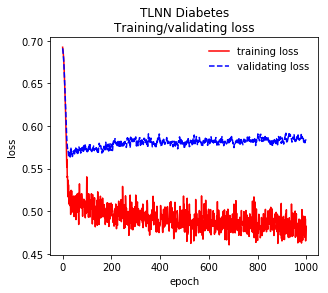

In [16]:
#----------------------------------------
# Summarize history for loss.

plt.figure('TLNN Diabetes loss', figsize = (4.8, 4.0))
plt.plot(history.history['loss'], "r-")
plt.plot(history.history['val_loss'], "b--")
plt.title('TLNN Diabetes' + '\n' + 'Training/validating loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validating loss'], loc = "best", frameon = False)
plt.show()

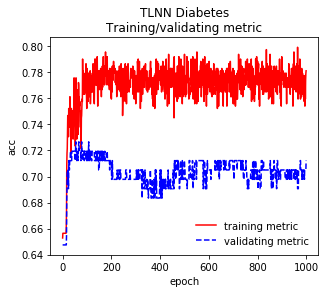

In [17]:
#----------------------------------------
# Summarize history for metric.

plt.figure('TLNN Diabetes metric', figsize = (4.8, 4.0))
plt.plot(history.history['acc'], "r-")
plt.plot(history.history['val_acc'], "b--")
plt.title('TLNN Diabetes' + '\n' + 'Training/validating metric')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['training metric', 'validating metric'], loc = "best", frameon = False)
plt.show()
